<a href="https://colab.research.google.com/github/RodrigoMarenda/Analise_de_Dados/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Rodrigo Belo Marenda

**Matrícula:** 4052024002404

**Dataset:** [Wine Quality](https://www.kaggle.com/datasets/sahideseker/wine-quality-classification)


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">Classificação da Qualidade de Vinhos</p>


[**Classificação da Qualidade de Vinhos**]

(https://github.com/RodrigoMarenda/Analise_de_Dados/blob/main/wine_image.jpeg)

(https://github.com/RodrigoMarenda/Sports_Predictions/blob/main/Imagens/wine_image.jpeg?raw=true)


# **Introdução**

### **Definição do Problema:**

O conjunto de dados Wine Quality é um conjunto de dados multivariado que consiste na avaliação de vinhos produzidos mundialmente. O objetivo principal é classificar o Rotuno do Vinho com com base em quatro características : acidez, residuo de açucar,	nivel alcolico	e densidade.


**Tipo de Problema**

**classificação supervisionada**  (Baixa, Média ou Alta Qualidade).


  - **Premissa**: Dados históricos dos jogos disputados, com variaveis que possam ser correlacionadas para determinar uma tendencia de resultado.

  - **Hipótese**: Um modelo de machine learning treinado com dados históricos, para identificar padrões que ajudem a prever o resultado das partidas.

  - **Variáveis**:

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?

- Existe uma correlação entre nacidez e nivel alcolico ?

- A espécie Iris setosa é mais facilmente separável das outras duas espécies?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (comprimento e largura da sépala, comprimento e largura da pétala), o objetivo é prever a qual das três classes (espécies de Íris) uma determinada flor pertence.

## Seleção de Dados

O dataset Iris é um conjunto de dados amplamente disponível e frequentemente incluído em bibliotecas de aprendizado de máquina, como *scikit-learn* no Python. Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## Atributos do Dataset

O dataset Iris contém 150 amostras, com 50 amostras de cada uma das três espécies de Íris. Possui cinco atributos:

- ***sepal length*** (comprimento da sépala em cm)
- ***sepal width*** (largura da sépala em cm)
- ***petal length*** (comprimento da pétala em cm)
- ***petal width*** (largura da pétala em cm)
- ***species*** (espécie de Íris: setosa, versicolor, virginica)

******************************************

## **Estrutura do projeto:**

[**1. Importação das Bibliotecas:**](#1)

[**2. Carga dos Dados:**](#2)

[**3. Analise de dados:**](#3)

[**4. Pré-processamento de dados:**](#4)

[**5. Interpretação e Geração de Insights:**](#5)

[**6. Visualização Final e Comunicação:**](#6)

[**7. Conclusão:**](#7)

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">1. Importação das Bibliotecas</p>

# Step 01: Importação das Bibliotecas

Nessa etapa estamos importanto todas as blibliotecas que serão utilizadas nesse algoritimo

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">2. Carga dos Dados</p>

# Step 01: Carga de Dados

Nessa etapa estamos realizando a carga dos dados, que estão armazendos em um arquivo do tipo csv (Comma-Separated Values). Esse dataset foi obtido no Site xxxx. Foram coletados dados de rotulos de vinhos, com o objetivo de realição a classificação dos Rotulos de acordo com as sua variaveis dipostas no dataset.

In [4]:
#--------------------------------------------------------#
# Informa a URL de importação do dataset                 #
#--------------------------------------------------------#

url ="https://raw.githubusercontent.com/RodrigoMarenda/Sports_Predictions/refs/heads/main/data/winemag-data_first25k.csv"


# Lê o arquivo
df = pd.read_csv(url, delimiter=';', low_memory=False)



# Exibir as primeiras linhas do DataFrame
df.head()



,id,country,description,designation,points,price,province,region_1,region_2,variety,winery,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,0.0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96.0,2350.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,"9,3","6,4","13,6",10005,high
1,1.0,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96.0,1100.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,"11,2",2,14,"0,9912",medium
2,2.0,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96.0,900.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,"11,6","0,9","8,2","0,9935",low
3,3.0,US,"This spent 20 months in 30% new French oak, an...",Reserve,96.0,650.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,"12,9","6,6","12,7",10002,low
4,4.0,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95.0,660.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,"13,9","13,8","10,4","0,9942",medium


In [5]:
# Verifica o tamanho do dataset , total de linhas e colunas.
df.shape
print(f"O Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

O Dataset tem 150931 linhas e 16 colunas.


In [6]:
# Verifica a estrutura do dataset, datatypes das colunas
df.dtypes

,0
id,float64
country,object
description,object
designation,object
points,float64
price,float64
province,object
region_1,object
region_2,object
variety,object


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">3. Analise de Dados:</p>

Nessa etapa será realizado o ajuste do dataset, para considerar somente as colunas que fazem sentido para a analise. Também será feita a limpeza, transformação e o tratamento de dados nulos ou vazios. Faremos a padronização dos dados para melhorar o desempenho do algoritmo.

# Step 01: Exploração Inicial - Dimensões do Dataset

In [24]:
print("Informações do Dataframe:")

linhas, colunas = df.shape
print(f"🔢 Total de linhas: {linhas}")
print(f"🧱 Total de colunas: {colunas}")


Informações do Dataframe:
🔢 Total de linhas: 150931
🧱 Total de colunas: 16


# Step 02: Exploração Inicial - Informações do DataSet

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150931 entries, 0 to 150930
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              25001 non-null  float64
 1   country         24999 non-null  object 
 2   description     25001 non-null  object 
 3   designation     17179 non-null  object 
 4   points          24279 non-null  float64
 5   price           22188 non-null  float64
 6   province        24277 non-null  object 
 7   region_1        20509 non-null  object 
 8   region_2        9411 non-null   object 
 9   variety         24279 non-null  object 
 10  winery          24279 non-null  object 
 11  fixed_acidity   25001 non-null  object 
 12  residual_sugar  25001 non-null  object 
 13  alcohol         25001 non-null  object 
 14  density         25001 non-null  object 
 15  quality_label   25001 non-null  object 
dtypes: float64(3), object(13)
memory usage: 18.4+ MB
None


# Step 03: Exploração Inicial - Amostra de Dados

In [40]:
print("="*50)
print("Amostra das 10 Primeiras linhas do DataFrame")
print("="*50)
df.head(10)




Amostra das 10 Primeiras linhas do DataFrame


,id,country,description,designation,points,price,province,region_1,region_2,variety,winery,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,0.0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96.0,2350.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,"9,3","6,4","13,6",10005,high
1,1.0,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96.0,1100.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,"11,2",2,14,"0,9912",medium
2,2.0,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96.0,900.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,"11,6","0,9","8,2","0,9935",low
3,3.0,US,"This spent 20 months in 30% new French oak, an...",Reserve,96.0,650.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,"12,9","6,6","12,7",10002,low
4,4.0,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95.0,660.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,"13,9","13,8","10,4","0,9942",medium
5,5.0,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95.0,730.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,"12,5","0,7","10,5","0,9933",low
6,6.0,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95.0,650.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,"4,3",9,"13,1","0,9909",high
7,7.0,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95.0,1100.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,15,"1,7","12,9","0,9917",high
8,8.0,US,This re-named vineyard was formerly bottled as...,Silice,95.0,650.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,"12,3","6,6","13,2","0,9936",medium
9,9.0,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95.0,600.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,"12,2","14,4","9,9",10021,medium


In [41]:
print("="*50)
print("Amostra das 10 ultimas linhas do DataFrame")
print("="*50)
df.tail(10)

Amostra das 10 ultimas linhas do DataFrame


,id,country,description,designation,points,price,province,region_1,region_2,variety,winery,fixed_acidity,residual_sugar,alcohol,density,quality_label
150921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 04: Exploração Inicial - Datatypes do DataSet

In [103]:
print("="*40)
print("📊 Informações sobre o DataFrame")
print("="*40)


print("\n Tipos de dados (dtypes) do dataset: \n")
print(df.dtypes)

📊 Informações sobre o DataFrame

 Tipos de dados (dtypes) do dataset: 

id                float64
country            object
description        object
designation        object
points            float64
price             float64
province           object
region_1           object
region_2           object
variety            object
winery             object
fixed_acidity     float64
residual_sugar    float64
alcohol           float64
density           float64
quality_label      object
dtype: object


# Step 05: Exploração Inicial - Resumo Estatistico

In [100]:
print("="*40)
print("📊 Resumo Estatistico")
print("="*40)
df.describe()

📊 Resumo Estatistico


,id,points,price,fixed_acidity,residual_sugar,alcohol,density
count,25001.000000,24279.000000,22188.000000,25001.000000,25001.000000,25001.000000,25001.000000
mean,12500.000000,88.490259,351.604020,10.174265,7.691948,11.040002,3095.600048
std,7217.311376,3.018420,384.759181,3.450971,4.206823,1.759477,4604.346069
min,0.000000,80.000000,40.000000,4.000000,0.500000,8.000000,0.990000
25%,6250.000000,86.000000,170.000000,7.100000,4.100000,9.500000,0.993900
50%,12500.000000,88.000000,250.000000,10.400000,7.500000,11.000000,0.997400
75%,18750.000000,90.000000,420.000000,13.100000,11.500000,12.600000,10008.000000
max,25000.000000,100.000000,20130.000000,16.000000,15.000000,14.000000,10049.000000


📊 Resumo Estatistico


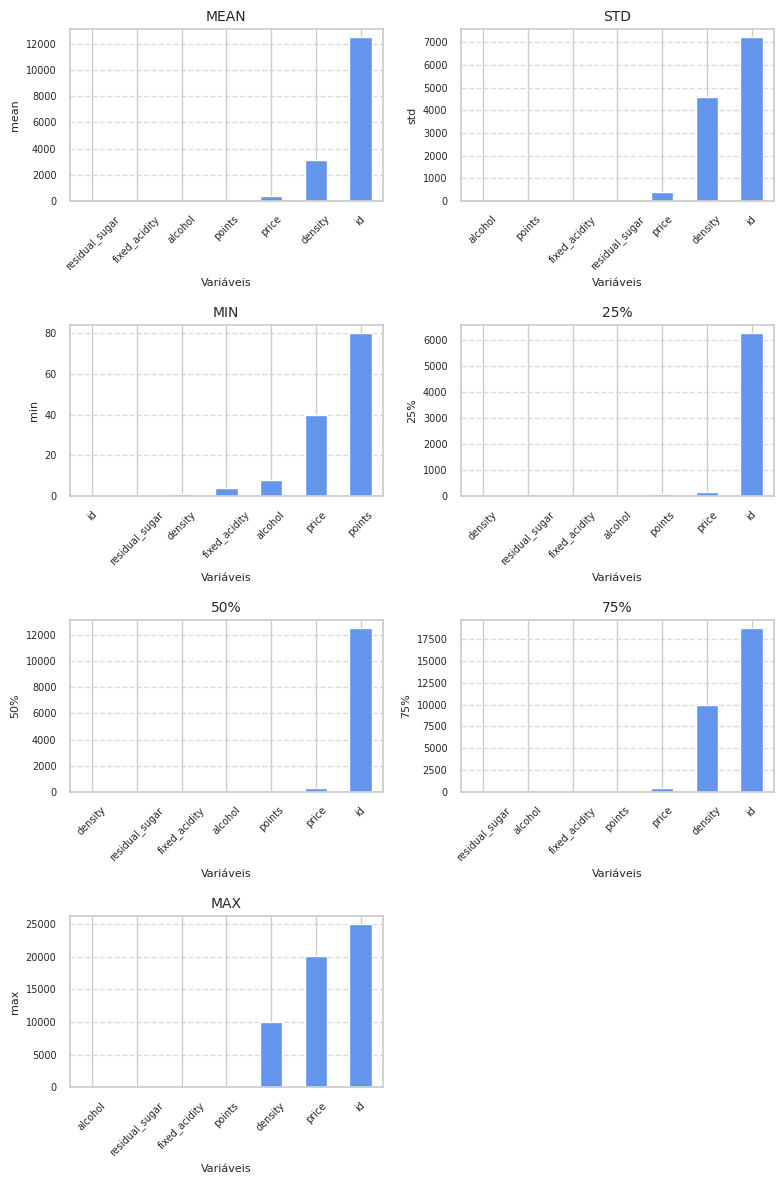

In [99]:
print("="*40)
print("📊 Resumo Estatistico")
print("="*40)

stats = df.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estatisticas = stats.columns.tolist()

# Número de gráficos e layout (2 por linha)
num_graficos = len(estatisticas)
linhas = (num_graficos + 1) // 2  # arredonda pra cima
fig, axs = plt.subplots(linhas, 2, figsize=(8, linhas * 3))  # largura fixa, altura proporcional


axs = axs.flatten()  # facilitar iteração

for i, stat in enumerate(estatisticas):
    stats[stat].sort_values().plot(kind='bar', color='cornflowerblue', ax=axs[i])
    axs[i].set_title(stat.upper(), fontsize=10)
    axs[i].set_ylabel(stat, fontsize=8)
    axs[i].set_xlabel('Variáveis', fontsize=8)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)
    axs[i].tick_params(axis='x', rotation=45, labelsize=7)
    axs[i].tick_params(axis='y', labelsize=7)

# Remover qualquer eixo vazio (se número ímpar)
if num_graficos % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


# Step 06: Exploração Inicial - Distribuição de Classes

📊 Distribuição de Classes


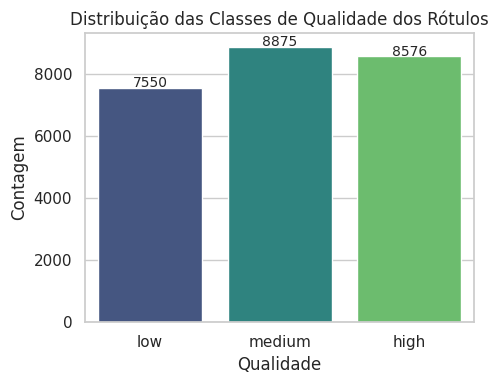

In [95]:
print("="*40)
print("📊 Distribuição de Classes")
print("="*40)

# Agrupamento das classes
class_counts = df['quality_label'].value_counts().reindex(['low', 'medium', 'high'])

# Plot
plt.figure(figsize=(5, 4))

ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Título e eixos
plt.title('Distribuição das Classes de Qualidade dos Rótulos')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')

# Adiciona os valores nas barras
for i, v in enumerate(class_counts.values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">4. Visualizações Unimodais:</p>

Nessa etapa será realizado o ajuste do dataset, para considerar somente as colunas que fazem sentido para a analise. Também será feita a limpeza, transformação e o tratamento de dados nulos ou vazios. Faremos a padronização dos dados para melhorar o desempenho do algoritmo.

# Step 01: Visualizações Unimodais - Histograma
Vamos criar agora um histograma para cada atributo do dataset. Veremos que os atributos age, pedi e test seguem uma distribuição exponencial, e que as colunas mass e press seguem uma distribuição aproximadamente normal.

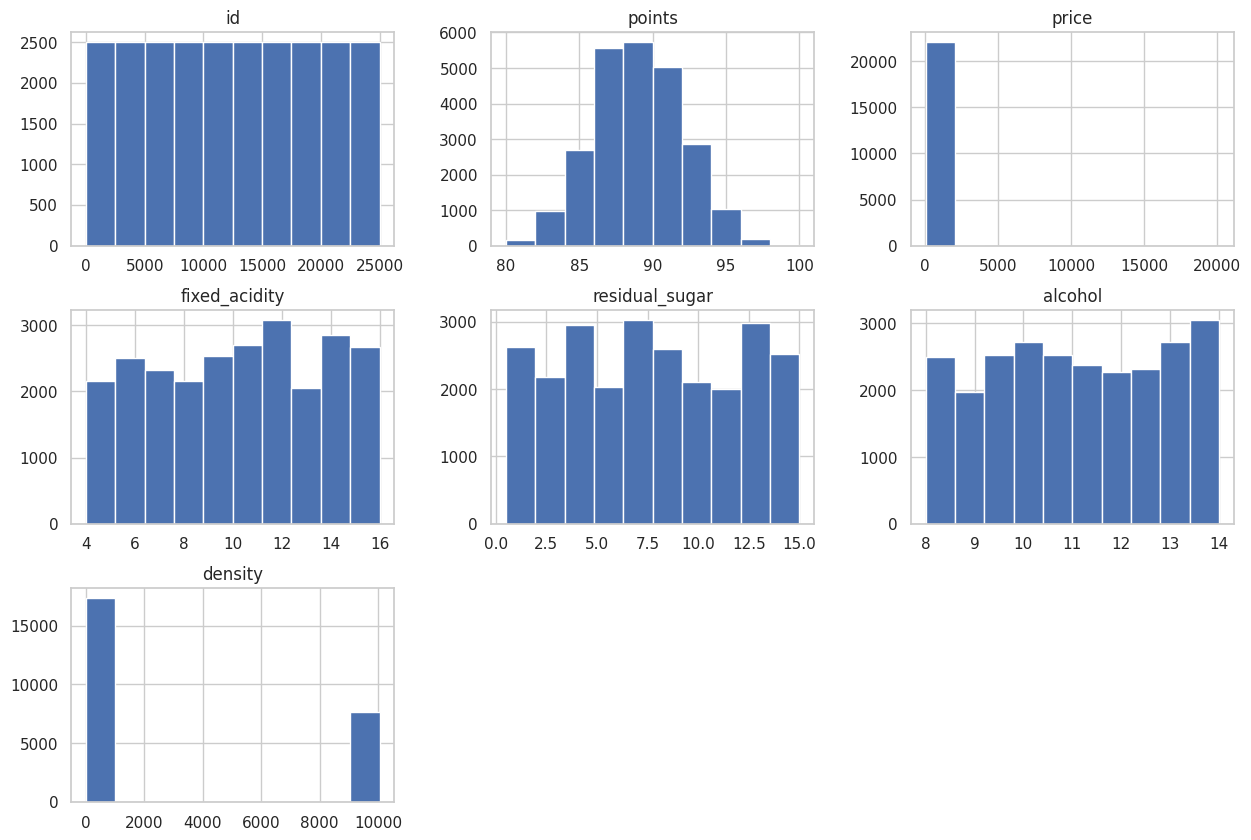

In [132]:
df.hist(figsize = (15,10))
plt.show()

# Step 02: Visualizações Unimodais - Boxplot
Vamos criar agora um histograma para cada atributo do dataset. Veremos que os atributos age, pedi e test seguem uma distribuição exponencial, e que as colunas mass e press seguem uma distribuição aproximadamente normal.

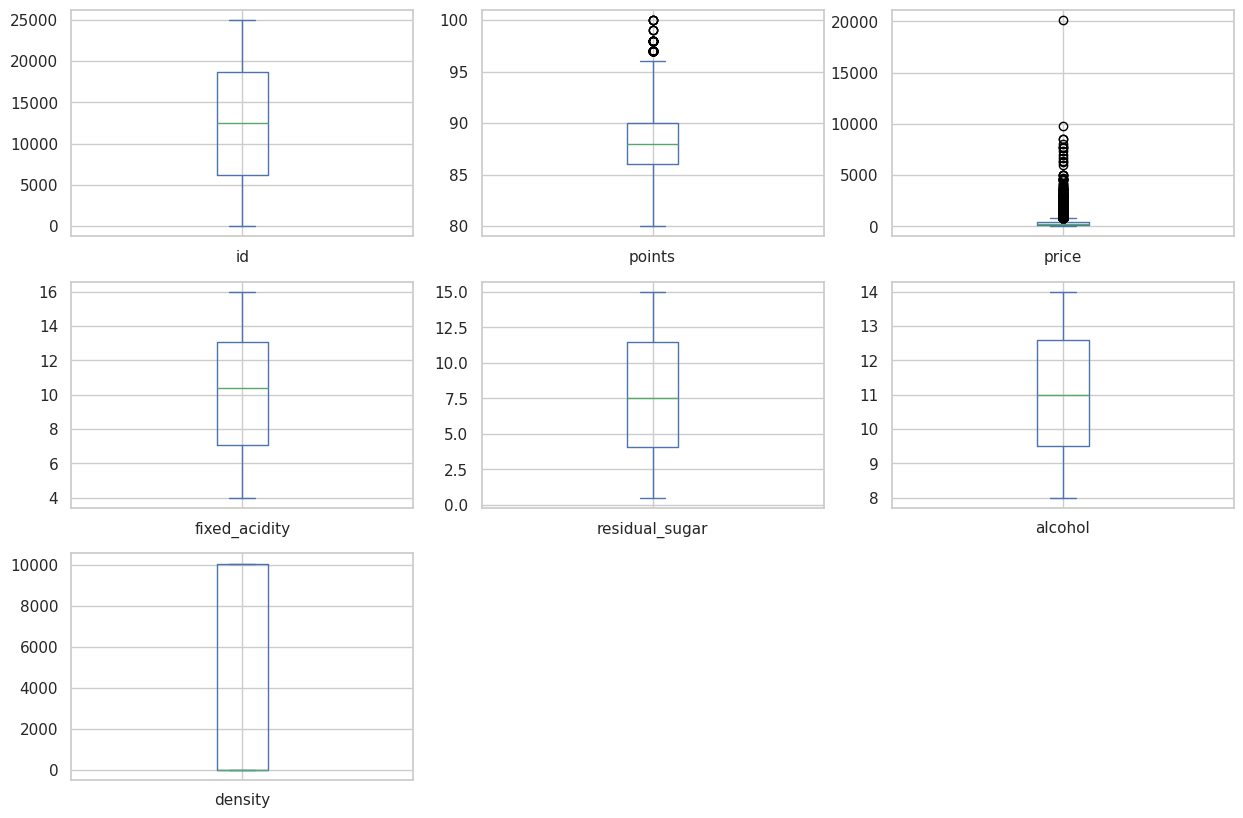

In [86]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

# Step 03: Visualizações Unimodais - Gráfico de Densidade
Vamos criar agora um histograma para cada atributo do dataset. Veremos que os atributos age, pedi e test seguem uma distribuição exponencial, e que as colunas mass e press seguem uma distribuição aproximadamente normal.

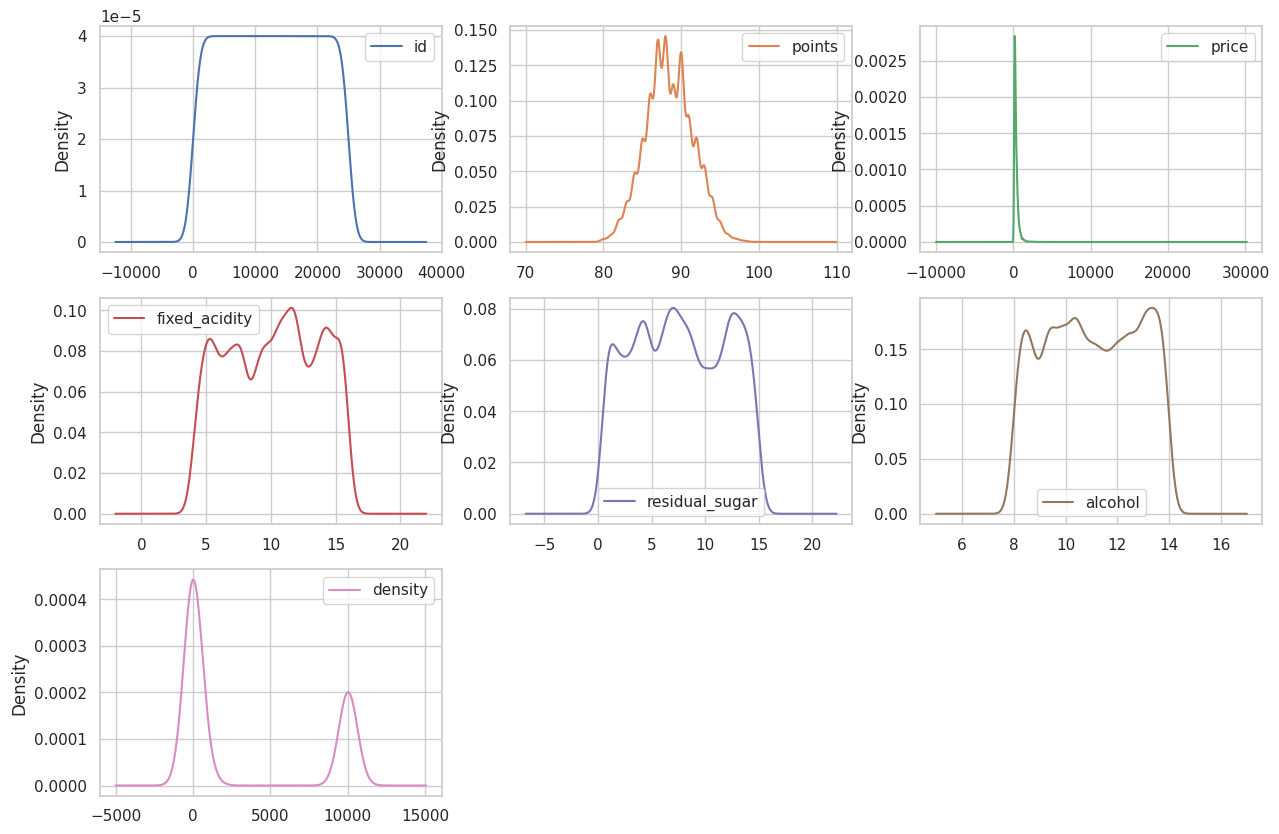

In [141]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

# Step 04: Visualizações Unimodais - Gráfico de Frequência Acumulada
Vamos criar agora um histograma para cada atributo do dataset. Veremos que os atributos age, pedi e test seguem uma distribuição exponencial, e que as colunas mass e press seguem uma distribuição aproximadamente normal.

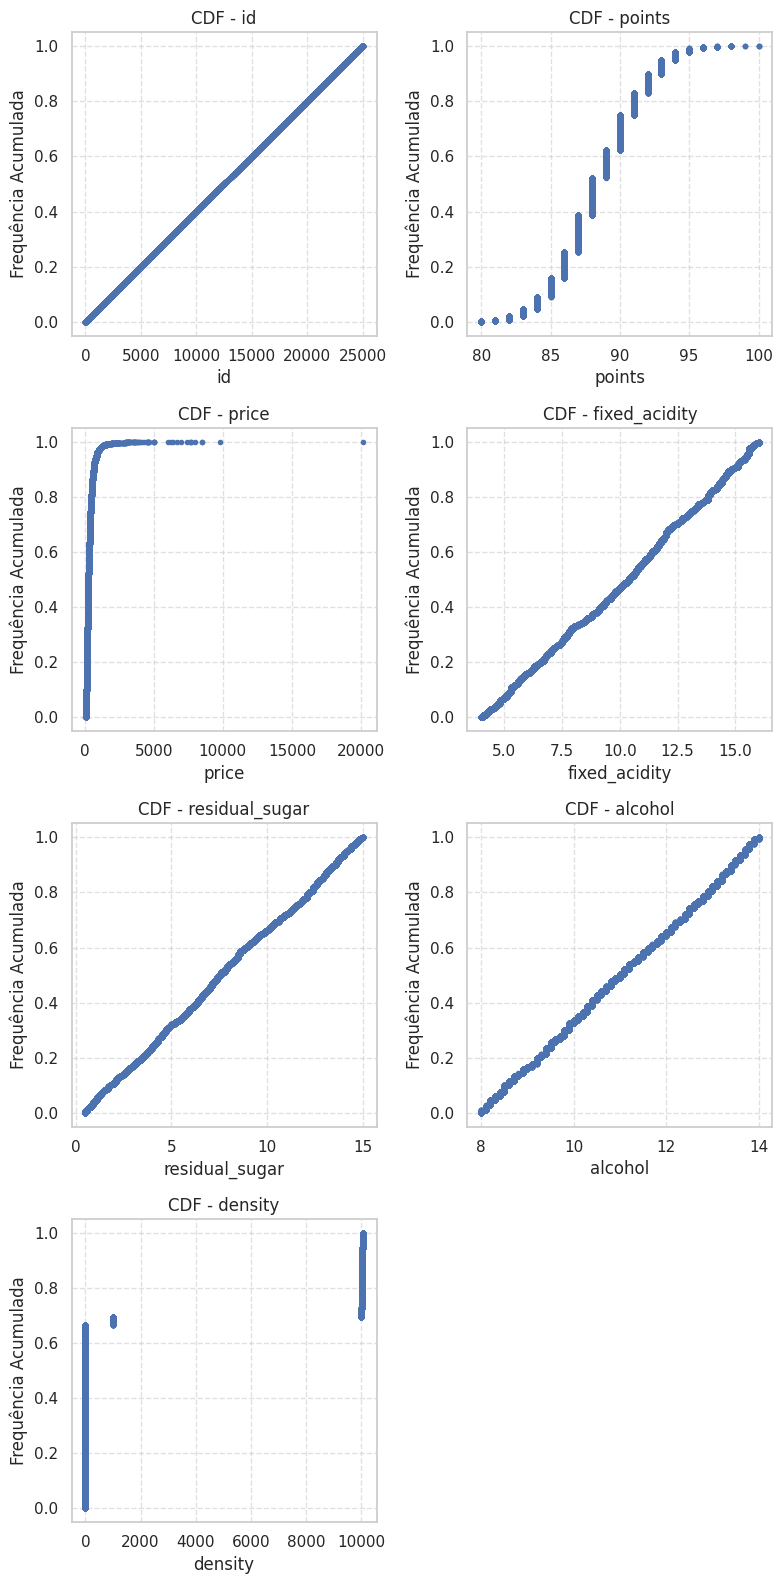

In [155]:
# Seleciona colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns
n_cols = 2  # número de gráficos por linha
n_rows = int(np.ceil(len(numeric_cols) / n_cols))  # número de linhas

# Cria a figura com subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4 * n_rows))
axes = axes.flatten()  # transforma em lista simples

# Loop para cada coluna
for i, col in enumerate(numeric_cols):
    data = df[col].dropna().sort_values()
    cdf = np.arange(1, len(data)+1) / len(data)

    axes[i].plot(data, cdf, marker='.', linestyle='none')
    axes[i].set_title(f'CDF - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência Acumulada')
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Remove subplots vazios (se existirem)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Step 05: Visualizações Unimodais - Gráfico de Barras
Vamos criar agora um histograma para cada atributo do dataset. Veremos que os atributos age, pedi e test seguem uma distribuição exponencial, e que as colunas mass e press seguem uma distribuição aproximadamente normal.

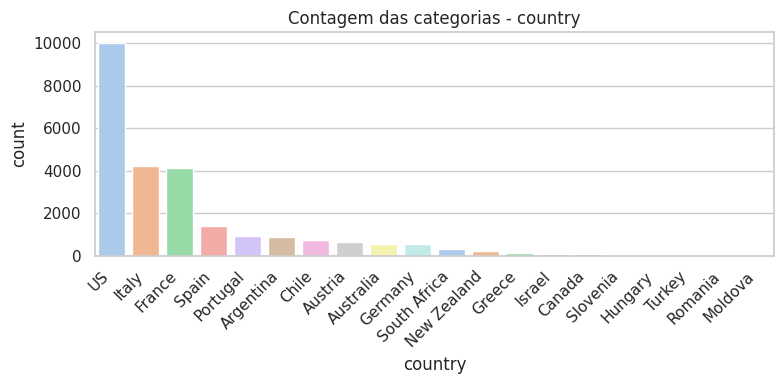

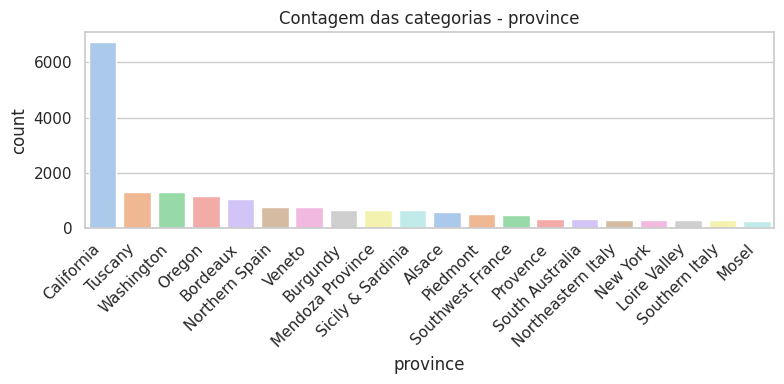

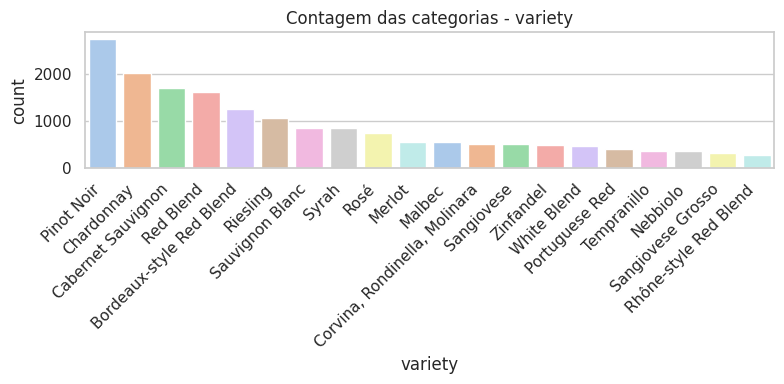

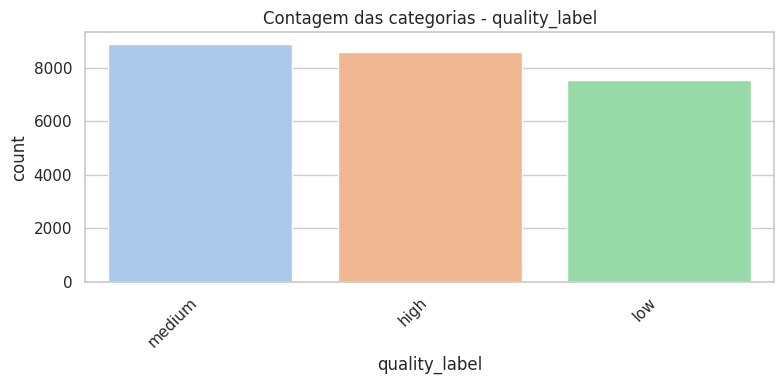

In [151]:
for col in ['country','province','variety','quality_label']:

    plt.figure(figsize=(8, 4))
    ordem = df[col].value_counts().index[:20]  # top 20 categorias
    sns.countplot(data=df, x=col, order=ordem, palette='pastel')


    plt.title(f'Contagem das categorias - {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Step 06: Visualizações Unimodais - Histograma + KDE
Vamos criar agora um histograma para cada atributo do dataset. Veremos que os atributos age, pedi e test seguem uma distribuição exponencial, e que as colunas mass e press seguem uma distribuição aproximadamente normal.

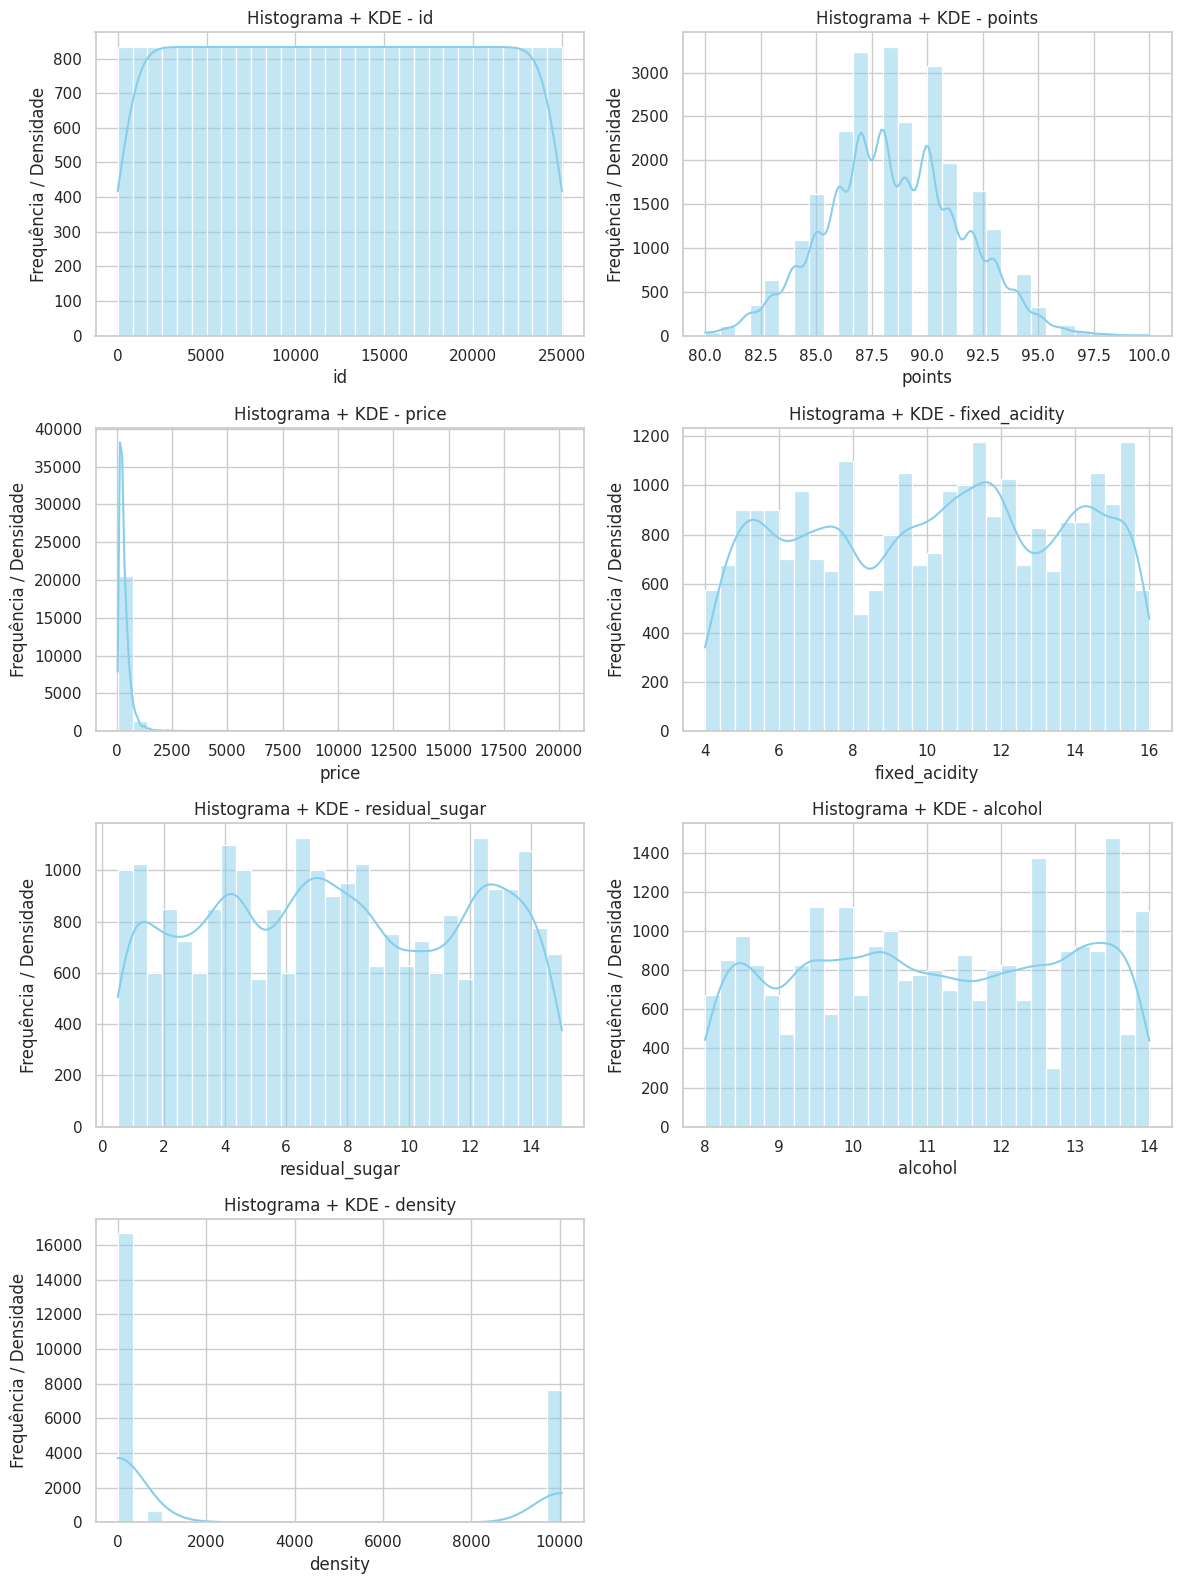

In [157]:
sns.set(style="whitegrid")

# Seleciona colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Configura o layout do grid
n_cols = 2  # dois por linha
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Cria a figura com subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

# Loop para gerar cada histograma com KDE
for i, col in enumerate(numeric_cols):
    data = df[col].dropna()
    sns.histplot(data, bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histograma + KDE - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência / Densidade')

# Remove subplots vazios (caso o número de colunas não seja par)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">4. Visualizações Multimodais:</p>

Nessa etapa será realizado o ajuste do dataset, para considerar somente as colunas que fazem sentido para a analise. Também será feita a limpeza, transformação e o tratamento de dados nulos ou vazios. Faremos a padronização dos dados para melhorar o desempenho do algoritmo.

# 4.1. Visualizações Multimodais - Numérica × Numérica

> # Step 01: Scatter Plot (Dispersão)

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

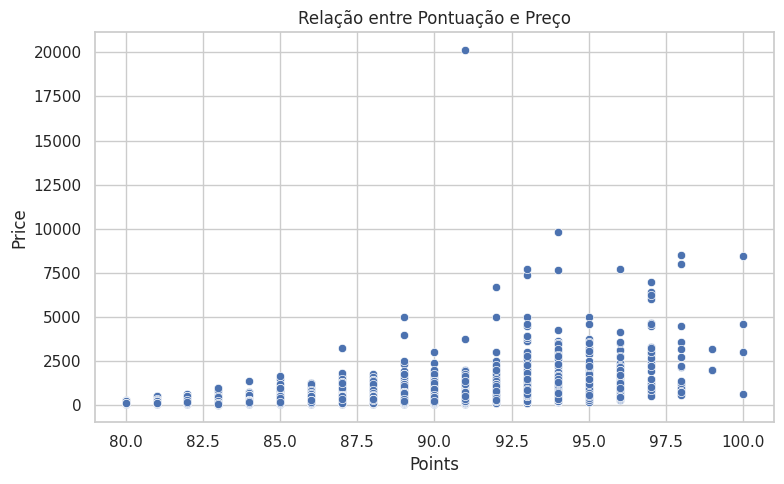

In [128]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='points', y='price')
plt.title('Relação entre Pontuação e Preço')
plt.xlabel('Points')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

> # Step 02: Pairplot (Matriz de Dispersão)

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.



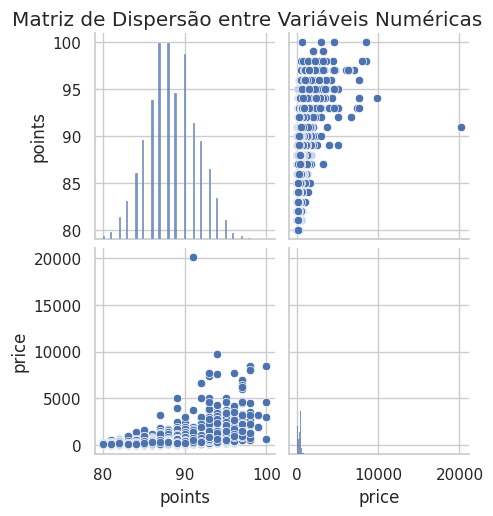

In [127]:
sns.pairplot(df[['points', 'price']].dropna())
plt.suptitle('Matriz de Dispersão entre Variáveis Numéricas', y=1.02)
plt.show()

> # Step 03: Heatmap de Correlação

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

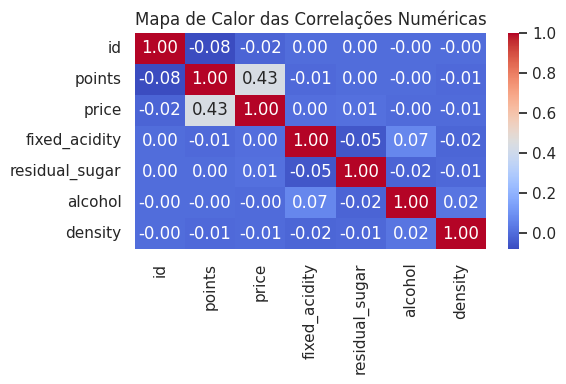

In [126]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor das Correlações Numéricas')
plt.tight_layout()
plt.show()

# 4.2. Visualizações Multimodais - Categórica × Numérica

> # Step 01: Boxplot por Categoria (quality_label)

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

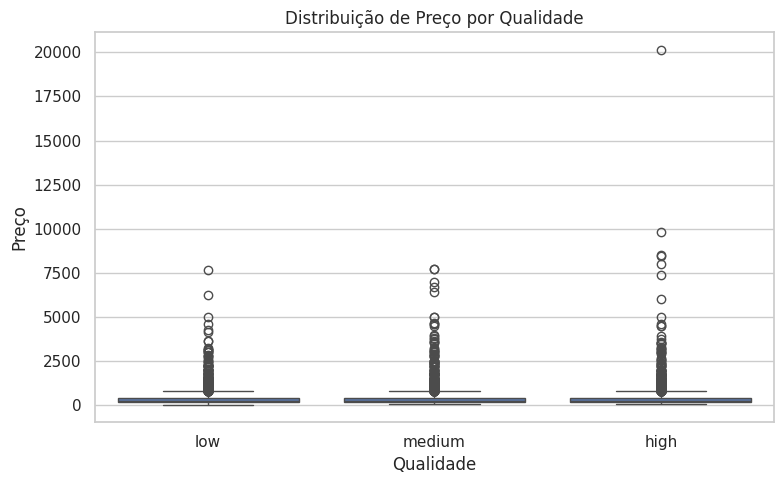

In [162]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='quality_label', y='price', order=['low', 'medium', 'high'])
plt.title('Distribuição de Preço por Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('Preço')
plt.tight_layout()
plt.show()

> # Step 02: Violin Plot

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

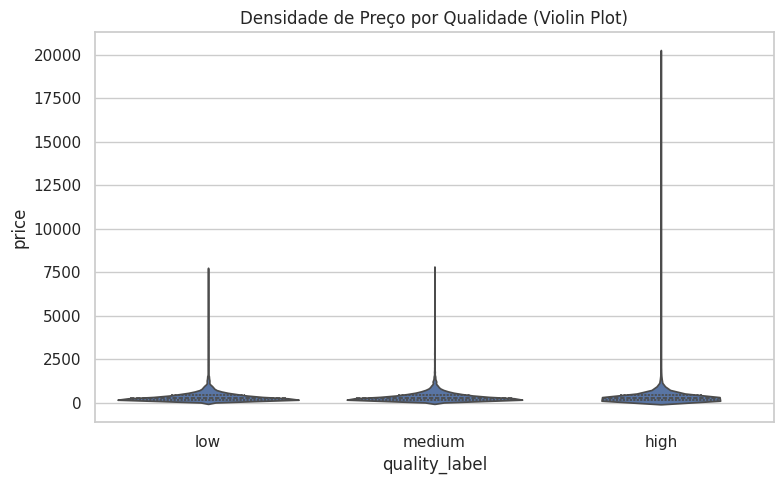

In [163]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='quality_label', y='price', order=['low', 'medium', 'high'], inner='quartile')
plt.title('Densidade de Preço por Qualidade (Violin Plot)')
plt.tight_layout()
plt.show()

> # Step 03: Barplot (média de preço por qualidade)

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

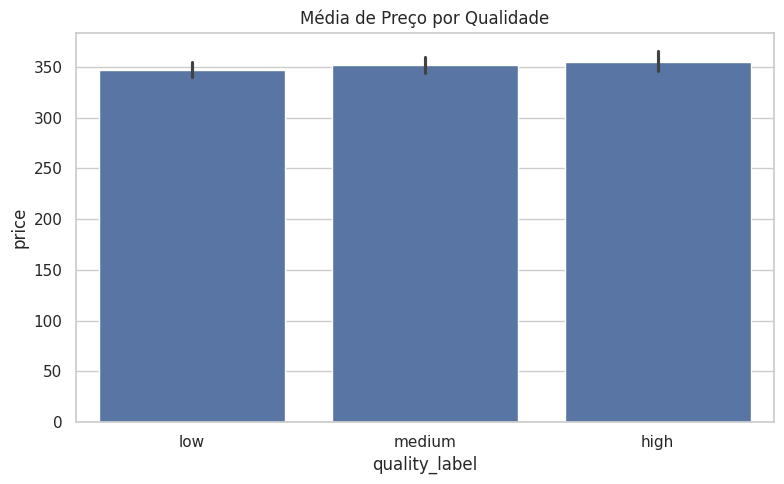

In [164]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='quality_label', y='price', order=['low', 'medium', 'high'], estimator='mean')
plt.title('Média de Preço por Qualidade')
plt.tight_layout()
plt.show()

> # Step 04: Swarm Plot

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

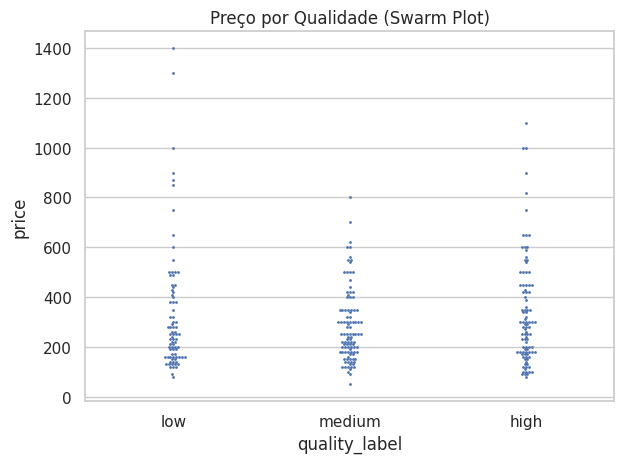

In [171]:
sns.swarmplot(data=df.sample(n=2000, random_state=42), x='quality_label', y='price',
              order=['low', 'medium', 'high'], size=2)
plt.title('Preço por Qualidade (Swarm Plot)')
plt.tight_layout()
plt.show()

# 4.3. Visualizações Multimodais - Categórica × Categórica

> # Step 01: Countplot com hue
O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

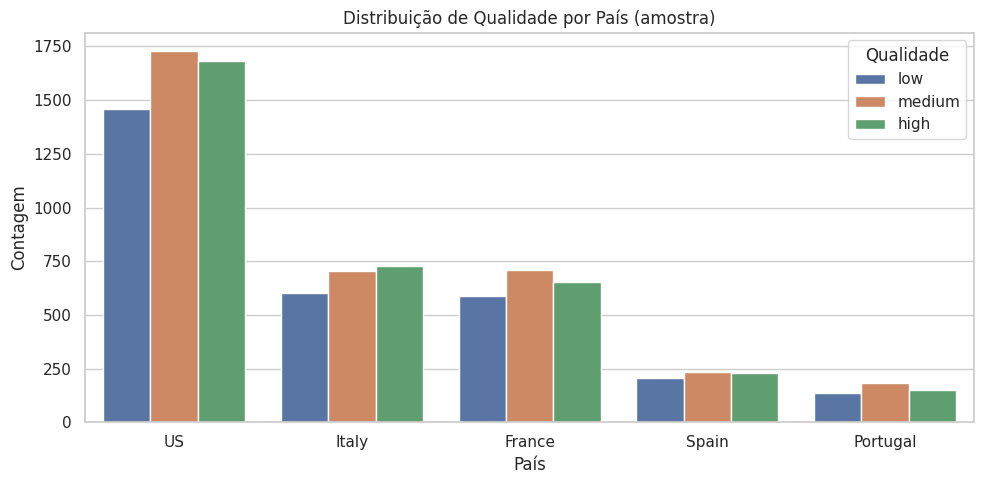

In [175]:
top_paises = df['country'].value_counts().index[:5]
df_top = df[df['country'].isin(top_paises)].sample(n=10000, random_state=42)  # ajustável

plt.figure(figsize=(10, 5))
sns.countplot(data=df_top, x='country', hue='quality_label', order=top_paises,
              hue_order=['low', 'medium', 'high'])
plt.title('Distribuição de Qualidade por País (amostra)')
plt.xlabel('País')
plt.ylabel('Contagem')
plt.legend(title='Qualidade')
plt.tight_layout()
plt.show()

> # Step 02: Crosstab + Heatmap

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

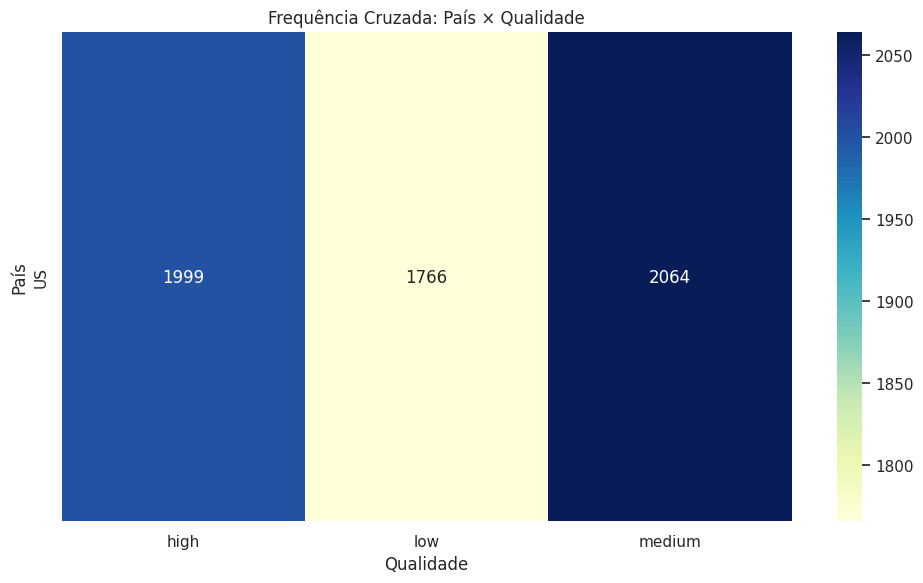

In [204]:
crosstab = pd.crosstab(df['country'], df['quality_label'])
top_crosstab = crosstab.loc[crosstab.sum(axis=1).nlargest(10).index]

plt.figure(figsize=(10, 6))
sns.heatmap(top_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Frequência Cruzada: País × Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('País')
plt.tight_layout()
plt.show()

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">4. Pré Processamento de Dados:</p>

# Limpeza

# remover e tratrar valores nulos

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset:")
df.isnull().sum()

In [ ]:
#codigo aqui

#Categóricas
df['designation'].fillna('Sem Designação', inplace=True)
df['country'].fillna('Desconhecido', inplace=True)
df['province'].fillna('Desconhecido', inplace=True)
df['region_1'].fillna('Não Informada', inplace=True)
df['region_2'].fillna('Não Informada', inplace=True)  # ou df.drop('region_2', axis=1)
df['variety'].fillna('Outra', inplace=True)
df['winery'].fillna('Desconhecida', inplace=True)

# Numéricas
df['points'].fillna(df['points'].median(), inplace=True)
df['price'] = 0


> # Step 01: Redundancias

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.


In [177]:
#Tratamento de valores ausentes:

## Remover duplicatas
df.drop_duplicates(inplace=True)


> # Step 02: Outliers

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

In [179]:
df['density'] = pd.to_numeric(df['density'], errors='coerce')

#, 'density'

# Tratamento de Outliers
numeric_cols = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol']
outliers_df = pd.DataFrame()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers_df = pd.concat([outliers_df, outliers])
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Mostrar exemplos de outliers descartados
print("Exemplos de linhas removidas por outliers:")
outliers_df.drop_duplicates().head()



Exemplos de linhas removidas por outliers:


,id,country,description,designation,points,price,province,region_1,region_2,variety,winery,fixed_acidity,residual_sugar,alcohol,density,quality_label
19,19.0,US,This fresh and lively medium-bodied wine is be...,Gap's Crown Vineyard,95.0,750.0,California,Sonoma Coast,Sonoma,Pinot Noir,Gary Farrell,15.6,4.2,12.3,10019.0000,high
21,21.0,Spain,"Alluring, complex and powerful aromas of grill...",Prado Enea Gran Reserva,95.0,790.0,Northern Spain,Rioja,NaN,Tempranillo Blend,Muga,11.4,14.0,13.8,0.9989,low
79,79.0,Italy,"Underbrush, smoke, mocha and dark fruit aromas...",Boscato,91.0,750.0,Piedmont,Barolo,NaN,Nebbiolo,Bel Colle,9.9,2.1,9.6,10028.0000,medium
330,330.0,Italy,"Scents of woodland berry, rose petal, grilled ...",Monvigliero,91.0,750.0,Piedmont,Barolo,NaN,Nebbiolo,Fratelli Alessandria,5.9,3.7,12.9,0.9944,high
391,391.0,US,Juicy blackberry and blackcurrant mix with coc...,Cabovation Destiny Vineyards Mt Christo Block ...,90.0,750.0,California,Paso Robles,Central Coast,Cabernet Sauvignon,Hunt Cellars,9.9,4.1,13.7,0.9986,low


> # Step 03: Missings

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

In [180]:

print("Linhas com pelo menos um valor nulo:")
print(df[df.isnull().any(axis=1)])


## Remover linhas com nulos condicionadas ao id
df = df[~((df['id'].notna()) & (df.isnull().any(axis=1)))]
df.dropna(how='any', inplace=True)



Linhas com pelo menos um valor nulo:
            id      country  \
4          4.0       France   
5          5.0        Spain   
6          6.0        Spain   
25        25.0  New Zealand   
26        26.0           US   
...        ...          ...   
24992  24992.0       France   
24993  24993.0  New Zealand   
24995  24995.0     Portugal   
24996  24996.0        Spain   
25000  25000.0    Australia   

                                             description  \
4      This is the top wine from La Bégude, named aft...   
5      Deep, dense and pure from the opening bell, th...   
6      Slightly gritty black-fruit aromas include a s...   
25     Yields were down in 2015, but intensity is up,...   
26     Bergström has made a Shea designate since 2003...   
...                                                  ...   
24992  A wine that emphasizes the honeyed aspects of ...   
24993  Possibly just in a sullen phase, this reserve ...   
24995  A big textured, smooth wine, sweet fruits w

In [181]:
print("Linhas com pelo menos um valor nulo:")
print(df[df.isnull().any(axis=1)])

Linhas com pelo menos um valor nulo:
Empty DataFrame
Columns: [id, country, description, designation, points, price, province, region_1, region_2, variety, winery, fixed_acidity, residual_sugar, alcohol, density, quality_label]
Index: []


# Preparação e Transformação de dados

> # Step 01: Conversão de Valores

In [182]:

df.describe()

,id,points,price,fixed_acidity,residual_sugar,alcohol,density
count,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000
mean,12009.319266,88.864985,348.970664,10.186550,7.726625,11.028856,3023.869353
std,7243.072419,2.905003,148.319125,3.453252,4.227122,1.764916,4570.738337
min,3.000000,80.000000,40.000000,4.000000,0.500000,8.000000,0.990000
25%,5630.000000,87.000000,230.000000,7.100000,4.100000,9.500000,0.993800
50%,11978.000000,89.000000,340.000000,10.300000,7.600000,11.000000,0.997400
75%,17866.000000,91.000000,450.000000,13.300000,11.600000,12.600000,10008.000000
max,24999.000000,96.000000,720.000000,16.000000,15.000000,14.000000,10049.000000


In [183]:
# Conversão de colunas numéricas que estão como objeto
numeric_object_cols = ['fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Substitui vírgula por ponto e converte para float
for col in numeric_object_cols:
    df[col] = df[col].astype(str).str.replace(',', '.').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')


print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5829 entries, 3 to 24999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5829 non-null   float64
 1   country         5829 non-null   object 
 2   description     5829 non-null   object 
 3   designation     5829 non-null   object 
 4   points          5829 non-null   float64
 5   price           5829 non-null   float64
 6   province        5829 non-null   object 
 7   region_1        5829 non-null   object 
 8   region_2        5829 non-null   object 
 9   variety         5829 non-null   object 
 10  winery          5829 non-null   object 
 11  fixed_acidity   5829 non-null   float64
 12  residual_sugar  5829 non-null   float64
 13  alcohol         5829 non-null   float64
 14  density         5829 non-null   float64
 15  quality_label   5829 non-null   object 
dtypes: float64(7), object(9)
memory usage: 774.2+ KB
None


> # Step 02: Novas Caracteristicas

In [184]:
#novas características

def faixa_preco(preco):
    if preco == 0:
        return 'Sem Preço'
    elif preco > 0 and preco <= 30:
        return 'baixo'
    elif preco <= 60:
        return 'médio'
    else:
        return 'alto'

df['price_range'] = df['price'].apply(faixa_preco)
df['qpr'] = df['points'] / df['price']
df['full_region'] = df['province'] + ' - ' + df['region_1']
df['desc_length'] = df['description'].str.len()
df['alcohol_density_ratio'] = df['alcohol'] / df['density']

# Step 03: Redução de Dimensionalidade

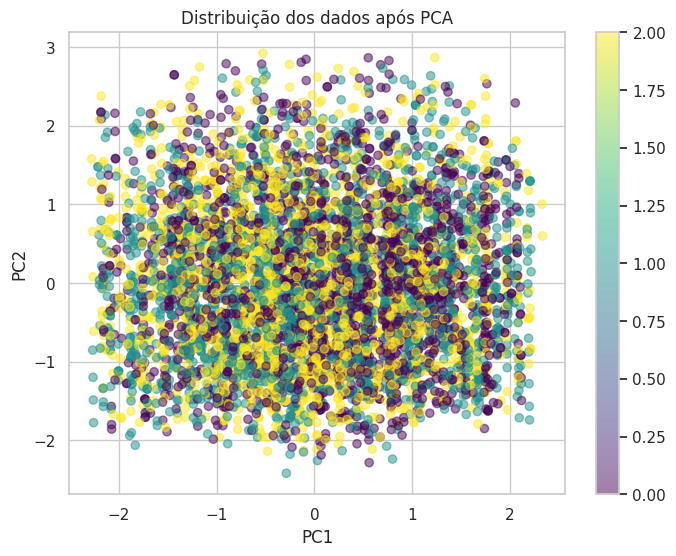

In [185]:
#codigo aqui

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecionar apenas colunas numéricas válidas
X_numeric = df[features].copy()

# Normalizar os dados antes do PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Aplicar PCA para reduzir para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Substituir as features originais pelas componentes principais
X = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


plt.figure(figsize=(8,6))
plt.scatter(X['PC1'], X['PC2'], c=pd.Categorical(df['quality_label']).codes, cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Distribuição dos dados após PCA')
plt.colorbar()
plt.show()

> # Step 04: Categorização de Variáveis

In [188]:
# Conversão de colunas categóricas em códigos numéricos para visualização ou modelagem
for col in ['country', 'designation', 'province', 'region_1', 'region_2',
            'variety', 'winery', 'price_range', 'quality_label', 'full_region']:
    df[f'{col}_code'] = LabelEncoder().fit_transform(df[col])

    df.head()

> # Step 05: Normalização

In [70]:

# Seleciona apenas colunas numéricas
numericas = df.select_dtypes(include=['number']).dropna()

# Cria o scaler e ajusta
scaler = StandardScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(numericas),
                              columns=numericas.columns)

# Visualização rápida
df_normalizado.head()

,id,points,price,fixed_acidity,residual_sugar,alcohol,density
0,-1.690115,2.498282,5.194005,-0.253360,-0.307954,1.461867,1.498284
1,-1.689975,2.498282,1.945146,0.296683,-1.353339,1.689862,-0.673142
2,-1.689836,2.498282,1.425329,0.412481,-1.614685,-1.616062,-0.673141
3,-1.689696,2.498282,0.775557,0.788826,-0.260437,0.948879,1.497633
4,-1.689557,2.167356,0.801548,1.078322,1.450192,-0.362091,-0.673141


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['points'].plot(kind='hist', bins=20, title='points')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['fixed_acidity'].plot(kind='hist', bins=20, title='fixed_acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='id', y='points', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='points', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='price', y='fixed_acidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='fixed_acidity', y='residual_sugar', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['points']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('points')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['residual_sugar']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('residual_sugar')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['alcohol']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('alcohol')

from matplotlib import pyplot as plt
_df_12['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['points'].plot(kind='line', figsize=(8, 4), title='points')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['fixed_acidity'].plot(kind='line', figsize=(8, 4), title='fixed_acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [72]:
df_normalizado.describe()

,id,points,price,fixed_acidity,residual_sugar,alcohol,density
count,2.218800e+04,2.218800e+04,2.218800e+04,2.218800e+04,2.218800e+04,2.218800e+04,2.218800e+04
mean,-4.099039e-17,1.734406e-15,6.148558e-17,9.447003e-18,-1.319378e-16,-1.905413e-16,3.906896e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.690115e+00,-2.796546e+00,-8.098859e-01,-1.787689e+00,-1.709720e+00,-1.730060e+00,-6.731419e-01
25%,-8.622670e-01,-8.109854e-01,-4.720046e-01,-8.902512e-01,-8.544055e-01,-8.750793e-01,-6.731411e-01
50%,-3.037371e-02,-1.491318e-01,-2.640777e-01,6.508572e-02,-2.284964e-02,-2.009905e-02,-6.731403e-01
75%,8.429486e-01,5.127217e-01,1.777671e-01,8.756746e-01,9.037412e-01,8.918799e-01,1.498935e+00
max,1.797176e+00,3.821989e+00,5.140577e+01,1.686264e+00,1.735297e+00,1.689862e+00,1.507834e+00


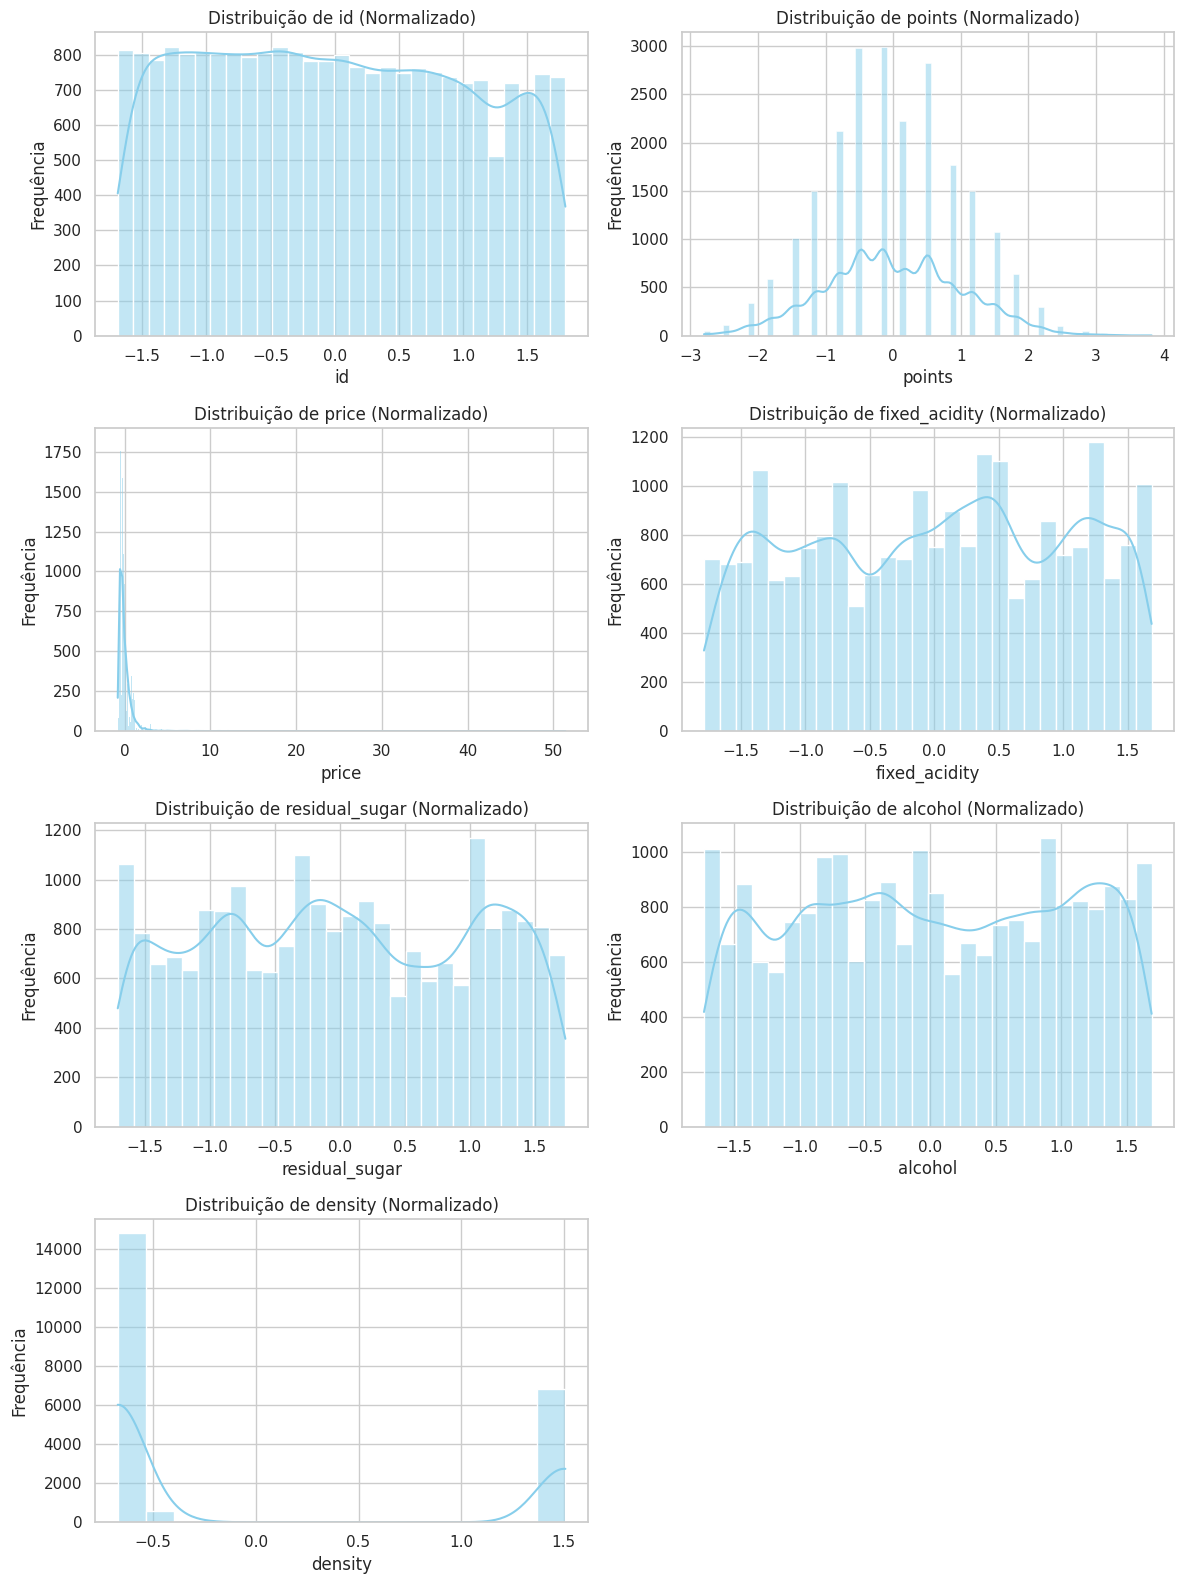

In [201]:
# Visualização da distribuição após a normalização
cols = df_normalizado.columns
n_cols = 2
n_rows = int(np.ceil(len(cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(df_normalizado[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribuição de {col} (Normalizado)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Remove eixos extras, caso existam
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Step 07: Divisão do Conjunto de Dados

In [199]:
# Define X (já padronizado)
X = df_normalizado

# Alinha y com os índices de X
y = df.loc[X.index, 'quality_label']
y = LabelEncoder().fit_transform(y)

# Agora sim: divide
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Dimensões de X Treino: {X_train.shape}")
print(f"Dimensões de X Teste: {X_test.shape}")
print(f"Dimensões de y Treino: {y_train.shape}")
print(f"Dimensões de y Teste: {y_test.shape}")


KeyError: '[0, 1, 2, 4, 5, 6, 7, 10, 13, 14, 15, 16, 17, 18, 19, 21, 22, 25, 26, 27, 30, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 56, 59, 60, 61, 62, 63, 64, 66, 67, 70, 71, 72, 73, 74, 76, 78, 79, 81, 82, 83, 84, 85, 86, 87, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 102, 106, 107, 108, 110, 111, 112, 114, 115, 116, 117, 118, 119, 123, 125, 126, 128, 129, 130, 131, 133, 138, 139, 140, 143, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 166, 167, 168, 170, 171, 172, 174, 175, 176, 177, 179, 180, 183, 184, 188, 189, 190, 191, 192, 193, 194, 195, 196, 202, 203, 204, 205, 206, 207, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 222, 224, 225, 227, 229, 231, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 247, 250, 251, 255, 258, 259, 260, 261, 264, 265, 266, 268, 269, 270, 271, 275, 276, 277, 278, 280, 281, 282, 283, 284, 286, 287, 288, 290, 291, 292, 294, 296, 297, 302, 305, 306, 307, 311, 312, 313, 315, 316, 318, 320, 321, 322, 323, 324, 325, 326, 327, 328, 330, 331, 333, 335, 337, 339, 340, 342, 343, 344, 345, 348, 349, 352, 353, 355, 357, 358, 359, 363, 364, 365, 366, 367, 368, 369, 370, 371, 373, 374, 375, 376, 377, 378, 379, 380, 382, 383, 384, 385, 386, 389, 391, 392, 394, 395, 396, 397, 398, 399, 400, 401, 402, 404, 405, 406, 408, 410, 411, 412, 413, 414, 416, 417, 418, 419, 420, 422, 424, 425, 426, 427, 430, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 453, 454, 455, 456, 457, 459, 460, 461, 463, 464, 466, 467, 469, 470, 471, 473, 474, 476, 477, 478, 479, 481, 482, 483, 484, 485, 486, 487, 488, 490, 491, 493, 495, 497, 498, 499, 500, 502, 503, 506, 507, 508, 509, 511, 512, 514, 515, 517, 519, 521, 522, 525, 526, 529, 530, 532, 533, 534, 535, 537, 541, 542, 543, 544, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 558, 559, 561, 562, 563, 564, 565, 567, 568, 569, 572, 573, 575, 576, 577, 579, 580, 582, 583, 584, 586, 587, 588, 590, 594, 595, 596, 598, 599, 601, 602, 603, 604, 606, 607, 608, 609, 610, 611, 613, 615, 619, 620, 621, 622, 623, 624, 626, 627, 628, 629, 630, 631, 632, 633, 634, 637, 638, 639, 640, 641, 643, 644, 647, 648, 649, 650, 651, 653, 657, 658, 659, 660, 661, 662, 663, 665, 666, 667, 668, 669, 670, 672, 676, 677, 679, 680, 681, 682, 683, 684, 688, 689, 691, 692, 695, 696, 699, 700, 701, 705, 707, 711, 712, 713, 714, 715, 716, 717, 718, 719, 721, 722, 723, 724, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 748, 749, 750, 751, 752, 755, 756, 757, 758, 759, 760, 763, 764, 765, 766, 768, 769, 770, 771, 774, 775, 776, 777, 778, 779, 780, 781, 783, 785, 786, 787, 788, 789, 791, 792, 795, 801, 804, 806, 809, 810, 811, 813, 814, 815, 816, 817, 818, 819, 820, 821, 824, 825, 826, 828, 831, 832, 833, 834, 838, 841, 844, 845, 846, 847, 848, 849, 851, 852, 853, 854, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 873, 874, 875, 876, 877, 880, 881, 882, 883, 884, 888, 889, 890, 892, 894, 897, 898, 899, 900, 901, 903, 904, 905, 907, 908, 909, 910, 911, 912, 915, 916, 919, 921, 922, 924, 928, 929, 930, 931, 932, 933, 934, 936, 937, 938, 939, 940, 942, 943, 944, 946, 948, 949, 950, 951, 954, 955, 957, 958, 959, 960, 961, 962, 964, 965, 966, 968, 970, 971, 972, 974, 975, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1022, 1023, 1024, 1025, 1026, 1027, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1041, 1042, 1043, 1045, 1046, 1047, 1048, 1050, 1051, 1052, 1053, 1055, 1056, 1057, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1078, 1082, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1098, 1101, 1103, 1105, 1108, 1109, 1110, 1111, 1112, 1113, 1115, 1116, 1117, 1118, 1120, 1121, 1123, 1124, 1125, 1126, 1128, 1129, 1131, 1133, 1134, 1135, 1136, 1139, 1140, 1141, 1143, 1145, 1146, 1148, 1149, 1151, 1152, 1153, 1155, 1156, 1158, 1160, 1161, 1162, 1163, 1164, 1165, 1167, 1168, 1169, 1171, 1172, 1173, 1175, 1179, 1181, 1183, 1184, 1185, 1189, 1190, 1191, 1192, 1194, 1195, 1196, 1197, 1198, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1222, 1223, 1224, 1226, 1230, 1232, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1246, 1248, 1251, 1252, 1253, 1254, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1267, 1269, 1270, 1271, 1274, 1275, 1277, 1279, 1280, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1298, 1300, 1301, 1302, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1320, 1321, 1323, 1324, 1325, 1327, 1328, 1329, 1330, 1331, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1343, 1344, 1346, 1347, 1348, 1349, 1350, 1352, 1354, 1355, 1357, 1358, 1360, 1362, 1364, 1365, 1366, 1367, 1369, 1370, 1371, 1372, 1374, 1376, 1377, 1378, 1379, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1390, 1392, 1394, 1396, 1397, 1398, 1399, 1400, 1401, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1412, 1414, 1415, 1417, 1421, 1422, 1423, 1424, 1425, 1427, 1429, 1431, 1433, 1434, 1435, 1436, 1438, 1439, 1440, 1441, 1443, 1444, 1446, 1449, 1450, 1451, 1452, 1453, 1454, 1457, 1459, 1461, 1462, 1463, 1464, 1465, 1466, 1469, 1473, 1474, 1475, 1476, 1477, 1479, 1480, 1481, 1483, 1484, 1485, 1486, 1487, 1488, 1491, 1493, 1494, 1496, 1497, 1498, 1499, 1500, 1501, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1511, 1513, 1516, 1519, 1520, 1521, 1522, 1523, 1524, 1527, 1530, 1531, 1532, 1533, 1534, 1536, 1537, 1538, 1539, 1540, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1564, 1567, 1568, 1569, 1571, 1572, 1573, 1574, 1576, 1577, 1578, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1588, 1589, 1594, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1608, 1609, 1611, 1616, 1619, 1620, 1621, 1622, 1623, 1625, 1630, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1640, 1641, 1643, 1646, 1647, 1648, 1649, 1652, 1655, 1656, 1657, 1658, 1659, 1660, 1662, 1663, 1664, 1665, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1676, 1678, 1679, 1680, 1681, 1683, 1685, 1686, 1687, 1688, 1689, 1691, 1694, 1695, 1696, 1697, 1699, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1711, 1712, 1713, 1715, 1718, 1725, 1727, 1728, 1730, 1732, 1734, 1735, 1737, 1738, 1739, 1740, 1741, 1743, 1744, 1747, 1748, 1749, 1751, 1752, 1753, 1754, 1755, 1757, 1759, 1760, 1761, 1762, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1772, 1774, 1775, 1776, 1777, 1779, 1780, 1781, 1782, 1783, 1785, 1787, 1789, 1793, 1794, 1795, 1796, 1797, 1799, 1802, 1803, 1804, 1805, 1806, 1812, 1813, 1814, 1816, 1817, 1818, 1819, 1821, 1822, 1823, 1824, 1825, 1826, 1829, 1830, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1850, 1851, 1854, 1856, 1859, 1860, 1861, 1862, 1863, 1867, 1868, 1869, 1870, 1871, 1873, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1883, 1886, 1888, 1889, 1890, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1905, 1907, 1909, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1921, 1923, 1924, 1925, 1926, 1927, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1948, 1949, 1950, 1951, 1952, 1953, 1955, 1957, 1958, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1988, 1989, 1990, 1993, 1996, 1997, 1998, 2000, 2001, 2002, 2003, 2004, 2005, 2007, 2009, 2010, 2011, 2012, 2013, 2016, 2020, 2021, 2022, 2023, 2025, 2027, 2028, 2029, 2030, 2031, 2032, 2034, 2035, 2036, 2037, 2038, 2039, 2041, 2042, 2043, 2045, 2046, 2047, 2048, 2049, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2061, 2062, 2063, 2065, 2066, 2067, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2087, 2088, 2089, 2092, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2102, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2125, 2126, 2127, 2128, 2130, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2164, 2165, 2168, 2170, 2172, 2176, 2177, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2191, 2193, 2194, 2196, 2197, 2198, 2199, 2200, 2201, 2203, 2204, 2205, 2206, 2207, 2209, 2210, 2211, 2212, 2213, 2215, 2216, 2217, 2218, 2219, 2221, 2223, 2224, 2225, 2226, 2228, 2229, 2230, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2250, 2251, 2252, 2253, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2277, 2279, 2283, 2285, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 2296, 2297, 2298, 2302, 2303, 2305, 2306, 2307, 2309, 2310, 2311, 2312, 2313, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2328, 2330, 2331, 2334, 2336, 2337, 2338, 2340, 2341, 2342, 2343, 2344, 2345, 2347, 2349, 2350, 2351, 2352, 2353, 2354, 2357, 2358, 2359, 2360, 2361, 2362, 2364, 2366, 2367, 2370, 2372, 2373, 2374, 2375, 2376, 2378, 2379, 2380, 2382, 2384, 2386, 2390, 2391, 2394, 2395, 2397, 2398, 2399, 2400, 2401, 2403, 2404, 2405, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2414, 2416, 2417, 2418, 2419, 2421, 2423, 2424, 2425, 2426, 2427, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2456, 2457, 2458, 2459, 2460, 2461, 2463, 2464, 2467, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2479, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2489, 2492, 2493, 2495, 2496, 2497, 2498, 2501, 2502, 2503, 2504, 2507, 2509, 2510, 2513, 2514, 2517, 2518, 2519, 2521, 2522, 2523, 2524, 2525, 2527, 2528, 2529, 2533, 2534, 2535, 2536, 2537, 2543, 2544, 2545, 2546, 2547, 2548, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2559, 2560, 2561, 2562, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2584, 2586, 2587, 2588, 2589, 2590, 2591, 2593, 2594, 2595, 2597, 2603, 2604, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2623, 2624, 2626, 2627, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2641, 2642, 2643, 2644, 2645, 2646, 2648, 2650, 2651, 2654, 2655, 2656, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2670, 2671, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2683, 2684, 2688, 2689, 2690, 2692, 2693, 2694, 2695, 2696, 2698, 2699, 2700, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2714, 2715, 2716, 2718, 2719, 2720, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2739, 2740, 2741, 2742, 2743, 2745, 2746, 2747, 2748, 2749, 2750, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2761, 2762, 2763, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2774, 2775, 2777, 2779, 2780, 2781, 2782, 2783, 2784, 2786, 2788, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2801, 2802, 2805, 2807, 2809, 2810, 2811, 2814, 2815, 2817, 2821, 2822, 2824, 2825, 2826, 2827, 2829, 2831, 2832, 2833, 2834, 2836, 2839, 2840, 2841, 2845, 2849, 2850, 2851, 2853, 2854, 2855, 2856, 2858, 2859, 2862, 2863, 2864, 2865, 2866, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2881, 2883, 2886, 2887, 2888, 2889, 2890, 2891, 2893, 2894, 2896, 2897, 2901, 2903, 2904, 2906, 2907, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2918, 2919, 2920, 2921, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2933, 2934, 2937, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2983, 2984, 2985, 2986, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2997, 2999, 3000, 3001, 3002, 3003, 3005, 3006, 3007, 3008, 3010, 3011, 3014, 3017, 3018, 3019, 3020, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3044, 3046, 3047, 3048, 3049, 3050, 3052, 3053, 3054, 3057, 3058, 3059, 3060, 3061, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3073, 3074, 3076, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3088, 3092, 3093, 3094, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3115, 3117, 3118, 3120, 3121, 3123, 3125, 3126, 3129, 3130, 3131, 3132, 3137, 3138, 3140, 3142, 3143, 3144, 3145, 3147, 3148, 3149, 3151, 3157, 3158, 3159, 3160, 3161, 3164, 3165, 3166, 3167, 3168, 3170, 3173, 3174, 3178, 3180, 3181, 3183, 3184, 3185, 3187, 3188, 3189, 3192, 3195, 3198, 3199, 3200, 3202, 3203, 3204, 3206, 3208, 3209, 3210, 3211, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3288, 3289, 3290, 3292, 3293, 3294, 3296, 3297, 3298, 3300, 3301, 3303, 3304, 3305, 3308, 3309, 3310, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3321, 3322, 3323, 3324, 3325, 3327, 3328, 3329, 3330, 3331, 3333, 3334, 3335, 3338, 3339, 3342, 3343, 3344, 3345, 3347, 3348, 3349, 3350, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3363, 3366, 3367, 3370, 3371, 3372, 3373, 3374, 3378, 3380, 3383, 3384, 3385, 3386, 3388, 3390, 3391, 3393, 3394, 3395, 3396, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3408, 3409, 3410, 3411, 3413, 3414, 3415, 3416, 3417, 3420, 3422, 3425, 3426, 3427, 3428, 3429, 3432, 3433, 3434, 3435, 3440, 3441, 3442, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3457, 3458, 3459, 3461, 3462, 3464, 3465, 3466, 3467, 3470, 3471, 3473, 3475, 3476, 3478, 3479, 3480, 3482, 3483, 3485, 3488, 3489, 3491, 3492, 3493, 3495, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3520, 3521, 3522, 3523, 3524, 3526, 3528, 3529, 3531, 3532, 3533, 3534, 3535, 3537, 3539, 3540, 3541, 3542, 3543, 3544, 3545, 3546, 3547, 3548, 3549, 3551, 3552, 3553, 3554, 3555, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3564, 3565, 3566, 3567, 3568, 3569, 3570, 3571, 3572, 3573, 3574, 3575, 3576, 3577, 3578, 3579, 3580, 3584, 3585, 3588, 3591, 3592, 3593, 3597, 3598, 3599, 3600, 3601, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3630, 3631, 3632, 3635, 3637, 3638, 3642, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3665, 3667, 3668, 3670, 3671, 3672, 3673, 3675, 3676, 3677, 3678, 3679, 3680, 3683, 3684, 3685, 3688, 3689, 3691, 3693, 3697, 3700, 3701, 3702, 3703, 3704, 3705, 3706, 3707, 3708, 3709, 3712, 3714, 3715, 3716, 3719, 3720, 3721, 3722, 3723, 3724, 3726, 3728, 3729, 3730, 3731, 3733, 3736, 3737, 3738, 3739, 3741, 3742, 3743, 3744, 3745, 3746, 3747, 3748, 3749, 3751, 3752, 3753, 3754, 3756, 3757, 3758, 3760, 3761, 3762, 3763, 3766, 3767, 3768, 3769, 3770, 3771, 3772, 3774, 3775, 3777, 3778, 3779, 3780, 3781, 3783, 3785, 3786, 3787, 3789, 3791, 3792, 3793, 3794, 3795, 3796, 3798, 3799, 3800, 3801, 3802, 3803, 3805, 3807, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815, 3816, 3817, 3819, 3821, 3822, 3823, 3824, 3825, 3826, 3827, 3828, 3829, 3830, 3831, 3833, 3834, 3838, 3839, 3840, 3842, 3844, 3845, 3846, 3847, 3848, 3849, 3850, 3851, 3852, 3854, 3857, 3858, 3859, 3861, 3864, 3865, 3866, 3867, 3869, 3870, 3871, 3872, 3873, 3874, 3876, 3878, 3879, 3881, 3882, 3883, 3884, 3886, 3888, 3889, 3890, 3892, 3893, 3895, 3897, 3898, 3899, 3900, 3901, 3902, 3903, 3904, 3905, 3906, 3907, 3908, 3909, 3910, 3913, 3914, 3915, 3916, 3917, 3918, 3920, 3921, 3922, 3923, 3925, 3926, 3927, 3928, 3929, 3930, 3932, 3933, 3934, 3935, 3936, 3937, 3938, 3942, 3943, 3946, 3947, 3948, 3953, 3954, 3956, 3957, 3958, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3974, 3976, 3978, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 3987, 3988, 3989, 3991, 3992, 3994, 3995, 3996, 3997, 4001, 4002, 4003, 4004, 4006, 4007, 4009, 4010, 4011, 4012, 4013, 4018, 4019, 4022, 4023, 4024, 4025, 4026, 4029, 4030, 4031, 4032, 4033, 4034, 4035, 4036, 4037, 4039, 4040, 4042, 4043, 4046, 4047, 4048, 4049, 4051, 4052, 4056, 4057, 4058, 4059, 4060, 4061, 4063, 4064, 4066, 4067, 4068, 4069, 4071, 4073, 4074, 4075, 4076, 4077, 4078, 4079, 4084, 4086, 4087, 4088, 4090, 4092, 4093, 4094, 4096, 4097, 4099, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4110, 4111, 4112, 4113, 4114, 4115, 4116, 4117, 4118, 4119, 4120, 4122, 4123, 4124, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 4139, 4141, 4142, 4143, 4144, 4145, 4146, 4148, 4149, 4151, 4153, 4154, 4155, 4156, 4157, 4159, 4160, 4161, 4162, 4163, 4164, 4166, 4167, 4168, 4169, 4170, 4171, 4172, 4173, 4174, 4177, 4180, 4183, 4184, 4187, 4189, 4190, 4191, 4192, 4193, 4195, 4196, 4197, 4198, 4201, 4202, 4203, 4204, 4206, 4207, 4208, 4209, 4210, 4211, 4212, 4213, 4214, 4216, 4217, 4218, 4219, 4220, 4221, 4222, 4223, 4226, 4227, 4229, 4232, 4233, 4234, 4237, 4238, 4239, 4240, 4241, 4242, 4243, 4244, 4246, 4247, 4248, 4249, 4250, 4251, 4254, 4255, 4256, 4259, 4261, 4262, 4263, 4265, 4268, 4269, 4270, 4271, 4272, 4273, 4274, 4275, 4277, 4278, 4280, 4281, 4282, 4283, 4284, 4285, 4286, 4287, 4289, 4290, 4291, 4294, 4295, 4296, 4297, 4298, 4299, 4301, 4304, 4306, 4307, 4308, 4311, 4312, 4313, 4314, 4315, 4316, 4317, 4318, 4319, 4320, 4322, 4323, 4325, 4327, 4328, 4330, 4333, 4334, 4336, 4338, 4340, 4342, 4343, 4344, 4345, 4346, 4347, 4349, 4351, 4352, 4354, 4355, 4356, 4357, 4358, 4359, 4360, 4361, 4362, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4371, 4372, 4374, 4375, 4376, 4377, 4380, 4381, 4382, 4383, 4384, 4385, 4386, 4387, 4388, 4389, 4390, 4391, 4392, 4393, 4394, 4395, 4396, 4397, 4398, 4400, 4401, 4402, 4403, 4404, 4405, 4406, 4407, 4409, 4410, 4412, 4413, 4414, 4415, 4416, 4418, 4419, 4420, 4421, 4422, 4423, 4424, 4426, 4427, 4428, 4429, 4430, 4431, 4432, 4433, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4452, 4453, 4454, 4455, 4456, 4458, 4460, 4462, 4463, 4464, 4465, 4466, 4467, 4469, 4471, 4472, 4473, 4477, 4478, 4479, 4480, 4481, 4482, 4483, 4484, 4485, 4486, 4491, 4492, 4493, 4494, 4496, 4498, 4500, 4501, 4502, 4504, 4505, 4506, 4507, 4508, 4509, 4510, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4519, 4520, 4521, 4523, 4524, 4525, 4526, 4528, 4530, 4531, 4535, 4537, 4538, 4540, 4541, 4542, 4543, 4544, 4545, 4546, 4547, 4548, 4551, 4552, 4553, 4554, 4555, 4557, 4558, 4559, 4560, 4561, 4562, 4563, 4564, 4565, 4566, 4567, 4569, 4570, 4572, 4573, 4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4592, 4593, 4594, 4596, 4599, 4600, 4601, 4603, 4606, 4607, 4608, 4609, 4610, 4611, 4612, 4614, 4615, 4617, 4618, 4619, 4620, 4622, 4624, 4627, 4628, 4629, 4630, 4631, 4632, 4634, 4635, 4636, 4638, 4639, 4640, 4641, 4642, 4644, 4645, 4646, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4660, 4662, 4664, 4665, 4666, 4667, 4668, 4669, 4670, 4671, 4673, 4675, 4676, 4677, 4678, 4679, 4680, 4681, 4682, 4683, 4687, 4688, 4692, 4693, 4694, 4696, 4697, 4699, 4700, 4701, 4702, 4704, 4705, 4706, 4709, 4710, 4711, 4714, 4715, 4719, 4720, 4721, 4722, 4723, 4724, 4725, 4726, 4727, 4728, 4729, 4731, 4734, 4735, 4736, 4737, 4738, 4743, 4744, 4748, 4751, 4752, 4753, 4754, 4755, 4756, 4757, 4758, 4759, 4761, 4762, 4763, 4764, 4765, 4770, 4771, 4772, 4773, 4774, 4775, 4776, 4777, 4778, 4780, 4783, 4784, 4786, 4787, 4788, 4789, 4791, 4792, 4793, 4794, 4795, 4796, 4798, 4799, 4800, 4801, 4802, 4803, 4804, 4805, 4806, 4807, 4808, 4809, 4810, 4811, 4812, 4814, 4816, 4817, 4818, 4819, 4820, 4821, 4822, 4823, 4825, 4826, 4827, 4828, 4830, 4831, 4832, 4833, 4835, 4838, 4839, 4840, 4842, 4843, 4844, 4848, 4850, 4852, 4854, 4855, 4856, 4857, 4858, 4859, 4860, 4862, 4864, 4866, 4867, 4871, 4872, 4874, 4875, 4876, 4877, 4878, 4879, 4880, 4881, 4882, 4885, 4887, 4888, 4889, 4891, 4892, 4893, 4894, 4896, 4897, 4898, 4900, 4901, 4902, 4903, 4906, 4910, 4914, 4915, 4917, 4918, 4919, 4920, 4924, 4925, 4926, 4927, 4928, 4929, 4931, 4932, 4933, 4934, 4935, 4936, 4937, 4938, 4940, 4941, 4942, 4944, 4945, 4946, 4947, 4948, 4949, 4950, 4951, 4952, 4953, 4955, 4956, 4957, 4958, 4959, 4960, 4961, 4963, 4964, 4967, 4968, 4969, 4970, 4971, 4972, 4973, 4974, 4976, 4977, 4978, 4979, 4980, 4981, 4982, 4983, 4984, 4985, 4986, 4989, 4992, 4993, 4994, 4995, 4996, 4997, 4999, 5000, 5002, 5003, 5004, 5005, 5006, 5011, 5015, 5019, 5020, 5022, 5023, 5024, 5025, 5026, 5027, 5028, 5029, 5030, 5031, 5033, 5036, 5037, 5039, 5040, 5041, 5044, 5046, 5047, 5048, 5050, 5051, 5052, 5053, 5055, 5056, 5057, 5058, 5059, 5060, 5061, 5062, 5063, 5064, 5065, 5067, 5068, 5069, 5070, 5071, 5072, 5074, 5077, 5078, 5079, 5080, 5081, 5083, 5084, 5085, 5087, 5088, 5089, 5091, 5092, 5093, 5094, 5096, 5097, 5098, 5099, 5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107, 5108, 5109, 5110, 5111, 5112, 5113, 5115, 5116, 5117, 5120, 5122, 5123, 5125, 5126, 5127, 5128, 5130, 5131, 5132, 5134, 5135, 5136, 5137, 5138, 5139, 5141, 5143, 5144, 5145, 5146, 5147, 5151, 5152, 5153, 5155, 5156, 5157, 5159, 5160, 5161, 5163, 5164, 5165, 5166, 5167, 5168, 5169, 5170, 5171, 5172, 5173, 5174, 5175, 5176, 5177, 5178, 5182, 5183, 5184, 5185, 5186, 5187, 5188, 5189, 5190, 5191, 5192, 5193, 5196, 5197, 5198, 5200, 5201, 5202, 5203, 5205, 5206, 5207, 5208, 5210, 5211, 5212, 5213, 5215, 5216, 5217, 5218, 5219, 5220, 5223, 5225, 5226, 5227, 5228, 5229, 5230, 5232, 5233, 5234, 5235, 5237, 5238, 5239, 5240, 5241, 5242, 5244, 5245, 5246, 5247, 5248, 5249, 5250, 5251, 5252, 5253, 5254, 5255, 5256, 5257, 5258, 5259, 5260, 5261, 5262, 5263, 5264, 5265, 5266, 5267, 5269, 5271, 5272, 5273, 5274, 5275, 5277, 5278, 5280, 5281, 5283, 5284, 5285, 5286, 5288, 5290, 5291, 5292, 5293, 5294, 5295, 5298, 5299, 5300, 5302, 5303, 5304, 5305, 5306, 5307, 5308, 5309, 5310, 5311, 5312, 5313, 5314, 5315, 5316, 5319, 5320, 5321, 5322, 5323, 5324, 5325, 5326, 5327, 5328, 5329, 5331, 5332, 5333, 5334, 5335, 5336, 5337, 5339, 5341, 5342, 5343, 5344, 5345, 5348, 5349, 5350, 5351, 5353, 5354, 5355, 5356, 5357, 5358, 5359, 5360, 5361, 5362, 5363, 5364, 5365, 5367, 5368, 5369, 5371, 5372, 5373, 5376, 5377, 5378, 5379, 5380, 5381, 5382, 5383, 5385, 5386, 5387, 5388, 5389, 5390, 5391, 5392, 5395, 5396, 5398, 5399, 5400, 5401, 5402, 5403, 5404, 5405, 5406, 5407, 5409, 5410, 5411, 5412, 5413, 5414, 5415, 5418, 5419, 5420, 5422, 5424, 5425, 5426, 5427, 5429, 5431, 5434, 5435, 5436, 5437, 5438, 5439, 5440, 5441, 5442, 5443, 5444, 5445, 5446, 5447, 5448, 5449, 5450, 5452, 5453, 5454, 5455, 5456, 5457, 5458, 5460, 5461, 5462, 5463, 5464, 5465, 5466, 5467, 5468, 5469, 5470, 5472, 5473, 5475, 5476, 5479, 5480, 5481, 5482, 5484, 5485, 5486, 5488, 5489, 5491, 5492, 5493, 5494, 5495, 5496, 5498, 5499, 5500, 5502, 5503, 5504, 5505, 5506, 5507, 5508, 5509, 5510, 5511, 5512, 5515, 5516, 5517, 5518, 5519, 5520, 5522, 5523, 5524, 5525, 5526, 5527, 5528, 5529, 5530, 5531, 5532, 5535, 5536, 5537, 5538, 5539, 5540, 5541, 5542, 5543, 5544, 5545, 5546, 5547, 5548, 5549, 5551, 5552, 5553, 5555, 5556, 5557, 5558, 5560, 5561, 5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569, 5570, 5571, 5573, 5574, 5575, 5576, 5577, 5579, 5580, 5581, 5583, 5584, 5585, 5587, 5588, 5590, 5591, 5593, 5594, 5595, 5596, 5598, 5599, 5600, 5601, 5604, 5605, 5606, 5608, 5609, 5611, 5612, 5613, 5614, 5615, 5616, 5618, 5621, 5622, 5623, 5624, 5626, 5628, 5629, 5631, 5632, 5633, 5634, 5637, 5638, 5640, 5642, 5643, 5644, 5645, 5646, 5647, 5648, 5650, 5652, 5653, 5654, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663, 5664, 5665, 5666, 5667, 5669, 5670, 5674, 5675, 5676, 5677, 5678, 5679, 5680, 5681, 5682, 5683, 5684, 5685, 5686, 5687, 5688, 5689, 5691, 5695, 5697, 5698, 5699, 5701, 5702, 5703, 5704, 5706, 5707, 5708, 5709, 5710, 5711, 5712, 5713, 5714, 5715, 5716, 5717, 5720, 5721, 5722, 5724, 5725, 5726, 5727, 5728, 5731, 5733, 5734, 5738, 5739, 5740, 5741, 5742, 5743, 5744, 5745, 5746, 5747, 5748, 5749, 5750, 5751, 5752, 5753, 5754, 5755, 5756, 5757, 5758, 5759, 5761, 5762, 5763, 5764, 5765, 5766, 5768, 5771, 5772, 5773, 5775, 5776, 5777, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795, 5796, 5797, 5798, 5799, 5800, 5801, 5802, 5803, 5805, 5806, 5807, 5808, 5809, 5810, 5811, 5812, 5813, 5814, 5816, 5817, 5819, 5820, 5821, 5822, 5823, 5824, 5825, 5826, 5827, 5828, 5829, 5830, 5831, 5832, 5834, 5835, 5836, 5837, 5838, 5839, 5840, 5842, 5843, 5844, 5845, 5847, 5848, 5849, 5850, 5852, 5853, 5854, 5855, 5856, 5857, 5859, 5860, 5861, 5864, 5865, 5866, 5867, 5868, 5869, 5870, 5871, 5872, 5873, 5874, 5875, 5876, 5878, 5879, 5880, 5881, 5882, 5883, 5884, 5885, 5886, 5887, 5888, 5891, 5892, 5893, 5894, 5895, 5896, 5898, 5899, 5901, 5902, 5904, 5907, 5908, 5909, 5913, 5915, 5916, 5917, 5918, 5919, 5920, 5921, 5924, 5925, 5926, 5929, 5930, 5931, 5932, 5933, 5934, 5936, 5939, 5940, 5942, 5943, 5944, 5945, 5946, 5947, 5948, 5949, 5950, 5951, 5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959, 5960, 5961, 5962, 5963, 5964, 5965, 5966, 5967, 5969, 5970, 5972, 5973, 5976, 5977, 5980, 5982, 5983, 5984, 5985, 5986, 5987, 5988, 5989, 5990, 5991, 5992, 5994, 5995, 5996, 5997, 5998, 5999, 6000, 6001, 6002, 6003, 6004, 6005, 6006, 6007, 6009, 6010, 6012, 6014, 6015, 6016, 6017, 6018, 6019, 6020, 6021, 6022, 6024, 6026, 6027, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6043, 6044, 6045, 6047, 6048, 6050, 6051, 6053, 6054, 6055, 6056, 6057, 6058, 6059, 6061, 6063, 6064, 6065, 6066, 6067, 6069, 6071, 6075, 6078, 6079, 6080, 6082, 6083, 6084, 6087, 6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6102, 6103, 6104, 6105, 6106, 6108, 6110, 6112, 6113, 6114, 6115, 6116, 6117, 6119, 6121, 6122, 6123, 6124, 6125, 6126, 6127, 6128, 6129, 6130, 6131, 6132, 6133, 6134, 6135, 6136, 6137, 6138, 6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149, 6150, 6151, 6153, 6154, 6157, 6159, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170, 6171, 6172, 6174, 6175, 6177, 6178, 6179, 6181, 6182, 6183, 6184, 6185, 6186, 6188, 6191, 6193, 6194, 6195, 6196, 6197, 6198, 6199, 6200, 6202, 6203, 6204, 6205, 6206, 6207, 6208, 6210, 6211, 6212, 6213, 6214, 6218, 6221, 6222, 6223, 6225, 6227, 6228, 6229, 6231, 6232, 6234, 6235, 6236, 6237, 6238, 6239, 6240, 6241, 6242, 6243, 6244, 6245, 6246, 6247, 6248, 6249, 6250, 6251, 6252, 6253, 6254, 6255, 6256, 6259, 6260, 6261, 6262, 6264, 6266, 6267, 6269, 6270, 6271, 6273, 6274, 6277, 6278, 6279, 6282, 6284, 6285, 6286, 6287, 6288, 6289, 6290, 6291, 6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6302, 6304, 6306, 6308, 6309, 6311, 6312, 6313, 6315, 6316, 6318, 6319, 6320, 6321, 6322, 6323, 6324, 6325, 6328, 6329, 6330, 6331, 6332, 6333, 6336, 6337, 6338, 6339, 6341, 6342, 6344, 6345, 6346, 6347, 6348, 6349, 6350, 6351, 6352, 6353, 6354, 6355, 6356, 6360, 6361, 6362, 6363, 6364, 6365, 6366, 6367, 6368, 6369, 6370, 6371, 6373, 6374, 6375, 6376, 6381, 6383, 6385, 6386, 6387, 6388, 6390, 6392, 6393, 6394, 6395, 6396, 6397, 6398, 6399, 6400, 6403, 6404, 6405, 6407, 6408, 6410, 6411, 6412, 6414, 6415, 6416, 6417, 6418, 6420, 6421, 6423, 6424, 6425, 6426, 6427, 6428, 6429, 6430, 6431, 6432, 6433, 6434, 6435, 6436, 6437, 6438, 6440, 6441, 6442, 6443, 6444, 6445, 6446, 6448, 6449, 6450, 6451, 6452, 6454, 6456, 6457, 6458, 6463, 6464, 6465, 6466, 6467, 6468, 6469, 6471, 6472, 6473, 6474, 6475, 6476, 6477, 6479, 6480, 6481, 6483, 6484, 6485, 6486, 6487, 6488, 6489, 6492, 6493, 6494, 6495, 6496, 6497, 6498, 6499, 6500, 6501, 6502, 6503, 6505, 6506, 6507, 6508, 6509, 6510, 6511, 6512, 6513, 6514, 6516, 6517, 6518, 6519, 6520, 6521, 6522, 6525, 6526, 6527, 6528, 6529, 6530, 6531, 6532, 6533, 6534, 6535, 6536, 6538, 6539, 6540, 6541, 6542, 6543, 6545, 6547, 6548, 6549, 6550, 6551, 6552, 6553, 6556, 6557, 6558, 6562, 6563, 6566, 6568, 6569, 6570, 6571, 6574, 6576, 6577, 6578, 6579, 6580, 6581, 6582, 6584, 6585, 6586, 6587, 6588, 6589, 6590, 6591, 6592, 6593, 6594, 6595, 6596, 6598, 6599, 6602, 6603, 6604, 6605, 6606, 6607, 6608, 6609, 6610, 6611, 6613, 6614, 6615, 6618, 6621, 6622, 6625, 6626, 6627, 6628, 6629, 6630, 6632, 6633, 6634, 6635, 6637, 6638, 6639, 6640, 6641, 6642, 6643, 6644, 6646, 6648, 6649, 6651, 6652, 6653, 6655, 6656, 6657, 6658, 6661, 6662, 6663, 6664, 6665, 6666, 6667, 6668, 6669, 6671, 6673, 6676, 6678, 6679, 6682, 6684, 6686, 6687, 6688, 6689, 6690, 6691, 6692, 6694, 6695, 6696, 6697, 6698, 6699, 6700, 6701, 6702, 6704, 6706, 6708, 6709, 6710, 6712, 6713, 6714, 6715, 6716, 6717, 6719, 6720, 6721, 6722, 6726, 6728, 6731, 6732, 6733, 6734, 6735, 6736, 6737, 6738, 6739, 6740, 6741, 6742, 6743, 6744, 6745, 6746, 6747, 6748, 6751, 6752, 6753, 6754, 6755, 6756, 6757, 6758, 6759, 6760, 6761, 6762, 6763, 6765, 6766, 6767, 6768, 6769, 6770, 6771, 6772, 6773, 6775, 6776, 6777, 6778, 6779, 6783, 6785, 6787, 6788, 6789, 6791, 6792, 6793, 6794, 6795, 6796, 6797, 6798, 6799, 6800, 6801, 6802, 6803, 6805, 6807, 6808, 6811, 6812, 6813, 6816, 6819, 6820, 6823, 6824, 6825, 6826, 6827, 6828, 6829, 6830, 6832, 6833, 6834, 6836, 6837, 6838, 6839, 6840, 6841, 6842, 6843, 6845, 6846, 6847, 6848, 6849, 6850, 6851, 6852, 6853, 6855, 6856, 6857, 6858, 6859, 6862, 6864, 6865, 6866, 6868, 6869, 6870, 6871, 6872, 6874, 6877, 6881, 6884, 6886, 6888, 6889, 6890, 6893, 6894, 6895, 6896, 6897, 6898, 6899, 6900, 6901, 6903, 6904, 6905, 6906, 6907, 6908, 6909, 6910, 6911, 6912, 6915, 6916, 6917, 6918, 6919, 6920, 6921, 6922, 6923, 6924, 6925, 6926, 6927, 6928, 6929, 6930, 6931, 6932, 6933, 6935, 6936, 6938, 6942, 6943, 6944, 6947, 6948, 6949, 6953, 6954, 6955, 6956, 6957, 6958, 6959, 6960, 6961, 6963, 6965, 6967, 6968, 6969, 6970, 6972, 6973, 6974, 6975, 6976, 6977, 6978, 6979, 6980, 6981, 6983, 6984, 6985, 6986, 6987, 6988, 6991, 6992, 6993, 6996, 6998, 7000, 7001, 7003, 7004, 7005, 7006, 7007, 7008, 7009, 7012, 7015, 7016, 7018, 7019, 7021, 7022, 7024, 7025, 7026, 7027, 7028, 7031, 7033, 7034, 7035, 7036, 7038, 7039, 7040, 7042, 7043, 7044, 7046, 7049, 7051, 7052, 7053, 7054, 7055, 7056, 7057, 7058, 7059, 7060, 7062, 7063, 7064, 7065, 7067, 7068, 7069, 7070, 7072, 7073, 7074, 7075, 7076, 7077, 7078, 7080, 7081, 7082, 7084, 7085, 7086, 7087, 7088, 7089, 7090, 7091, 7092, 7093, 7095, 7096, 7097, 7099, 7100, 7101, 7103, 7104, 7105, 7106, 7107, 7108, 7109, 7110, 7111, 7112, 7113, 7114, 7115, 7116, 7117, 7119, 7120, 7121, 7122, 7123, 7124, 7125, 7126, 7127, 7128, 7129, 7130, 7131, 7132, 7133, 7134, 7135, 7136, 7137, 7138, 7139, 7140, 7141, 7142, 7143, 7144, 7146, 7147, 7149, 7150, 7151, 7152, 7153, 7154, 7155, 7156, 7157, 7158, 7159, 7160, 7161, 7162, 7163, 7164, 7165, 7166, 7167, 7168, 7169, 7173, 7175, 7176, 7177, 7178, 7180, 7181, 7183, 7184, 7187, 7191, 7195, 7196, 7197, 7198, 7199, 7202, 7205, 7208, 7210, 7212, 7214, 7218, 7219, 7220, 7221, 7223, 7224, 7225, 7226, 7227, 7228, 7229, 7230, 7231, 7232, 7233, 7234, 7235, 7236, 7238, 7239, 7240, 7241, 7243, 7244, 7245, 7248, 7249, 7250, 7251, 7252, 7253, 7254, 7255, 7256, 7257, 7258, 7260, 7261, 7262, 7263, 7264, 7265, 7267, 7268, 7270, 7274, 7276, 7277, 7278, 7279, 7280, 7281, 7282, 7283, 7284, 7285, 7286, 7287, 7289, 7291, 7292, 7293, 7294, 7295, 7296, 7297, 7299, 7300, 7301, 7303, 7304, 7305, 7306, 7307, 7310, 7312, 7313, 7314, 7316, 7317, 7318, 7319, 7320, 7321, 7322, 7323, 7324, 7325, 7326, 7327, 7328, 7329, 7330, 7331, 7332, 7334, 7336, 7337, 7338, 7339, 7340, 7341, 7342, 7343, 7344, 7345, 7347, 7351, 7353, 7354, 7355, 7357, 7358, 7359, 7360, 7361, 7362, 7363, 7364, 7365, 7366, 7368, 7369, 7370, 7372, 7373, 7374, 7375, 7376, 7377, 7378, 7380, 7381, 7382, 7383, 7384, 7385, 7386, 7387, 7388, 7389, 7390, 7391, 7392, 7393, 7394, 7395, 7396, 7397, 7398, 7399, 7400, 7401, 7402, 7403, 7404, 7406, 7408, 7409, 7410, 7412, 7413, 7414, 7415, 7418, 7420, 7423, 7424, 7425, 7426, 7427, 7428, 7429, 7430, 7431, 7433, 7434, 7435, 7436, 7437, 7438, 7439, 7440, 7442, 7443, 7444, 7446, 7447, 7448, 7449, 7450, 7451, 7452, 7453, 7454, 7455, 7456, 7457, 7458, 7459, 7460, 7461, 7462, 7463, 7464, 7465, 7466, 7467, 7468, 7469, 7470, 7472, 7473, 7475, 7476, 7478, 7480, 7481, 7482, 7483, 7484, 7485, 7486, 7487, 7489, 7491, 7492, 7493, 7494, 7495, 7496, 7498, 7499, 7500, 7501, 7504, 7505, 7506, 7509, 7510, 7511, 7512, 7513, 7515, 7518, 7519, 7520, 7522, 7523, 7524, 7525, 7526, 7527, 7528, 7529, 7530, 7532, 7533, 7534, 7537, 7538, 7539, 7540, 7541, 7542, 7543, 7544, 7545, 7546, 7547, 7550, 7551, 7552, 7553, 7554, 7555, 7556, 7557, 7558, 7559, 7561, 7562, 7563, 7564, 7567, 7568, 7569, 7570, 7571, 7572, 7575, 7576, 7578, 7579, 7580, 7582, 7584, 7585, 7587, 7588, 7589, 7591, 7592, 7593, 7595, 7596, 7597, 7598, 7599, 7600, 7604, 7605, 7606, 7607, 7608, 7611, 7613, 7614, 7615, 7616, 7617, 7619, 7620, 7625, 7628, 7632, 7634, 7636, 7637, 7638, 7639, 7640, 7641, 7642, 7643, 7644, 7645, 7646, 7648, 7649, 7650, 7651, 7652, 7653, 7654, 7655, 7656, 7657, 7658, 7659, 7660, 7662, 7663, 7665, 7666, 7668, 7669, 7670, 7671, 7672, 7673, 7674, 7675, 7676, 7677, 7678, 7679, 7680, 7681, 7682, 7683, 7684, 7686, 7687, 7688, 7689, 7690, 7691, 7692, 7693, 7696, 7697, 7699, 7701, 7702, 7703, 7704, 7706, 7708, 7709, 7710, 7711, 7712, 7713, 7714, 7715, 7716, 7718, 7719, 7720, 7722, 7723, 7724, 7726, 7727, 7728, 7729, 7730, 7731, 7732, 7733, 7734, 7735, 7736, 7737, 7738, 7739, 7740, 7741, 7742, 7744, 7745, 7748, 7749, 7751, 7752, 7753, 7754, 7755, 7757, 7758, 7759, 7761, 7763, 7764, 7766, 7767, 7769, 7770, 7771, 7772, 7774, 7775, 7776, 7777, 7778, 7779, 7780, 7781, 7782, 7783, 7784, 7785, 7786, 7787, 7788, 7789, 7790, 7791, 7792, 7793, 7794, 7795, 7796, 7797, 7798, 7799, 7801, 7802, 7803, 7804, 7805, 7806, 7807, 7808, 7809, 7810, 7811, 7812, 7813, 7814, 7815, 7816, 7817, 7818, 7819, 7820, 7821, 7822, 7823, 7825, 7826, 7827, 7828, 7829, 7830, 7831, 7832, 7837, 7838, 7839, 7840, 7841, 7842, 7843, 7845, 7846, 7847, 7848, 7849, 7850, 7851, 7853, 7854, 7855, 7856, 7857, 7859, 7860, 7861, 7862, 7863, 7864, 7865, 7866, 7867, 7869, 7870, 7871, 7872, 7873, 7874, 7875, 7876, 7877, 7878, 7879, 7881, 7882, 7883, 7884, 7885, 7886, 7888, 7889, 7890, 7892, 7893, 7895, 7896, 7897, 7898, 7899, 7900, 7901, 7902, 7903, 7905, 7906, 7907, 7908, 7909, 7910, 7911, 7912, 7913, 7914, 7915, 7916, 7918, 7919, 7920, 7922, 7923, 7924, 7925, 7926, 7928, 7929, 7930, 7933, 7934, 7935, 7938, 7939, 7940, 7941, 7944, 7945, 7946, 7947, 7948, 7949, 7950, 7952, 7954, 7957, 7962, 7963, 7964, 7965, 7966, 7979, 7980, 7981, 7983, 7984, 7985, 7987, 7989, 7991, 7992, 7993, 7994, 7995, 7996, 7997, 8000, 8001, 8002, 8003, 8004, 8005, 8008, 8009, 8010, 8011, 8013, 8014, 8015, 8016, 8018, 8019, 8020, 8021, 8022, 8023, 8024, 8025, 8026, 8027, 8028, 8029, 8030, 8031, 8032, 8033, 8034, 8035, 8036, 8037, 8038, 8039, 8040, 8042, 8044, 8045, 8046, 8047, 8049, 8050, 8051, 8052, 8053, 8054, 8057, 8059, 8061, 8062, 8064, 8065, 8066, 8068, 8069, 8070, 8071, 8072, 8073, 8074, 8075, 8078, 8079, 8080, 8081, 8082, 8083, 8084, 8085, 8086, 8087, 8088, 8090, 8091, 8092, 8093, 8094, 8096, 8100, 8101, 8102, 8103, 8104, 8105, 8106, 8107, 8108, 8109, 8110, 8111, 8112, 8113, 8115, 8116, 8117, 8118, 8119, 8120, 8122, 8123, 8125, 8127, 8129, 8130, 8131, 8132, 8133, 8134, 8135, 8136, 8137, 8138, 8141, 8143, 8144, 8146, 8147, 8148, 8150, 8151, 8152, 8153, 8154, 8155, 8156, 8157, 8158, 8160, 8162, 8163, 8164, 8165, 8166, 8167, 8168, 8169, 8170, 8171, 8175, 8176, 8177, 8178, 8179, 8181, 8182, 8183, 8184, 8185, 8186, 8187, 8188, 8189, 8190, 8192, 8193, 8194, 8195, 8197, 8198, 8199, 8200, 8202, 8203, 8204, 8205, 8206, 8207, 8208, 8213, 8216, 8217, 8218, 8219, 8220, 8221, 8222, 8223, 8224, 8225, 8226, 8227, 8228, 8230, 8231, 8232, 8233, 8234, 8235, 8236, 8237, 8238, 8240, 8241, 8242, 8245, 8246, 8247, 8248, 8249, 8251, 8252, 8253, 8254, 8255, 8256, 8257, 8258, 8259, 8260, 8261, 8262, 8265, 8266, 8268, 8270, 8271, 8273, 8274, 8276, 8277, 8278, 8279, 8280, 8281, 8282, 8283, 8286, 8287, 8289, 8290, 8291, 8292, 8294, 8295, 8296, 8297, 8298, 8299, 8301, 8302, 8303, 8304, 8305, 8306, 8308, 8309, 8311, 8313, 8314, 8315, 8316, 8317, 8318, 8319, 8322, 8323, 8324, 8326, 8327, 8328, 8329, 8330, 8331, 8332, 8333, 8334, 8335, 8336, 8337, 8339, 8340, 8341, 8342, 8343, 8344, 8346, 8347, 8348, 8349, 8350, 8351, 8352, 8353, 8354, 8355, 8356, 8357, 8358, 8359, 8360, 8362, 8365, 8366, 8367, 8370, 8373, 8374, 8375, 8376, 8377, 8378, 8380, 8381, 8382, 8383, 8384, 8386, 8387, 8389, 8390, 8391, 8393, 8394, 8395, 8397, 8398, 8400, 8403, 8404, 8405, 8406, 8407, 8408, 8410, 8411, 8412, 8413, 8414, 8415, 8416, 8417, 8418, 8421, 8423, 8424, 8425, 8426, 8427, 8429, 8431, 8432, 8435, 8437, 8438, 8439, 8441, 8442, 8443, 8444, 8445, 8446, 8448, 8450, 8452, 8453, 8455, 8456, 8457, 8458, 8459, 8460, 8461, 8463, 8464, 8465, 8466, 8467, 8468, 8469, 8470, 8471, 8473, 8474, 8475, 8476, 8477, 8481, 8483, 8484, 8485, 8486, 8487, 8488, 8489, 8490, 8491, 8492, 8493, 8494, 8495, 8502, 8503, 8504, 8505, 8506, 8508, 8509, 8510, 8511, 8513, 8517, 8518, 8519, 8520, 8523, 8525, 8526, 8527, 8529, 8530, 8532, 8534, 8535, 8536, 8537, 8538, 8539, 8540, 8541, 8542, 8543, 8544, 8545, 8546, 8547, 8548, 8549, 8550, 8552, 8553, 8554, 8555, 8556, 8558, 8559, 8560, 8562, 8563, 8564, 8565, 8566, 8567, 8568, 8569, 8570, 8572, 8573, 8574, 8575, 8576, 8577, 8578, 8579, 8581, 8582, 8584, 8585, 8586, 8587, 8588, 8589, 8591, 8592, 8593, 8595, 8596, 8598, 8599, 8600, 8601, 8602, 8603, 8604, 8605, 8606, 8607, 8608, 8611, 8614, 8615, 8616, 8619, 8620, 8621, 8623, 8624, 8625, 8626, 8627, 8628, 8629, 8632, 8633, 8634, 8635, 8636, 8637, 8638, 8639, 8640, 8641, 8642, 8643, 8644, 8645, 8646, 8647, 8648, 8649, 8650, 8652, 8654, 8657, 8661, 8662, 8663, 8665, 8666, 8670, 8673, 8674, 8675, 8676, 8677, 8678, 8679, 8680, 8681, 8682, 8683, 8686, 8687, 8688, 8689, 8690, 8691, 8692, 8693, 8694, 8695, 8698, 8699, 8700, 8701, 8702, 8703, 8705, 8706, 8708, 8709, 8710, 8711, 8712, 8713, 8714, 8715, 8717, 8718, 8719, 8720, 8721, 8725, 8726, 8727, 8728, 8731, 8733, 8734, 8736, 8737, 8738, 8739, 8740, 8741, 8743, 8744, 8745, 8746, 8748, 8749, 8752, 8753, 8755, 8756, 8757, 8758, 8759, 8760, 8761, 8762, 8763, 8764, 8765, 8766, 8768, 8770, 8771, 8772, 8773, 8774, 8776, 8778, 8779, 8780, 8781, 8782, 8783, 8784, 8785, 8786, 8787, 8788, 8789, 8791, 8792, 8793, 8797, 8798, 8799, 8800, 8801, 8802, 8803, 8804, 8805, 8812, 8813, 8815, 8816, 8818, 8819, 8820, 8822, 8823, 8824, 8825, 8826, 8831, 8832, 8833, 8834, 8835, 8837, 8838, 8839, 8840, 8841, 8842, 8844, 8845, 8846, 8847, 8848, 8849, 8850, 8851, 8852, 8853, 8854, 8855, 8856, 8857, 8859, 8861, 8862, 8863, 8864, 8866, 8867, 8868, 8869, 8870, 8871, 8872, 8874, 8875, 8876, 8877, 8878, 8880, 8881, 8882, 8883, 8884, 8885, 8886, 8889, 8890, 8891, 8892, 8894, 8895, 8896, 8897, 8898, 8899, 8900, 8901, 8903, 8904, 8905, 8906, 8907, 8908, 8909, 8910, 8912, 8913, 8914, 8916, 8918, 8919, 8920, 8921, 8922, 8924, 8926, 8929, 8930, 8931, 8932, 8933, 8934, 8935, 8936, 8937, 8938, 8940, 8941, 8942, 8943, 8946, 8947, 8948, 8949, 8950, 8951, 8952, 8953, 8954, 8955, 8957, 8959, 8960, 8961, 8963, 8966, 8967, 8968, 8969, 8970, 8972, 8973, 8974, 8975, 8976, 8977, 8978, 8980, 8981, 8982, 8983, 8984, 8986, 8988, 8989, 8990, 8991, 8992, 8993, 8994, 8995, 8996, 8997, 8999, 9000, 9001, 9002, 9003, 9004, 9005, 9006, 9007, 9009, 9010, 9011, 9012, 9013, 9014, 9015, 9017, 9018, 9019, 9020, 9021, 9022, 9023, 9026, 9027, 9028, 9029, 9030, 9031, 9032, 9033, 9036, 9037, 9038, 9039, 9040, 9043, 9044, 9045, 9046, 9047, 9048, 9049, 9050, 9051, 9052, 9053, 9054, 9056, 9058, 9059, 9060, 9061, 9063, 9065, 9066, 9067, 9068, 9069, 9070, 9071, 9072, 9074, 9075, 9076, 9077, 9078, 9079, 9080, 9081, 9082, 9083, 9085, 9086, 9087, 9089, 9090, 9091, 9092, 9093, 9094, 9095, 9096, 9098, 9099, 9102, 9103, 9104, 9105, 9106, 9108, 9110, 9112, 9113, 9114, 9115, 9117, 9119, 9120, 9121, 9122, 9123, 9124, 9125, 9126, 9127, 9130, 9131, 9132, 9133, 9134, 9136, 9137, 9138, 9140, 9143, 9144, 9146, 9147, 9148, 9149, 9150, 9151, 9152, 9153, 9154, 9155, 9157, 9159, 9160, 9161, 9162, 9163, 9164, 9167, 9168, 9169, 9170, 9171, 9172, 9173, 9174, 9175, 9176, 9177, 9178, 9181, 9182, 9183, 9186, 9187, 9188, 9189, 9190, 9191, 9193, 9194, 9197, 9198, 9199, 9201, 9202, 9203, 9204, 9205, 9207, 9208, 9209, 9210, 9211, 9213, 9214, 9216, 9217, 9218, 9220, 9221, 9222, 9223, 9224, 9225, 9227, 9228, 9229, 9230, 9231, 9232, 9233, 9234, 9235, 9236, 9237, 9238, 9239, 9242, 9243, 9244, 9245, 9246, 9248, 9249, 9252, 9254, 9255, 9256, 9258, 9259, 9263, 9265, 9267, 9268, 9270, 9271, 9274, 9275, 9278, 9279, 9280, 9281, 9282, 9283, 9284, 9285, 9286, 9288, 9289, 9290, 9291, 9292, 9294, 9295, 9297, 9299, 9300, 9301, 9302, 9303, 9304, 9306, 9307, 9308, 9309, 9310, 9311, 9312, 9313, 9314, 9315, 9316, 9317, 9318, 9319, 9320, 9321, 9322, 9323, 9324, 9326, 9327, 9328, 9329, 9330, 9331, 9332, 9333, 9334, 9335, 9337, 9338, 9339, 9340, 9341, 9343, 9344, 9345, 9346, 9347, 9348, 9350, 9351, 9352, 9353, 9354, 9355, 9356, 9357, 9358, 9359, 9360, 9361, 9363, 9364, 9366, 9367, 9368, 9369, 9370, 9371, 9372, 9373, 9374, 9375, 9376, 9377, 9378, 9379, 9380, 9381, 9383, 9384, 9385, 9386, 9387, 9388, 9389, 9390, 9391, 9392, 9393, 9394, 9395, 9398, 9399, 9401, 9403, 9404, 9408, 9409, 9410, 9411, 9413, 9414, 9415, 9418, 9419, 9420, 9421, 9422, 9424, 9425, 9426, 9428, 9429, 9430, 9431, 9432, 9433, 9434, 9435, 9436, 9437, 9438, 9439, 9441, 9443, 9444, 9446, 9447, 9448, 9449, 9450, 9451, 9452, 9454, 9455, 9456, 9457, 9459, 9460, 9461, 9462, 9466, 9467, 9468, 9469, 9470, 9471, 9474, 9475, 9477, 9479, 9480, 9482, 9483, 9484, 9485, 9487, 9489, 9490, 9491, 9492, 9493, 9494, 9496, 9498, 9499, 9502, 9503, 9504, 9505, 9506, 9507, 9508, 9509, 9510, 9511, 9512, 9515, 9516, 9519, 9521, 9522, 9523, 9524, 9525, 9526, 9527, 9528, 9529, 9532, 9533, 9538, 9539, 9540, 9541, 9542, 9543, 9544, 9545, 9546, 9547, 9548, 9549, 9550, 9555, 9556, 9557, 9558, 9559, 9560, 9561, 9562, 9563, 9565, 9567, 9568, 9572, 9573, 9574, 9575, 9576, 9577, 9578, 9579, 9580, 9581, 9582, 9583, 9584, 9587, 9588, 9589, 9590, 9591, 9592, 9593, 9594, 9595, 9596, 9598, 9599, 9600, 9601, 9602, 9605, 9606, 9607, 9608, 9609, 9610, 9611, 9612, 9613, 9614, 9615, 9617, 9618, 9620, 9623, 9624, 9625, 9626, 9628, 9629, 9630, 9634, 9636, 9638, 9639, 9640, 9642, 9643, 9644, 9645, 9647, 9649, 9651, 9653, 9654, 9655, 9658, 9660, 9662, 9663, 9664, 9667, 9668, 9669, 9670, 9671, 9672, 9673, 9674, 9675, 9676, 9677, 9678, 9679, 9680, 9681, 9683, 9684, 9685, 9687, 9688, 9689, 9690, 9691, 9692, 9693, 9694, 9696, 9697, 9700, 9701, 9702, 9705, 9707, 9708, 9709, 9711, 9712, 9713, 9715, 9716, 9719, 9720, 9721, 9724, 9726, 9727, 9728, 9729, 9730, 9731, 9732, 9733, 9734, 9735, 9736, 9737, 9738, 9739, 9740, 9741, 9742, 9743, 9744, 9745, 9746, 9747, 9748, 9749, 9750, 9751, 9752, 9753, 9754, 9756, 9758, 9759, 9760, 9763, 9765, 9766, 9767, 9769, 9770, 9771, 9773, 9774, 9779, 9780, 9781, 9782, 9783, 9785, 9786, 9787, 9788, 9789, 9790, 9791, 9792, 9793, 9794, 9795, 9796, 9797, 9798, 9799, 9800, 9801, 9803, 9804, 9806, 9807, 9808, 9809, 9810, 9811, 9812, 9813, 9815, 9816, 9818, 9819, 9821, 9822, 9823, 9824, 9825, 9827, 9828, 9829, 9830, 9831, 9832, 9833, 9834, 9838, 9839, 9840, 9841, 9842, 9843, 9844, 9845, 9846, 9848, 9849, 9850, 9851, 9852, 9853, 9854, 9855, 9856, 9857, 9859, 9860, 9861, 9862, 9863, 9864, 9865, 9866, 9867, 9868, 9869, 9870, 9871, 9872, 9873, 9874, 9877, 9878, 9879, 9880, 9882, 9884, 9885, 9887, 9888, 9890, 9893, 9895, 9896, 9900, 9901, 9902, 9903, 9905, 9906, 9907, 9908, 9909, 9910, 9911, 9912, 9913, 9915, 9916, 9917, 9919, 9920, 9922, 9923, 9924, 9925, 9927, 9928, 9929, 9930, 9931, 9932, 9933, 9934, 9937, 9939, 9942, 9943, 9944, 9946, 9947, 9949, 9950, 9952, 9954, 9955, 9956, 9958, 9959, 9960, 9961, 9962, 9963, 9964, 9965, 9968, 9970, 9971, 9972, 9973, 9974, 9975, 9976, 9977, 9979, 9980, 9981, 9983, 9984, 9987, 9988, 9989, 9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999, 10000, 10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008, 10009, 10011, 10012, 10013, 10015, 10016, 10017, 10018, 10021, 10022, 10024, 10025, 10026, 10028, 10030, 10031, 10032, 10033, 10034, 10037, 10038, 10039, 10040, 10041, 10042, 10043, 10044, 10045, 10047, 10048, 10050, 10051, 10052, 10053, 10054, 10055, 10056, 10057, 10058, 10059, 10061, 10062, 10063, 10064, 10065, 10067, 10068, 10069, 10070, 10074, 10075, 10076, 10077, 10078, 10081, 10082, 10084, 10085, 10086, 10088, 10089, 10091, 10092, 10093, 10094, 10096, 10097, 10098, 10099, 10100, 10101, 10102, 10104, 10105, 10106, 10107, 10109, 10110, 10111, 10112, 10113, 10114, 10115, 10116, 10118, 10120, 10122, 10123, 10124, 10125, 10126, 10129, 10132, 10133, 10134, 10136, 10139, 10140, 10142, 10143, 10145, 10146, 10149, 10150, 10151, 10153, 10154, 10155, 10156, 10157, 10159, 10160, 10161, 10162, 10163, 10164, 10165, 10166, 10167, 10168, 10169, 10170, 10171, 10172, 10173, 10174, 10176, 10177, 10178, 10179, 10180, 10183, 10184, 10186, 10187, 10188, 10189, 10190, 10191, 10192, 10193, 10194, 10195, 10196, 10197, 10198, 10200, 10201, 10202, 10204, 10205, 10207, 10208, 10209, 10210, 10211, 10213, 10218, 10220, 10221, 10223, 10224, 10227, 10229, 10230, 10231, 10232, 10233, 10234, 10235, 10236, 10237, 10238, 10239, 10240, 10242, 10244, 10245, 10246, 10247, 10249, 10250, 10251, 10252, 10254, 10256, 10258, 10259, 10260, 10261, 10262, 10263, 10265, 10266, 10267, 10268, 10270, 10271, 10272, 10274, 10275, 10276, 10278, 10280, 10283, 10284, 10285, 10286, 10288, 10289, 10290, 10291, 10292, 10293, 10294, 10295, 10296, 10298, 10299, 10300, 10301, 10306, 10308, 10309, 10310, 10311, 10313, 10314, 10315, 10317, 10319, 10320, 10321, 10322, 10323, 10326, 10327, 10328, 10329, 10330, 10333, 10334, 10335, 10337, 10338, 10339, 10341, 10344, 10345, 10346, 10347, 10348, 10351, 10353, 10354, 10355, 10356, 10357, 10359, 10360, 10361, 10362, 10363, 10364, 10365, 10367, 10368, 10369, 10371, 10373, 10374, 10375, 10376, 10377, 10378, 10379, 10380, 10381, 10382, 10383, 10384, 10385, 10386, 10387, 10389, 10390, 10391, 10392, 10395, 10396, 10397, 10398, 10400, 10401, 10402, 10403, 10404, 10406, 10407, 10408, 10409, 10410, 10412, 10413, 10414, 10415, 10417, 10418, 10419, 10420, 10421, 10422, 10423, 10424, 10425, 10426, 10428, 10429, 10432, 10433, 10434, 10435, 10436, 10437, 10438, 10439, 10442, 10444, 10449, 10450, 10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463, 10464, 10466, 10467, 10468, 10469, 10470, 10471, 10472, 10473, 10474, 10475, 10476, 10477, 10478, 10479, 10480, 10481, 10482, 10483, 10484, 10485, 10487, 10490, 10492, 10493, 10494, 10497, 10498, 10499, 10500, 10501, 10502, 10503, 10505, 10506, 10507, 10508, 10509, 10510, 10511, 10512, 10514, 10515, 10516, 10517, 10518, 10519, 10520, 10521, 10522, 10523, 10524, 10525, 10526, 10527, 10528, 10529, 10531, 10532, 10533, 10535, 10536, 10537, 10538, 10539, 10540, 10541, 10543, 10546, 10548, 10551, 10553, 10554, 10555, 10556, 10557, 10558, 10559, 10560, 10561, 10563, 10564, 10566, 10567, 10568, 10569, 10570, 10571, 10572, 10574, 10575, 10578, 10579, 10580, 10581, 10583, 10584, 10585, 10586, 10587, 10589, 10590, 10591, 10592, 10593, 10594, 10595, 10596, 10597, 10598, 10599, 10600, 10601, 10602, 10604, 10605, 10606, 10607, 10608, 10609, 10611, 10612, 10613, 10614, 10615, 10616, 10617, 10619, 10621, 10622, 10623, 10624, 10625, 10626, 10627, 10628, 10629, 10630, 10631, 10632, 10633, 10634, 10635, 10636, 10637, 10638, 10639, 10640, 10641, 10642, 10643, 10644, 10645, 10646, 10647, 10648, 10649, 10650, 10651, 10652, 10653, 10656, 10657, 10658, 10661, 10662, 10663, 10665, 10666, 10667, 10668, 10670, 10671, 10672, 10673, 10675, 10680, 10681, 10682, 10683, 10684, 10687, 10690, 10691, 10692, 10693, 10695, 10699, 10701, 10702, 10703, 10704, 10705, 10706, 10707, 10709, 10710, 10711, 10712, 10713, 10716, 10717, 10718, 10720, 10721, 10722, 10723, 10725, 10726, 10727, 10730, 10731, 10732, 10733, 10734, 10736, 10737, 10739, 10741, 10742, 10743, 10744, 10745, 10746, 10747, 10748, 10749, 10750, 10751, 10752, 10753, 10756, 10757, 10758, 10759, 10760, 10761, 10762, 10763, 10765, 10766, 10768, 10769, 10770, 10771, 10772, 10773, 10774, 10775, 10777, 10778, 10779, 10780, 10781, 10782, 10783, 10784, 10785, 10786, 10787, 10789, 10790, 10792, 10793, 10794, 10795, 10796, 10797, 10798, 10799, 10800, 10801, 10803, 10805, 10806, 10807, 10808, 10809, 10810, 10811, 10813, 10814, 10815, 10816, 10817, 10818, 10819, 10820, 10821, 10822, 10823, 10824, 10826, 10828, 10829, 10830, 10831, 10833, 10834, 10835, 10836, 10837, 10839, 10840, 10841, 10842, 10843, 10844, 10848, 10849, 10850, 10851, 10854, 10855, 10856, 10857, 10860, 10861, 10862, 10864, 10865, 10866, 10867, 10868, 10869, 10870, 10872, 10874, 10875, 10876, 10877, 10878, 10879, 10880, 10882, 10883, 10884, 10885, 10886, 10887, 10888, 10889, 10890, 10891, 10892, 10893, 10894, 10895, 10896, 10897, 10900, 10902, 10903, 10904, 10907, 10908, 10909, 10910, 10911, 10912, 10914, 10915, 10916, 10917, 10919, 10920, 10921, 10922, 10924, 10925, 10926, 10927, 10928, 10929, 10930, 10931, 10932, 10934, 10939, 10940, 10942, 10943, 10944, 10945, 10948, 10950, 10951, 10952, 10953, 10954, 10955, 10956, 10958, 10959, 10960, 10961, 10962, 10963, 10964, 10965, 10966, 10967, 10969, 10970, 10971, 10972, 10973, 10974, 10975, 10976, 10978, 10980, 10981, 10982, 10983, 10987, 10989, 10990, 10991, 10992, 10995, 10996, 10997, 11000, 11002, 11005, 11010, 11011, 11012, 11013, 11015, 11016, 11018, 11019, 11020, 11022, 11023, 11025, 11027, 11028, 11029, 11030, 11031, 11033, 11034, 11036, 11037, 11038, 11040, 11041, 11042, 11043, 11045, 11047, 11049, 11050, 11052, 11053, 11056, 11057, 11058, 11059, 11060, 11061, 11062, 11063, 11064, 11066, 11067, 11068, 11069, 11070, 11071, 11072, 11073, 11074, 11075, 11076, 11077, 11078, 11079, 11080, 11081, 11083, 11084, 11085, 11086, 11087, 11089, 11090, 11091, 11092, 11093, 11094, 11095, 11098, 11099, 11100, 11101, 11102, 11103, 11104, 11105, 11106, 11107, 11110, 11111, 11112, 11113, 11114, 11115, 11116, 11118, 11119, 11120, 11121, 11123, 11124, 11125, 11127, 11128, 11129, 11130, 11132, 11134, 11136, 11137, 11138, 11139, 11141, 11142, 11143, 11144, 11145, 11146, 11148, 11149, 11150, 11151, 11153, 11154, 11155, 11156, 11159, 11160, 11161, 11162, 11164, 11167, 11168, 11169, 11170, 11173, 11174, 11175, 11176, 11177, 11178, 11179, 11180, 11184, 11185, 11186, 11188, 11189, 11190, 11191, 11192, 11194, 11195, 11196, 11197, 11198, 11201, 11202, 11204, 11205, 11206, 11209, 11213, 11214, 11215, 11216, 11217, 11218, 11220, 11221, 11223, 11224, 11226, 11227, 11228, 11229, 11230, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 11239, 11240, 11241, 11243, 11244, 11245, 11246, 11247, 11248, 11249, 11250, 11251, 11252, 11253, 11255, 11256, 11257, 11258, 11259, 11261, 11262, 11263, 11264, 11267, 11268, 11269, 11272, 11273, 11274, 11277, 11278, 11279, 11282, 11284, 11285, 11286, 11287, 11288, 11289, 11291, 11292, 11294, 11295, 11298, 11299, 11300, 11303, 11304, 11306, 11308, 11309, 11311, 11312, 11313, 11314, 11315, 11316, 11318, 11323, 11324, 11325, 11327, 11328, 11329, 11330, 11331, 11333, 11334, 11335, 11336, 11339, 11340, 11341, 11344, 11346, 11347, 11348, 11350, 11351, 11352, 11353, 11354, 11355, 11356, 11357, 11358, 11361, 11362, 11363, 11366, 11367, 11368, 11369, 11370, 11372, 11373, 11374, 11375, 11376, 11377, 11378, 11379, 11384, 11385, 11386, 11387, 11388, 11389, 11390, 11391, 11392, 11393, 11395, 11398, 11399, 11400, 11402, 11403, 11404, 11405, 11406, 11407, 11408, 11409, 11410, 11411, 11415, 11416, 11417, 11418, 11420, 11424, 11425, 11426, 11427, 11428, 11430, 11431, 11432, 11433, 11434, 11435, 11436, 11437, 11438, 11439, 11440, 11441, 11443, 11445, 11447, 11448, 11449, 11451, 11452, 11453, 11454, 11455, 11456, 11457, 11458, 11459, 11460, 11462, 11463, 11464, 11469, 11470, 11472, 11473, 11474, 11475, 11477, 11478, 11480, 11482, 11483, 11484, 11485, 11486, 11487, 11488, 11490, 11491, 11493, 11495, 11496, 11497, 11498, 11499, 11500, 11501, 11503, 11504, 11505, 11506, 11507, 11508, 11511, 11512, 11513, 11514, 11515, 11516, 11517, 11518, 11519, 11520, 11522, 11523, 11524, 11526, 11527, 11529, 11530, 11532, 11533, 11534, 11535, 11536, 11539, 11543, 11544, 11545, 11546, 11547, 11548, 11549, 11550, 11551, 11554, 11555, 11556, 11557, 11558, 11559, 11560, 11561, 11562, 11563, 11564, 11565, 11566, 11567, 11568, 11569, 11570, 11571, 11572, 11573, 11574, 11575, 11576, 11578, 11579, 11580, 11581, 11582, 11583, 11584, 11585, 11586, 11589, 11590, 11591, 11593, 11594, 11598, 11600, 11602, 11603, 11604, 11605, 11607, 11608, 11609, 11610, 11612, 11615, 11616, 11617, 11620, 11621, 11622, 11624, 11625, 11626, 11627, 11628, 11629, 11630, 11631, 11632, 11636, 11639, 11640, 11641, 11642, 11643, 11644, 11645, 11646, 11647, 11648, 11650, 11654, 11656, 11658, 11660, 11661, 11662, 11664, 11665, 11666, 11667, 11668, 11669, 11670, 11671, 11672, 11674, 11676, 11677, 11678, 11679, 11680, 11681, 11682, 11683, 11685, 11686, 11689, 11690, 11691, 11692, 11693, 11694, 11695, 11697, 11698, 11699, 11700, 11701, 11702, 11703, 11704, 11705, 11707, 11709, 11711, 11712, 11713, 11714, 11715, 11716, 11717, 11718, 11719, 11720, 11721, 11723, 11725, 11726, 11727, 11728, 11729, 11733, 11734, 11735, 11737, 11738, 11739, 11740, 11741, 11742, 11743, 11745, 11746, 11748, 11750, 11751, 11752, 11753, 11754, 11755, 11757, 11764, 11765, 11766, 11767, 11768, 11769, 11770, 11774, 11775, 11776, 11777, 11778, 11780, 11782, 11783, 11784, 11786, 11787, 11788, 11789, 11790, 11792, 11794, 11795, 11796, 11798, 11799, 11800, 11801, 11804, 11805, 11806, 11807, 11809, 11811, 11812, 11813, 11814, 11815, 11816, 11817, 11818, 11819, 11820, 11821, 11822, 11823, 11824, 11825, 11827, 11828, 11829, 11830, 11831, 11832, 11833, 11835, 11836, 11837, 11838, 11840, 11841, 11843, 11845, 11847, 11848, 11849, 11852, 11853, 11856, 11857, 11858, 11859, 11861, 11862, 11863, 11864, 11867, 11870, 11873, 11874, 11875, 11876, 11877, 11878, 11879, 11882, 11883, 11884, 11885, 11886, 11888, 11890, 11891, 11892, 11894, 11895, 11896, 11897, 11898, 11899, 11900, 11901, 11902, 11903, 11904, 11905, 11907, 11908, 11909, 11910, 11912, 11913, 11917, 11922, 11924, 11926, 11927, 11928, 11929, 11931, 11932, 11933, 11934, 11935, 11936, 11937, 11938, 11939, 11940, 11941, 11942, 11944, 11945, 11946, 11947, 11949, 11950, 11951, 11952, 11953, 11954, 11957, 11958, 11960, 11961, 11963, 11966, 11967, 11968, 11970, 11971, 11973, 11974, 11975, 11976, 11977, 11979, 11980, 11981, 11982, 11983, 11984, 11985, 11986, 11987, 11988, 11989, 11990, 11991, 11992, 11993, 11994, 11995, 11996, 11997, 11998, 11999, 12000, 12002, 12003, 12004, 12005, 12007, 12009, 12010, 12011, 12012, 12014, 12015, 12017, 12018, 12020, 12021, 12022, 12025, 12026, 12027, 12029, 12030, 12031, 12032, 12034, 12035, 12036, 12037, 12039, 12040, 12042, 12043, 12044, 12045, 12047, 12048, 12049, 12051, 12052, 12053, 12054, 12055, 12056, 12060, 12061, 12062, 12063, 12064, 12065, 12066, 12067, 12068, 12071, 12073, 12074, 12075, 12076, 12077, 12078, 12079, 12081, 12082, 12083, 12084, 12085, 12086, 12087, 12088, 12089, 12090, 12091, 12092, 12093, 12094, 12095, 12096, 12097, 12100, 12102, 12103, 12105, 12106, 12107, 12108, 12109, 12110, 12111, 12112, 12113, 12114, 12116, 12119, 12122, 12124, 12126, 12127, 12130, 12131, 12132, 12133, 12134, 12135, 12136, 12137, 12139, 12140, 12141, 12142, 12146, 12148, 12150, 12151, 12152, 12153, 12154, 12155, 12156, 12157, 12158, 12160, 12161, 12162, 12163, 12164, 12166, 12167, 12169, 12170, 12173, 12174, 12175, 12176, 12178, 12179, 12182, 12183, 12184, 12185, 12186, 12190, 12191, 12193, 12194, 12195, 12197, 12198, 12200, 12204, 12205, 12206, 12207, 12208, 12214, 12215, 12216, 12217, 12218, 12219, 12223, 12225, 12227, 12231, 12234, 12235, 12236, 12240, 12241, 12242, 12243, 12244, 12245, 12246, 12247, 12248, 12249, 12250, 12251, 12252, 12253, 12255, 12256, 12257, 12258, 12259, 12261, 12262, 12264, 12265, 12267, 12268, 12269, 12270, 12272, 12273, 12276, 12277, 12278, 12279, 12281, 12282, 12283, 12284, 12285, 12286, 12287, 12288, 12289, 12290, 12291, 12292, 12297, 12298, 12299, 12300, 12302, 12304, 12306, 12307, 12308, 12309, 12311, 12312, 12315, 12316, 12317, 12318, 12319, 12320, 12321, 12322, 12324, 12326, 12327, 12328, 12329, 12331, 12332, 12334, 12335, 12336, 12337, 12338, 12339, 12340, 12341, 12342, 12345, 12346, 12347, 12348, 12349, 12350, 12351, 12353, 12355, 12356, 12361, 12362, 12364, 12365, 12366, 12367, 12368, 12369, 12370, 12371, 12372, 12373, 12374, 12375, 12376, 12379, 12380, 12381, 12382, 12383, 12384, 12385, 12386, 12387, 12388, 12389, 12391, 12392, 12394, 12395, 12398, 12401, 12402, 12403, 12404, 12405, 12406, 12407, 12410, 12411, 12412, 12413, 12415, 12416, 12418, 12419, 12420, 12422, 12425, 12426, 12427, 12428, 12430, 12431, 12432, 12434, 12435, 12436, 12437, 12438, 12442, 12443, 12444, 12446, 12447, 12448, 12449, 12450, 12453, 12454, 12455, 12456, 12458, 12459, 12460, 12461, 12462, 12463, 12467, 12468, 12469, 12470, 12471, 12472, 12478, 12480, 12481, 12482, 12487, 12488, 12489, 12490, 12493, 12494, 12504, 12506, 12508, 12509, 12510, 12512, 12513, 12514, 12516, 12517, 12518, 12519, 12520, 12521, 12522, 12523, 12524, 12525, 12526, 12527, 12528, 12529, 12530, 12531, 12532, 12533, 12534, 12535, 12536, 12537, 12538, 12539, 12541, 12544, 12545, 12546, 12547, 12548, 12550, 12551, 12555, 12556, 12558, 12559, 12560, 12563, 12566, 12567, 12568, 12569, 12570, 12571, 12572, 12573, 12574, 12575, 12576, 12577, 12578, 12581, 12582, 12583, 12584, 12587, 12589, 12590, 12591, 12593, 12594, 12595, 12596, 12597, 12598, 12599, 12601, 12602, 12603, 12604, 12606, 12608, 12609, 12610, 12612, 12613, 12614, 12617, 12618, 12619, 12620, 12621, 12623, 12624, 12625, 12628, 12630, 12631, 12634, 12635, 12637, 12638, 12639, 12640, 12641, 12642, 12643, 12644, 12645, 12649, 12651, 12652, 12653, 12654, 12655, 12656, 12657, 12659, 12660, 12661, 12663, 12664, 12665, 12666, 12668, 12669, 12670, 12671, 12672, 12673, 12674, 12675, 12678, 12679, 12681, 12682, 12683, 12684, 12685, 12686, 12687, 12688, 12689, 12690, 12691, 12692, 12693, 12694, 12695, 12697, 12700, 12701, 12702, 12703, 12704, 12705, 12706, 12707, 12708, 12711, 12712, 12713, 12715, 12716, 12718, 12719, 12721, 12722, 12723, 12724, 12725, 12727, 12728, 12729, 12731, 12732, 12733, 12736, 12737, 12738, 12739, 12740, 12741, 12742, 12743, 12744, 12745, 12747, 12748, 12750, 12752, 12753, 12754, 12755, 12756, 12757, 12758, 12759, 12760, 12761, 12762, 12766, 12767, 12768, 12771, 12773, 12775, 12776, 12777, 12778, 12779, 12780, 12781, 12782, 12783, 12784, 12785, 12786, 12787, 12788, 12790, 12791, 12792, 12793, 12794, 12795, 12798, 12799, 12800, 12801, 12802, 12803, 12804, 12805, 12806, 12807, 12808, 12809, 12810, 12812, 12813, 12820, 12824, 12827, 12828, 12829, 12830, 12831, 12832, 12833, 12834, 12835, 12836, 12838, 12840, 12841, 12842, 12843, 12844, 12845, 12846, 12847, 12848, 12849, 12853, 12854, 12855, 12856, 12859, 12861, 12863, 12864, 12865, 12866, 12867, 12868, 12869, 12872, 12873, 12875, 12876, 12877, 12878, 12879, 12880, 12882, 12883, 12884, 12885, 12888, 12889, 12890, 12891, 12892, 12893, 12894, 12895, 12896, 12899, 12900, 12902, 12903, 12905, 12906, 12907, 12908, 12909, 12910, 12912, 12913, 12914, 12917, 12918, 12919, 12920, 12921, 12922, 12923, 12924, 12925, 12926, 12927, 12928, 12929, 12931, 12932, 12933, 12936, 12937, 12938, 12939, 12940, 12942, 12943, 12944, 12948, 12950, 12954, 12955, 12958, 12959, 12960, 12962, 12965, 12966, 12967, 12968, 12969, 12970, 12971, 12972, 12973, 12974, 12975, 12976, 12977, 12978, 12979, 12981, 12984, 12985, 12986, 12987, 12988, 12989, 12990, 12991, 12992, 12993, 12994, 12995, 12998, 13002, 13003, 13004, 13005, 13006, 13007, 13008, 13009, 13010, 13011, 13013, 13014, 13015, 13021, 13022, 13023, 13024, 13025, 13026, 13027, 13030, 13031, 13034, 13035, 13036, 13037, 13039, 13040, 13041, 13042, 13043, 13045, 13046, 13047, 13048, 13049, 13050, 13051, 13052, 13053, 13054, 13055, 13056, 13059, 13061, 13065, 13067, 13068, 13069, 13073, 13074, 13075, 13076, 13077, 13078, 13079, 13080, 13081, 13082, 13083, 13084, 13085, 13086, 13087, 13088, 13089, 13091, 13092, 13093, 13094, 13096, 13097, 13098, 13099, 13100, 13101, 13102, 13105, 13107, 13108, 13110, 13113, 13114, 13115, 13116, 13117, 13120, 13121, 13122, 13123, 13124, 13125, 13127, 13128, 13129, 13131, 13133, 13134, 13135, 13136, 13138, 13139, 13140, 13141, 13143, 13144, 13148, 13152, 13153, 13154, 13157, 13158, 13159, 13160, 13161, 13162, 13163, 13164, 13165, 13166, 13167, 13168, 13169, 13171, 13173, 13174, 13177, 13178, 13179, 13180, 13182, 13183, 13184, 13185, 13186, 13188, 13192, 13194, 13196, 13198, 13200, 13201, 13202, 13203, 13204, 13205, 13206, 13207, 13208, 13209, 13210, 13211, 13212, 13213, 13215, 13217, 13218, 13220, 13221, 13222, 13224, 13226, 13227, 13228, 13229, 13230, 13231, 13232, 13233, 13234, 13235, 13236, 13237, 13238, 13239, 13240, 13241, 13242, 13243, 13244, 13245, 13246, 13249, 13250, 13251, 13252, 13253, 13254, 13256, 13257, 13258, 13261, 13262, 13263, 13264, 13268, 13269, 13270, 13271, 13272, 13273, 13274, 13276, 13277, 13278, 13280, 13281, 13282, 13284, 13287, 13288, 13289, 13290, 13293, 13294, 13295, 13296, 13297, 13298, 13303, 13305, 13306, 13307, 13308, 13309, 13310, 13314, 13315, 13318, 13319, 13320, 13321, 13322, 13323, 13326, 13328, 13329, 13330, 13331, 13332, 13333, 13334, 13335, 13337, 13339, 13340, 13342, 13343, 13345, 13346, 13347, 13348, 13349, 13350, 13351, 13353, 13354, 13355, 13356, 13357, 13358, 13360, 13361, 13362, 13363, 13364, 13365, 13367, 13368, 13371, 13373, 13374, 13375, 13376, 13377, 13378, 13379, 13380, 13381, 13382, 13385, 13386, 13387, 13388, 13389, 13390, 13391, 13392, 13393, 13395, 13396, 13397, 13398, 13399, 13400, 13402, 13403, 13404, 13405, 13406, 13407, 13408, 13409, 13410, 13411, 13412, 13413, 13414, 13416, 13417, 13418, 13419, 13420, 13421, 13422, 13423, 13424, 13425, 13426, 13427, 13428, 13429, 13430, 13431, 13433, 13436, 13437, 13438, 13439, 13441, 13443, 13444, 13445, 13446, 13447, 13448, 13450, 13452, 13453, 13454, 13455, 13458, 13459, 13460, 13461, 13462, 13463, 13464, 13465, 13466, 13467, 13468, 13469, 13470, 13472, 13473, 13474, 13475, 13476, 13477, 13479, 13481, 13482, 13483, 13485, 13486, 13487, 13488, 13489, 13490, 13491, 13493, 13494, 13495, 13496, 13498, 13500, 13502, 13503, 13504, 13505, 13506, 13507, 13508, 13509, 13510, 13513, 13514, 13515, 13516, 13517, 13518, 13519, 13520, 13521, 13522, 13524, 13525, 13528, 13530, 13532, 13533, 13535, 13536, 13538, 13539, 13540, 13541, 13542, 13543, 13544, 13545, 13548, 13549, 13550, 13551, 13552, 13555, 13556, 13557, 13559, 13560, 13561, 13562, 13563, 13564, 13565, 13566, 13567, 13568, 13569, 13570, 13571, 13572, 13573, 13574, 13576, 13577, 13579, 13581, 13582, 13583, 13584, 13585, 13586, 13587, 13588, 13589, 13590, 13592, 13593, 13594, 13597, 13602, 13604, 13606, 13608, 13609, 13610, 13613, 13614, 13615, 13616, 13617, 13618, 13619, 13620, 13621, 13623, 13626, 13627, 13628, 13629, 13630, 13631, 13632, 13634, 13635, 13636, 13637, 13638, 13639, 13640, 13645, 13646, 13647, 13648, 13649, 13650, 13651, 13653, 13654, 13655, 13656, 13657, 13658, 13659, 13660, 13661, 13662, 13663, 13664, 13665, 13666, 13667, 13668, 13669, 13672, 13673, 13674, 13675, 13678, 13679, 13680, 13681, 13682, 13683, 13686, 13687, 13690, 13691, 13692, 13693, 13694, 13696, 13697, 13698, 13699, 13700, 13701, 13702, 13703, 13704, 13705, 13706, 13707, 13708, 13709, 13710, 13711, 13713, 13714, 13715, 13717, 13718, 13719, 13720, 13721, 13722, 13723, 13724, 13726, 13727, 13728, 13729, 13730, 13733, 13735, 13736, 13737, 13738, 13739, 13740, 13741, 13742, 13743, 13744, 13745, 13746, 13747, 13748, 13749, 13750, 13751, 13752, 13753, 13754, 13757, 13758, 13759, 13760, 13761, 13762, 13763, 13764, 13765, 13766, 13768, 13769, 13770, 13771, 13772, 13774, 13775, 13777, 13778, 13779, 13780, 13781, 13782, 13783, 13784, 13785, 13786, 13787, 13788, 13789, 13790, 13791, 13792, 13793, 13794, 13795, 13796, 13798, 13801, 13802, 13804, 13805, 13806, 13808, 13809, 13810, 13811, 13812, 13813, 13814, 13815, 13816, 13817, 13818, 13819, 13821, 13822, 13823, 13824, 13825, 13826, 13827, 13828, 13829, 13830, 13831, 13832, 13833, 13834, 13835, 13836, 13837, 13839, 13840, 13841, 13845, 13846, 13848, 13849, 13850, 13851, 13852, 13853, 13858, 13859, 13860, 13861, 13862, 13864, 13865, 13866, 13867, 13869, 13871, 13874, 13875, 13876, 13877, 13878, 13879, 13880, 13882, 13884, 13890, 13892, 13895, 13896, 13897, 13898, 13899, 13900, 13905, 13907, 13908, 13909, 13910, 13912, 13913, 13914, 13915, 13916, 13917, 13918, 13919, 13920, 13922, 13923, 13924, 13926, 13928, 13929, 13930, 13931, 13934, 13936, 13937, 13939, 13940, 13941, 13942, 13943, 13944, 13945, 13946, 13947, 13948, 13949, 13951, 13952, 13953, 13958, 13960, 13961, 13962, 13963, 13964, 13965, 13966, 13967, 13968, 13970, 13971, 13972, 13977, 13978, 13979, 13980, 13981, 13984, 13985, 13986, 13987, 13988, 13991, 13992, 13993, 13994, 13995, 13997, 13999, 14000, 14002, 14005, 14006, 14008, 14010, 14011, 14012, 14013, 14014, 14016, 14017, 14020, 14021, 14022, 14023, 14024, 14025, 14027, 14028, 14029, 14030, 14031, 14032, 14033, 14035, 14036, 14037, 14038, 14039, 14040, 14041, 14043, 14044, 14045, 14046, 14048, 14049, 14051, 14052, 14056, 14057, 14058, 14059, 14061, 14062, 14063, 14066, 14067, 14068, 14069, 14070, 14072, 14073, 14074, 14075, 14076, 14077, 14078, 14080, 14081, 14083, 14084, 14085, 14086, 14087, 14089, 14092, 14093, 14094, 14095, 14097, 14099, 14100, 14101, 14102, 14103, 14104, 14105, 14106, 14107, 14108, 14109, 14110, 14112, 14113, 14114, 14115, 14116, 14118, 14119, 14120, 14122, 14123, 14126, 14127, 14128, 14129, 14130, 14131, 14132, 14133, 14134, 14135, 14136, 14137, 14138, 14139, 14140, 14141, 14143, 14145, 14148, 14149, 14151, 14153, 14154, 14155, 14156, 14157, 14158, 14159, 14160, 14161, 14162, 14164, 14165, 14166, 14167, 14168, 14169, 14171, 14172, 14173, 14174, 14175, 14177, 14181, 14183, 14184, 14186, 14188, 14189, 14190, 14191, 14193, 14194, 14195, 14196, 14197, 14198, 14199, 14200, 14201, 14203, 14204, 14205, 14206, 14209, 14210, 14211, 14212, 14213, 14215, 14216, 14219, 14220, 14221, 14223, 14224, 14225, 14226, 14227, 14228, 14229, 14230, 14233, 14237, 14238, 14239, 14240, 14242, 14243, 14244, 14245, 14246, 14247, 14250, 14251, 14254, 14255, 14256, 14257, 14258, 14259, 14260, 14264, 14265, 14266, 14267, 14268, 14269, 14271, 14272, 14273, 14274, 14275, 14276, 14278, 14279, 14281, 14283, 14284, 14285, 14286, 14287, 14288, 14289, 14290, 14291, 14292, 14293, 14294, 14295, 14296, 14297, 14298, 14299, 14300, 14301, 14302, 14303, 14304, 14305, 14306, 14307, 14308, 14309, 14310, 14312, 14314, 14316, 14317, 14318, 14319, 14321, 14322, 14323, 14326, 14327, 14328, 14330, 14331, 14332, 14333, 14334, 14335, 14336, 14337, 14338, 14339, 14340, 14343, 14344, 14345, 14346, 14349, 14350, 14351, 14352, 14353, 14355, 14356, 14357, 14358, 14360, 14361, 14363, 14364, 14365, 14366, 14367, 14368, 14370, 14372, 14373, 14376, 14377, 14378, 14380, 14381, 14383, 14384, 14386, 14387, 14388, 14389, 14390, 14392, 14393, 14394, 14395, 14396, 14398, 14401, 14402, 14403, 14404, 14405, 14406, 14408, 14409, 14411, 14412, 14413, 14414, 14415, 14416, 14417, 14418, 14419, 14420, 14421, 14422, 14423, 14424, 14427, 14428, 14429, 14430, 14431, 14432, 14433, 14434, 14435, 14436, 14437, 14438, 14439, 14440, 14441, 14442, 14443, 14444, 14445, 14446, 14447, 14448, 14449, 14451, 14452, 14453, 14454, 14455, 14456, 14457, 14458, 14461, 14462, 14464, 14465, 14466, 14467, 14468, 14469, 14470, 14471, 14472, 14474, 14477, 14478, 14479, 14480, 14481, 14482, 14484, 14485, 14486, 14488, 14489, 14491, 14492, 14493, 14494, 14497, 14498, 14499, 14500, 14501, 14502, 14504, 14505, 14506, 14507, 14508, 14509, 14510, 14511, 14512, 14513, 14514, 14515, 14516, 14517, 14519, 14522, 14523, 14525, 14528, 14529, 14530, 14531, 14532, 14535, 14536, 14537, 14538, 14539, 14540, 14542, 14543, 14544, 14545, 14546, 14547, 14548, 14549, 14550, 14551, 14552, 14553, 14554, 14555, 14556, 14557, 14558, 14559, 14560, 14561, 14562, 14563, 14564, 14565, 14566, 14567, 14568, 14569, 14570, 14571, 14572, 14573, 14574, 14575, 14576, 14577, 14578, 14579, 14580, 14581, 14582, 14584, 14585, 14586, 14589, 14590, 14591, 14592, 14593, 14594, 14595, 14597, 14598, 14599, 14600, 14601, 14602, 14605, 14606, 14607, 14608, 14610, 14611, 14613, 14614, 14615, 14617, 14618, 14619, 14620, 14621, 14622, 14623, 14625, 14626, 14628, 14629, 14630, 14632, 14633, 14634, 14636, 14637, 14638, 14639, 14640, 14641, 14645, 14646, 14647, 14648, 14649, 14650, 14651, 14652, 14653, 14654, 14655, 14656, 14657, 14658, 14659, 14660, 14662, 14663, 14666, 14668, 14670, 14671, 14672, 14673, 14674, 14675, 14676, 14677, 14678, 14680, 14682, 14683, 14684, 14686, 14688, 14689, 14693, 14694, 14696, 14697, 14699, 14700, 14701, 14702, 14703, 14704, 14706, 14707, 14708, 14709, 14710, 14712, 14713, 14714, 14715, 14716, 14717, 14719, 14721, 14722, 14723, 14725, 14726, 14727, 14728, 14729, 14730, 14731, 14732, 14733, 14734, 14735, 14736, 14737, 14738, 14739, 14743, 14744, 14746, 14747, 14748, 14749, 14751, 14752, 14753, 14754, 14755, 14756, 14757, 14758, 14759, 14760, 14761, 14762, 14764, 14765, 14766, 14767, 14768, 14769, 14770, 14771, 14776, 14777, 14778, 14782, 14784, 14785, 14787, 14788, 14789, 14790, 14791, 14792, 14794, 14795, 14796, 14797, 14800, 14802, 14803, 14804, 14805, 14806, 14807, 14808, 14810, 14812, 14815, 14817, 14818, 14819, 14820, 14822, 14823, 14824, 14826, 14828, 14829, 14831, 14832, 14834, 14835, 14837, 14838, 14840, 14843, 14844, 14847, 14849, 14850, 14851, 14854, 14855, 14856, 14857, 14858, 14859, 14861, 14862, 14863, 14864, 14865, 14866, 14867, 14868, 14870, 14871, 14872, 14873, 14874, 14875, 14877, 14878, 14880, 14881, 14883, 14884, 14885, 14886, 14889, 14891, 14892, 14893, 14894, 14895, 14897, 14898, 14899, 14900, 14901, 14902, 14903, 14904, 14905, 14906, 14907, 14909, 14911, 14912, 14914, 14915, 14917, 14920, 14921, 14922, 14924, 14925, 14927, 14928, 14929, 14930, 14931, 14933, 14934, 14935, 14936, 14937, 14938, 14939, 14940, 14941, 14942, 14943, 14944, 14945, 14947, 14948, 14949, 14950, 14951, 14952, 14954, 14955, 14956, 14957, 14958, 14959, 14961, 14962, 14963, 14964, 14965, 14966, 14967, 14968, 14969, 14970, 14971, 14972, 14973, 14974, 14975, 14976, 14978, 14979, 14980, 14983, 14988, 14989, 14991, 14992, 14993, 14994, 14995, 14996, 14997, 14998, 14999, 15000, 15001, 15004, 15005, 15006, 15009, 15010, 15011, 15012, 15013, 15015, 15017, 15018, 15020, 15021, 15023, 15024, 15025, 15026, 15027, 15028, 15029, 15030, 15032, 15034, 15035, 15037, 15038, 15039, 15040, 15041, 15042, 15043, 15044, 15045, 15046, 15047, 15048, 15049, 15050, 15051, 15052, 15053, 15055, 15056, 15057, 15058, 15059, 15060, 15061, 15062, 15063, 15064, 15065, 15066, 15067, 15068, 15069, 15070, 15071, 15072, 15073, 15074, 15075, 15077, 15078, 15079, 15080, 15081, 15082, 15083, 15084, 15085, 15087, 15088, 15089, 15090, 15092, 15093, 15094, 15095, 15096, 15097, 15098, 15099, 15100, 15103, 15104, 15105, 15106, 15107, 15108, 15109, 15110, 15111, 15112, 15114, 15116, 15117, 15119, 15120, 15121, 15122, 15123, 15124, 15125, 15126, 15127, 15128, 15129, 15130, 15131, 15132, 15133, 15134, 15135, 15136, 15138, 15139, 15140, 15141, 15142, 15143, 15144, 15145, 15146, 15147, 15148, 15149, 15150, 15151, 15152, 15153, 15154, 15155, 15156, 15157, 15159, 15160, 15161, 15162, 15163, 15165, 15166, 15167, 15168, 15169, 15170, 15171, 15172, 15174, 15176, 15178, 15179, 15181, 15182, 15184, 15185, 15186, 15187, 15188, 15189, 15191, 15193, 15194, 15195, 15197, 15199, 15201, 15203, 15204, 15205, 15206, 15207, 15208, 15209, 15210, 15211, 15215, 15217, 15218, 15219, 15220, 15221, 15222, 15223, 15224, 15225, 15226, 15228, 15229, 15230, 15232, 15236, 15239, 15244, 15246, 15247, 15248, 15249, 15251, 15252, 15253, 15254, 15255, 15257, 15258, 15260, 15263, 15265, 15266, 15267, 15268, 15269, 15270, 15271, 15273, 15274, 15275, 15277, 15278, 15281, 15282, 15284, 15285, 15286, 15288, 15289, 15290, 15291, 15292, 15293, 15294, 15295, 15296, 15298, 15299, 15300, 15302, 15304, 15305, 15306, 15308, 15309, 15310, 15312, 15313, 15314, 15316, 15317, 15318, 15319, 15320, 15321, 15322, 15324, 15326, 15328, 15329, 15330, 15331, 15333, 15334, 15335, 15336, 15337, 15338, 15339, 15340, 15341, 15342, 15343, 15344, 15345, 15347, 15349, 15350, 15351, 15352, 15353, 15356, 15358, 15359, 15360, 15361, 15362, 15363, 15364, 15365, 15366, 15367, 15369, 15370, 15371, 15373, 15374, 15375, 15376, 15377, 15378, 15379, 15380, 15381, 15382, 15384, 15385, 15386, 15387, 15388, 15389, 15390, 15391, 15392, 15394, 15395, 15396, 15397, 15398, 15400, 15402, 15403, 15405, 15406, 15407, 15408, 15409, 15410, 15412, 15413, 15414, 15415, 15416, 15417, 15418, 15419, 15420, 15422, 15423, 15425, 15426, 15427, 15428, 15429, 15430, 15431, 15433, 15435, 15436, 15437, 15438, 15440, 15441, 15442, 15444, 15445, 15446, 15447, 15448, 15449, 15450, 15453, 15454, 15455, 15456, 15457, 15459, 15461, 15462, 15463, 15464, 15466, 15470, 15472, 15473, 15474, 15476, 15477, 15478, 15479, 15482, 15483, 15484, 15485, 15487, 15488, 15489, 15490, 15491, 15492, 15493, 15495, 15496, 15497, 15498, 15499, 15503, 15504, 15506, 15507, 15510, 15513, 15515, 15516, 15517, 15518, 15519, 15521, 15522, 15523, 15524, 15526, 15527, 15528, 15531, 15532, 15533, 15534, 15535, 15536, 15537, 15538, 15539, 15542, 15544, 15546, 15547, 15548, 15549, 15550, 15551, 15553, 15555, 15557, 15558, 15560, 15561, 15563, 15564, 15566, 15567, 15568, 15569, 15570, 15571, 15572, 15576, 15577, 15578, 15582, 15583, 15584, 15585, 15589, 15590, 15591, 15592, 15593, 15594, 15595, 15596, 15598, 15600, 15601, 15602, 15603, 15604, 15605, 15606, 15608, 15609, 15610, 15614, 15616, 15617, 15621, 15623, 15624, 15626, 15627, 15628, 15629, 15631, 15633, 15634, 15640, 15641, 15642, 15644, 15645, 15646, 15647, 15648, 15649, 15650, 15651, 15652, 15653, 15657, 15658, 15659, 15660, 15661, 15662, 15664, 15665, 15666, 15669, 15670, 15671, 15672, 15673, 15674, 15675, 15676, 15677, 15678, 15679, 15680, 15682, 15685, 15686, 15687, 15688, 15689, 15690, 15691, 15692, 15693, 15695, 15697, 15698, 15699, 15701, 15702, 15704, 15705, 15706, 15707, 15708, 15710, 15711, 15714, 15715, 15716, 15717, 15718, 15719, 15720, 15722, 15723, 15724, 15725, 15727, 15728, 15730, 15731, 15732, 15733, 15734, 15735, 15736, 15737, 15739, 15740, 15741, 15742, 15743, 15744, 15745, 15747, 15748, 15749, 15750, 15752, 15753, 15755, 15757, 15761, 15762, 15763, 15764, 15765, 15766, 15767, 15768, 15770, 15771, 15772, 15774, 15775, 15776, 15777, 15779, 15780, 15781, 15782, 15783, 15784, 15785, 15786, 15787, 15788, 15789, 15790, 15791, 15792, 15795, 15796, 15797, 15798, 15799, 15800, 15801, 15802, 15805, 15806, 15807, 15808, 15809, 15811, 15813, 15814, 15815, 15816, 15817, 15818, 15820, 15821, 15822, 15824, 15826, 15827, 15828, 15829, 15830, 15833, 15834, 15836, 15837, 15838, 15839, 15841, 15842, 15843, 15844, 15845, 15846, 15847, 15848, 15849, 15850, 15851, 15852, 15853, 15856, 15858, 15859, 15860, 15861, 15863, 15864, 15867, 15868, 15870, 15871, 15872, 15873, 15874, 15875, 15876, 15877, 15878, 15879, 15881, 15883, 15884, 15885, 15886, 15887, 15888, 15890, 15891, 15892, 15893, 15894, 15895, 15897, 15898, 15899, 15900, 15901, 15902, 15905, 15907, 15909, 15910, 15911, 15912, 15913, 15914, 15915, 15916, 15917, 15920, 15921, 15922, 15923, 15925, 15926, 15927, 15929, 15930, 15931, 15932, 15933, 15935, 15936, 15937, 15938, 15939, 15940, 15941, 15942, 15945, 15946, 15947, 15948, 15949, 15951, 15952, 15953, 15954, 15955, 15956, 15957, 15958, 15959, 15960, 15962, 15963, 15964, 15966, 15967, 15968, 15970, 15971, 15972, 15973, 15976, 15977, 15979, 15981, 15982, 15983, 15984, 15985, 15986, 15989, 15990, 15991, 15992, 15994, 15995, 15996, 15998, 15999, 16000, 16001, 16002, 16003, 16004, 16005, 16006, 16008, 16009, 16010, 16011, 16012, 16013, 16014, 16015, 16016, 16017, 16018, 16019, 16021, 16023, 16024, 16025, 16026, 16027, 16029, 16030, 16032, 16034, 16035, 16036, 16037, 16039, 16040, 16042, 16043, 16044, 16045, 16046, 16047, 16048, 16049, 16053, 16054, 16055, 16056, 16057, 16058, 16060, 16061, 16062, 16063, 16065, 16068, 16069, 16070, 16071, 16072, 16073, 16074, 16075, 16077, 16079, 16080, 16081, 16082, 16083, 16087, 16088, 16089, 16090, 16092, 16093, 16096, 16098, 16099, 16100, 16101, 16102, 16103, 16104, 16105, 16106, 16107, 16108, 16111, 16112, 16114, 16115, 16118, 16119, 16122, 16123, 16124, 16126, 16127, 16128, 16129, 16130, 16131, 16132, 16133, 16135, 16136, 16137, 16138, 16139, 16140, 16141, 16142, 16143, 16145, 16146, 16147, 16148, 16149, 16150, 16152, 16153, 16154, 16155, 16157, 16160, 16161, 16162, 16163, 16164, 16165, 16167, 16170, 16171, 16172, 16173, 16174, 16175, 16176, 16177, 16178, 16179, 16180, 16181, 16182, 16183, 16185, 16186, 16187, 16188, 16189, 16190, 16191, 16192, 16193, 16195, 16197, 16198, 16199, 16201, 16203, 16204, 16205, 16206, 16207, 16208, 16211, 16212, 16213, 16215, 16216, 16218, 16219, 16220, 16221, 16222, 16223, 16225, 16228, 16231, 16232, 16233, 16234, 16235, 16236, 16239, 16240, 16241, 16242, 16244, 16245, 16246, 16247, 16249, 16250, 16251, 16252, 16253, 16255, 16256, 16257, 16258, 16259, 16262, 16264, 16265, 16266, 16267, 16268, 16269, 16271, 16273, 16274, 16276, 16277, 16279, 16281, 16282, 16283, 16284, 16286, 16289, 16290, 16291, 16292, 16293, 16294, 16295, 16297, 16298, 16300, 16301, 16302, 16303, 16304, 16306, 16307, 16308, 16309, 16310, 16313, 16316, 16319, 16320, 16321, 16322, 16325, 16326, 16327, 16328, 16331, 16333, 16334, 16335, 16336, 16339, 16340, 16341, 16342, 16347, 16348, 16349, 16350, 16351, 16352, 16353, 16354, 16355, 16356, 16359, 16361, 16363, 16364, 16366, 16367, 16368, 16369, 16370, 16371, 16372, 16373, 16376, 16377, 16378, 16379, 16383, 16384, 16385, 16387, 16388, 16390, 16391, 16392, 16395, 16396, 16398, 16399, 16400, 16401, 16402, 16403, 16404, 16405, 16406, 16407, 16408, 16409, 16412, 16413, 16414, 16417, 16418, 16420, 16421, 16422, 16423, 16424, 16425, 16427, 16428, 16429, 16431, 16433, 16434, 16436, 16437, 16438, 16439, 16442, 16444, 16445, 16446, 16448, 16451, 16452, 16453, 16454, 16456, 16457, 16458, 16459, 16460, 16462, 16463, 16464, 16467, 16468, 16469, 16471, 16472, 16473, 16475, 16476, 16477, 16478, 16479, 16481, 16482, 16484, 16485, 16486, 16487, 16489, 16490, 16491, 16493, 16495, 16496, 16497, 16498, 16499, 16500, 16501, 16502, 16503, 16504, 16505, 16509, 16510, 16512, 16513, 16514, 16515, 16516, 16518, 16519, 16520, 16521, 16522, 16524, 16526, 16527, 16528, 16530, 16532, 16534, 16535, 16536, 16537, 16539, 16540, 16541, 16542, 16543, 16545, 16546, 16548, 16549, 16551, 16552, 16554, 16555, 16556, 16558, 16560, 16561, 16562, 16563, 16564, 16565, 16566, 16567, 16568, 16570, 16572, 16573, 16575, 16577, 16578, 16579, 16581, 16582, 16584, 16585, 16586, 16587, 16588, 16589, 16591, 16592, 16594, 16595, 16596, 16597, 16598, 16599, 16601, 16603, 16605, 16608, 16609, 16610, 16611, 16612, 16613, 16614, 16615, 16616, 16623, 16624, 16626, 16627, 16629, 16630, 16631, 16632, 16633, 16634, 16635, 16637, 16640, 16642, 16643, 16645, 16646, 16647, 16648, 16649, 16651, 16652, 16653, 16655, 16656, 16658, 16659, 16661, 16662, 16663, 16664, 16667, 16669, 16670, 16671, 16672, 16673, 16676, 16677, 16678, 16681, 16682, 16683, 16686, 16687, 16688, 16689, 16691, 16694, 16695, 16696, 16697, 16698, 16699, 16700, 16701, 16702, 16704, 16707, 16708, 16710, 16711, 16712, 16713, 16714, 16715, 16716, 16717, 16718, 16719, 16720, 16721, 16723, 16724, 16726, 16727, 16728, 16729, 16731, 16732, 16733, 16737, 16738, 16740, 16741, 16742, 16743, 16744, 16746, 16747, 16748, 16749, 16751, 16752, 16753, 16755, 16756, 16758, 16759, 16760, 16761, 16762, 16763, 16764, 16765, 16766, 16768, 16769, 16770, 16771, 16772, 16775, 16776, 16777, 16778, 16779, 16780, 16782, 16783, 16784, 16786, 16787, 16788, 16789, 16790, 16792, 16793, 16794, 16795, 16796, 16799, 16805, 16806, 16807, 16808, 16809, 16810, 16811, 16812, 16813, 16815, 16816, 16817, 16818, 16820, 16821, 16824, 16827, 16828, 16829, 16830, 16831, 16832, 16833, 16834, 16835, 16836, 16837, 16838, 16839, 16840, 16841, 16842, 16844, 16845, 16846, 16848, 16849, 16850, 16851, 16853, 16854, 16855, 16856, 16857, 16858, 16859, 16860, 16861, 16863, 16864, 16865, 16866, 16868, 16869, 16870, 16871, 16872, 16873, 16874, 16876, 16877, 16879, 16880, 16883, 16886, 16888, 16889, 16890, 16892, 16893, 16894, 16895, 16897, 16898, 16899, 16902, 16903, 16904, 16907, 16909, 16911, 16912, 16913, 16914, 16917, 16918, 16919, 16920, 16921, 16922, 16924, 16925, 16927, 16928, 16929, 16930, 16931, 16932, 16934, 16936, 16937, 16938, 16939, 16940, 16941, 16942, 16943, 16944, 16945, 16947, 16948, 16951, 16952, 16953, 16954, 16955, 16957, 16958, 16959, 16960, 16964, 16965, 16966, 16967, 16968, 16970, 16971, 16974, 16975, 16976, 16977, 16978, 16979, 16980, 16981, 16984, 16985, 16987, 16988, 16989, 16992, 16993, 16994, 16995, 16996, 16997, 16998, 16999, 17000, 17001, 17002, 17003, 17004, 17005, 17006, 17007, 17008, 17009, 17010, 17012, 17014, 17015, 17017, 17018, 17019, 17020, 17021, 17024, 17025, 17027, 17028, 17029, 17030, 17031, 17032, 17033, 17034, 17036, 17039, 17040, 17041, 17042, 17043, 17044, 17045, 17046, 17047, 17050, 17052, 17054, 17055, 17056, 17058, 17059, 17060, 17061, 17062, 17063, 17064, 17065, 17066, 17067, 17068, 17069, 17070, 17071, 17073, 17074, 17075, 17077, 17078, 17079, 17080, 17081, 17082, 17083, 17085, 17086, 17087, 17088, 17092, 17095, 17096, 17097, 17098, 17099, 17100, 17101, 17102, 17103, 17104, 17106, 17107, 17108, 17110, 17112, 17113, 17114, 17116, 17117, 17118, 17119, 17120, 17121, 17122, 17123, 17125, 17126, 17127, 17129, 17130, 17131, 17132, 17133, 17134, 17135, 17136, 17137, 17139, 17140, 17141, 17142, 17143, 17144, 17145, 17147, 17148, 17150, 17151, 17152, 17153, 17154, 17155, 17158, 17159, 17160, 17161, 17162, 17163, 17164, 17165, 17166, 17167, 17169, 17170, 17171, 17173, 17174, 17175, 17176, 17180, 17181, 17182, 17183, 17185, 17187, 17188, 17191, 17192, 17194, 17195, 17196, 17197, 17198, 17199, 17201, 17202, 17203, 17204, 17206, 17207, 17208, 17210, 17211, 17212, 17216, 17217, 17218, 17219, 17220, 17221, 17222, 17223, 17224, 17226, 17227, 17228, 17229, 17230, 17232, 17233, 17234, 17235, 17236, 17237, 17238, 17240, 17241, 17242, 17244, 17245, 17247, 17248, 17249, 17250, 17251, 17252, 17253, 17254, 17256, 17257, 17258, 17259, 17260, 17262, 17263, 17264, 17265, 17266, 17267, 17268, 17269, 17271, 17273, 17274, 17275, 17277, 17278, 17279, 17280, 17281, 17282, 17284, 17285, 17286, 17287, 17288, 17289, 17290, 17291, 17292, 17293, 17294, 17295, 17296, 17297, 17298, 17299, 17301, 17306, 17307, 17308, 17309, 17311, 17312, 17313, 17314, 17317, 17318, 17319, 17320, 17322, 17323, 17325, 17326, 17327, 17328, 17329, 17330, 17331, 17332, 17333, 17334, 17338, 17340, 17341, 17342, 17343, 17344, 17345, 17346, 17348, 17349, 17350, 17351, 17353, 17354, 17355, 17356, 17358, 17360, 17361, 17366, 17368, 17371, 17372, 17373, 17374, 17375, 17376, 17377, 17379, 17380, 17381, 17382, 17384, 17385, 17387, 17389, 17392, 17393, 17394, 17395, 17396, 17397, 17398, 17399, 17400, 17404, 17405, 17406, 17407, 17409, 17410, 17411, 17412, 17415, 17416, 17417, 17418, 17419, 17421, 17422, 17423, 17424, 17425, 17427, 17428, 17429, 17430, 17431, 17432, 17434, 17435, 17436, 17437, 17438, 17439, 17440, 17441, 17443, 17445, 17446, 17447, 17448, 17449, 17451, 17452, 17453, 17454, 17455, 17456, 17457, 17458, 17461, 17462, 17464, 17466, 17467, 17468, 17469, 17470, 17471, 17472, 17473, 17474, 17475, 17476, 17478, 17480, 17481, 17482, 17483, 17484, 17485, 17486, 17487, 17488, 17489, 17490, 17492, 17496, 17497, 17498, 17499, 17501, 17502, 17504, 17505, 17506, 17507, 17508, 17509, 17510, 17511, 17512, 17514, 17515, 17516, 17517, 17520, 17521, 17522, 17523, 17527, 17528, 17530, 17532, 17533, 17534, 17537, 17541, 17542, 17544, 17545, 17546, 17547, 17550, 17553, 17554, 17555, 17556, 17557, 17558, 17559, 17561, 17564, 17565, 17566, 17567, 17569, 17570, 17571, 17572, 17573, 17574, 17575, 17576, 17577, 17578, 17579, 17580, 17581, 17582, 17583, 17584, 17585, 17587, 17589, 17590, 17591, 17592, 17593, 17594, 17595, 17596, 17597, 17599, 17600, 17601, 17602, 17603, 17604, 17605, 17606, 17608, 17609, 17611, 17613, 17615, 17616, 17617, 17618, 17619, 17620, 17621, 17622, 17623, 17624, 17626, 17627, 17629, 17630, 17631, 17632, 17633, 17636, 17637, 17638, 17639, 17640, 17641, 17642, 17643, 17644, 17645, 17646, 17648, 17649, 17650, 17655, 17656, 17658, 17660, 17662, 17664, 17666, 17667, 17668, 17669, 17670, 17671, 17672, 17673, 17675, 17676, 17677, 17678, 17681, 17682, 17685, 17686, 17687, 17689, 17690, 17691, 17694, 17696, 17698, 17699, 17700, 17701, 17702, 17703, 17705, 17706, 17707, 17710, 17711, 17713, 17714, 17715, 17717, 17718, 17719, 17721, 17722, 17723, 17724, 17725, 17727, 17728, 17729, 17731, 17733, 17735, 17736, 17737, 17738, 17740, 17742, 17743, 17744, 17745, 17749, 17754, 17755, 17756, 17757, 17758, 17759, 17760, 17761, 17763, 17764, 17765, 17766, 17767, 17769, 17772, 17773, 17774, 17776, 17777, 17778, 17779, 17780, 17781, 17783, 17784, 17785, 17786, 17787, 17788, 17789, 17790, 17791, 17792, 17793, 17794, 17795, 17796, 17797, 17798, 17801, 17803, 17804, 17806, 17807, 17808, 17809, 17810, 17811, 17812, 17815, 17816, 17817, 17818, 17819, 17820, 17822, 17823, 17824, 17825, 17826, 17827, 17829, 17830, 17831, 17832, 17834, 17835, 17836, 17839, 17840, 17841, 17842, 17843, 17844, 17845, 17846, 17847, 17848, 17849, 17850, 17851, 17852, 17854, 17855, 17856, 17857, 17859, 17860, 17861, 17862, 17865, 17867, 17868, 17869, 17870, 17872, 17873, 17874, 17875, 17876, 17877, 17878, 17880, 17882, 17883, 17884, 17885, 17886, 17887, 17888, 17889, 17890, 17891, 17892, 17893, 17894, 17895, 17896, 17897, 17899, 17900, 17901, 17905, 17906, 17908, 17909, 17911, 17912, 17913, 17914, 17916, 17917, 17918, 17919, 17920, 17921, 17922, 17924, 17925, 17926, 17927, 17928, 17929, 17930, 17931, 17932, 17933, 17934, 17937, 17939, 17940, 17941, 17942, 17943, 17946, 17948, 17949, 17950, 17951, 17952, 17953, 17954, 17955, 17956, 17957, 17959, 17960, 17961, 17962, 17963, 17964, 17965, 17966, 17967, 17969, 17970, 17971, 17972, 17974, 17975, 17977, 17978, 17980, 17981, 17982, 17983, 17984, 17985, 17986, 17987, 17988, 17989, 17990, 17991, 17992, 17993, 17994, 17995, 17996, 17997, 17999, 18000, 18002, 18003, 18004, 18005, 18006, 18008, 18009, 18010, 18012, 18013, 18014, 18015, 18016, 18017, 18018, 18019, 18020, 18021, 18022, 18023, 18024, 18025, 18026, 18027, 18028, 18029, 18030, 18031, 18032, 18033, 18034, 18035, 18036, 18037, 18038, 18040, 18041, 18043, 18046, 18047, 18048, 18049, 18050, 18051, 18052, 18053, 18054, 18055, 18056, 18057, 18058, 18059, 18060, 18062, 18063, 18064, 18065, 18066, 18067, 18070, 18071, 18072, 18074, 18076, 18077, 18078, 18079, 18080, 18081, 18083, 18084, 18085, 18086, 18087, 18088, 18089, 18090, 18091, 18092, 18093, 18094, 18096, 18097, 18098, 18099, 18100, 18101, 18102, 18103, 18104, 18105, 18106, 18107, 18108, 18109, 18110, 18112, 18113, 18114, 18115, 18116, 18117, 18118, 18119, 18120, 18122, 18123, 18124, 18125, 18126, 18127, 18128, 18129, 18131, 18132, 18133, 18134, 18135, 18136, 18137, 18138, 18139, 18140, 18141, 18142, 18143, 18144, 18145, 18146, 18147, 18148, 18149, 18150, 18151, 18153, 18154, 18156, 18157, 18158, 18159, 18161, 18163, 18164, 18165, 18166, 18167, 18170, 18171, 18173, 18174, 18175, 18176, 18177, 18178, 18179, 18180, 18181, 18182, 18183, 18184, 18188, 18189, 18190, 18191, 18192, 18193, 18194, 18195, 18196, 18198, 18199, 18200, 18201, 18202, 18204, 18205, 18207, 18210, 18212, 18213, 18216, 18218, 18219, 18221, 18222, 18223, 18224, 18225, 18227, 18228, 18229, 18233, 18234, 18235, 18236, 18237, 18239, 18240, 18241, 18242, 18243, 18245, 18246, 18247, 18248, 18249, 18250, 18251, 18252, 18253, 18256, 18257, 18258, 18259, 18261, 18262, 18263, 18264, 18265, 18266, 18268, 18269, 18270, 18271, 18272, 18273, 18275, 18276, 18277, 18279, 18281, 18282, 18285, 18286, 18287, 18288, 18289, 18291, 18292, 18293, 18295, 18297, 18298, 18299, 18300, 18301, 18302, 18303, 18304, 18306, 18307, 18308, 18309, 18310, 18311, 18312, 18313, 18315, 18316, 18317, 18318, 18319, 18320, 18322, 18323, 18324, 18325, 18326, 18327, 18328, 18330, 18331, 18333, 18334, 18335, 18336, 18337, 18338, 18339, 18340, 18341, 18342, 18343, 18345, 18346, 18347, 18349, 18350, 18351, 18352, 18353, 18354, 18355, 18358, 18359, 18361, 18362, 18363, 18364, 18365, 18366, 18368, 18369, 18370, 18372, 18374, 18375, 18376, 18377, 18380, 18381, 18384, 18385, 18386, 18388, 18389, 18391, 18392, 18393, 18394, 18396, 18397, 18398, 18399, 18401, 18405, 18406, 18407, 18408, 18409, 18410, 18411, 18412, 18413, 18416, 18419, 18420, 18421, 18422, 18424, 18425, 18426, 18427, 18428, 18429, 18430, 18431, 18432, 18433, 18434, 18435, 18436, 18437, 18438, 18439, 18440, 18441, 18442, 18443, 18444, 18445, 18446, 18447, 18448, 18449, 18451, 18452, 18453, 18454, 18455, 18456, 18457, 18458, 18461, 18462, 18463, 18464, 18465, 18466, 18467, 18468, 18470, 18471, 18472, 18473, 18474, 18476, 18477, 18478, 18480, 18481, 18482, 18483, 18484, 18485, 18486, 18487, 18488, 18489, 18490, 18491, 18492, 18493, 18494, 18495, 18496, 18497, 18498, 18499, 18500, 18501, 18502, 18503, 18504, 18508, 18509, 18510, 18511, 18512, 18513, 18514, 18516, 18517, 18518, 18519, 18520, 18521, 18522, 18524, 18525, 18528, 18529, 18530, 18531, 18532, 18534, 18535, 18536, 18538, 18539, 18540, 18541, 18542, 18543, 18544, 18545, 18546, 18547, 18548, 18549, 18551, 18552, 18553, 18556, 18557, 18558, 18559, 18560, 18561, 18562, 18563, 18564, 18565, 18566, 18567, 18568, 18570, 18571, 18572, 18573, 18574, 18576, 18577, 18578, 18579, 18581, 18582, 18583, 18585, 18586, 18587, 18588, 18589, 18590, 18591, 18592, 18593, 18594, 18595, 18596, 18597, 18598, 18599, 18600, 18601, 18602, 18603, 18604, 18606, 18607, 18608, 18609, 18610, 18612, 18613, 18615, 18616, 18617, 18618, 18620, 18621, 18622, 18623, 18625, 18626, 18627, 18628, 18629, 18630, 18631, 18632, 18633, 18634, 18635, 18636, 18637, 18638, 18639, 18640, 18641, 18642, 18643, 18644, 18645, 18646, 18647, 18649, 18650, 18651, 18652, 18653, 18654, 18655, 18656, 18657, 18658, 18660, 18661, 18662, 18663, 18664, 18665, 18666, 18667, 18670, 18672, 18673, 18674, 18675, 18676, 18677, 18678, 18684, 18688, 18690, 18692, 18693, 18694, 18697, 18698, 18699, 18701, 18702, 18703, 18704, 18705, 18707, 18708, 18711, 18712, 18713, 18714, 18715, 18717, 18718, 18721, 18722, 18723, 18724, 18725, 18726, 18727, 18728, 18731, 18732, 18733, 18734, 18736, 18737, 18740, 18742, 18743, 18744, 18745, 18746, 18747, 18748, 18749, 18750, 18752, 18753, 18754, 18755, 18757, 18758, 18759, 18760, 18762, 18763, 18764, 18765, 18767, 18769, 18770, 18771, 18772, 18773, 18774, 18775, 18776, 18778, 18779, 18780, 18782, 18783, 18784, 18785, 18787, 18788, 18789, 18790, 18793, 18795, 18796, 18798, 18799, 18801, 18802, 18804, 18808, 18809, 18810, 18811, 18812, 18813, 18814, 18815, 18816, 18817, 18819, 18820, 18822, 18823, 18824, 18825, 18826, 18831, 18832, 18833, 18834, 18835, 18836, 18837, 18838, 18839, 18842, 18843, 18844, 18845, 18846, 18847, 18848, 18849, 18851, 18852, 18854, 18855, 18856, 18859, 18860, 18861, 18862, 18865, 18866, 18867, 18870, 18871, 18872, 18873, 18875, 18877, 18878, 18879, 18880, 18881, 18882, 18883, 18884, 18885, 18887, 18888, 18889, 18890, 18892, 18893, 18894, 18895, 18896, 18897, 18898, 18899, 18900, 18902, 18903, 18905, 18907, 18909, 18910, 18911, 18912, 18913, 18914, 18917, 18919, 18925, 18928, 18929, 18930, 18931, 18932, 18933, 18934, 18935, 18936, 18937, 18938, 18939, 18940, 18941, 18942, 18943, 18944, 18945, 18946, 18948, 18949, 18950, 18951, 18952, 18953, 18954, 18955, 18956, 18957, 18958, 18959, 18960, 18962, 18963, 18964, 18965, 18966, 18967, 18969, 18971, 18972, 18973, 18974, 18975, 18976, 18977, 18978, 18980, 18983, 18984, 18985, 18987, 18988, 18989, 18990, 18991, 18992, 18993, 18994, 18996, 18997, 18998, 18999, 19000, 19001, 19002, 19003, 19005, 19006, 19008, 19010, 19012, 19014, 19015, 19016, 19017, 19018, 19019, 19022, 19023, 19024, 19025, 19026, 19028, 19029, 19030, 19031, 19034, 19035, 19037, 19038, 19040, 19041, 19042, 19043, 19044, 19045, 19046, 19047, 19048, 19049, 19050, 19051, 19052, 19053, 19054, 19056, 19057, 19058, 19059, 19060, 19061, 19062, 19063, 19065, 19066, 19067, 19068, 19070, 19071, 19072, 19073, 19074, 19076, 19077, 19078, 19079, 19080, 19081, 19082, 19084, 19085, 19086, 19087, 19088, 19089, 19094, 19096, 19097, 19098, 19101, 19102, 19103, 19105, 19106, 19107, 19108, 19109, 19110, 19112, 19113, 19114, 19115, 19116, 19117, 19118, 19119, 19120, 19121, 19122, 19123, 19124, 19125, 19126, 19127, 19128, 19130, 19132, 19133, 19134, 19135, 19136, 19137, 19139, 19140, 19141, 19143, 19144, 19146, 19150, 19153, 19156, 19157, 19158, 19160, 19162, 19163, 19165, 19167, 19168, 19169, 19170, 19171, 19172, 19173, 19174, 19175, 19176, 19177, 19178, 19179, 19180, 19181, 19182, 19183, 19184, 19186, 19187, 19188, 19189, 19190, 19191, 19192, 19193, 19194, 19195, 19196, 19197, 19198, 19199, 19200, 19202, 19204, 19205, 19206, 19208, 19209, 19210, 19211, 19213, 19214, 19215, 19216, 19217, 19218, 19219, 19220, 19221, 19222, 19223, 19224, 19225, 19226, 19229, 19230, 19231, 19232, 19233, 19234, 19235, 19236, 19237, 19238, 19240, 19241, 19243, 19244, 19245, 19246, 19247, 19248, 19249, 19250, 19251, 19252, 19253, 19254, 19255, 19256, 19258, 19259, 19260, 19263, 19264, 19265, 19266, 19269, 19270, 19271, 19272, 19273, 19274, 19277, 19278, 19279, 19280, 19281, 19282, 19283, 19284, 19287, 19288, 19289, 19290, 19291, 19292, 19293, 19294, 19295, 19296, 19297, 19298, 19299, 19300, 19301, 19302, 19303, 19306, 19307, 19308, 19310, 19311, 19312, 19313, 19315, 19316, 19317, 19318, 19319, 19323, 19326, 19328, 19330, 19332, 19333, 19334, 19338, 19339, 19340, 19342, 19345, 19346, 19347, 19348, 19350, 19351, 19352, 19354, 19355, 19356, 19357, 19358, 19359, 19360, 19361, 19362, 19363, 19364, 19365, 19366, 19367, 19368, 19369, 19370, 19371, 19372, 19375, 19376, 19377, 19378, 19379, 19380, 19381, 19382, 19383, 19385, 19386, 19388, 19389, 19391, 19393, 19394, 19395, 19396, 19397, 19398, 19399, 19400, 19401, 19402, 19404, 19406, 19407, 19408, 19409, 19411, 19412, 19413, 19414, 19415, 19416, 19417, 19418, 19419, 19420, 19421, 19423, 19424, 19425, 19427, 19428, 19429, 19430, 19432, 19433, 19435, 19436, 19437, 19438, 19439, 19440, 19442, 19443, 19444, 19445, 19447, 19448, 19449, 19450, 19452, 19453, 19457, 19458, 19459, 19461, 19462, 19464, 19465, 19468, 19471, 19473, 19474, 19475, 19477, 19478, 19479, 19480, 19481, 19482, 19483, 19484, 19487, 19488, 19489, 19490, 19491, 19492, 19494, 19495, 19496, 19497, 19498, 19499, 19501, 19502, 19506, 19508, 19509, 19510, 19511, 19512, 19515, 19516, 19517, 19518, 19519, 19520, 19522, 19523, 19524, 19526, 19529, 19530, 19531, 19532, 19533, 19534, 19536, 19538, 19539, 19540, 19541, 19543, 19544, 19545, 19547, 19548, 19550, 19551, 19552, 19553, 19554, 19558, 19559, 19561, 19563, 19564, 19567, 19569, 19570, 19571, 19572, 19574, 19575, 19576, 19577, 19578, 19582, 19583, 19585, 19587, 19589, 19590, 19591, 19592, 19596, 19597, 19598, 19599, 19600, 19601, 19603, 19605, 19606, 19607, 19608, 19610, 19611, 19612, 19613, 19615, 19617, 19618, 19619, 19620, 19621, 19622, 19628, 19632, 19633, 19635, 19636, 19639, 19641, 19642, 19643, 19645, 19646, 19647, 19649, 19650, 19651, 19652, 19653, 19655, 19656, 19657, 19658, 19659, 19660, 19661, 19662, 19663, 19664, 19667, 19668, 19670, 19672, 19673, 19674, 19675, 19676, 19677, 19679, 19681, 19682, 19683, 19684, 19685, 19686, 19688, 19689, 19690, 19691, 19693, 19697, 19698, 19699, 19700, 19701, 19703, 19705, 19706, 19707, 19708, 19711, 19712, 19714, 19716, 19717, 19718, 19720, 19721, 19722, 19723, 19725, 19726, 19727, 19728, 19729, 19732, 19734, 19735, 19737, 19739, 19741, 19742, 19743, 19744, 19745, 19749, 19754, 19755, 19757, 19759, 19760, 19761, 19762, 19764, 19765, 19766, 19767, 19769, 19770, 19771, 19772, 19773, 19774, 19775, 19776, 19777, 19778, 19779, 19780, 19781, 19782, 19783, 19785, 19786, 19787, 19788, 19790, 19791, 19792, 19793, 19794, 19795, 19796, 19800, 19802, 19804, 19805, 19806, 19807, 19809, 19810, 19811, 19812, 19814, 19816, 19817, 19818, 19819, 19822, 19827, 19828, 19829, 19830, 19831, 19832, 19833, 19834, 19836, 19837, 19838, 19839, 19840, 19841, 19842, 19843, 19844, 19845, 19847, 19849, 19851, 19852, 19853, 19854, 19856, 19857, 19859, 19860, 19861, 19863, 19864, 19865, 19866, 19868, 19869, 19870, 19871, 19872, 19873, 19877, 19879, 19880, 19881, 19882, 19884, 19885, 19886, 19887, 19888, 19889, 19890, 19891, 19893, 19894, 19895, 19896, 19897, 19899, 19900, 19901, 19902, 19903, 19904, 19905, 19906, 19907, 19908, 19909, 19910, 19911, 19912, 19913, 19915, 19916, 19917, 19918, 19919, 19920, 19921, 19922, 19923, 19924, 19925, 19926, 19928, 19930, 19931, 19932, 19934, 19935, 19936, 19937, 19938, 19939, 19940, 19942, 19943, 19944, 19946, 19947, 19950, 19951, 19952, 19953, 19954, 19956, 19957, 19958, 19960, 19961, 19962, 19964, 19965, 19966, 19967, 19968, 19969, 19970, 19972, 19975, 19976, 19980, 19981, 19982, 19984, 19985, 19986, 19987, 19988, 19990, 19991, 19992, 19993, 19995, 19996, 19997, 19998, 20000, 20001, 20003, 20004, 20008, 20009, 20010, 20011, 20012, 20014, 20015, 20017, 20018, 20019, 20021, 20023, 20024, 20025, 20026, 20027, 20028, 20029, 20030, 20031, 20032, 20034, 20035, 20036, 20037, 20038, 20040, 20042, 20043, 20044, 20045, 20046, 20047, 20048, 20050, 20051, 20053, 20054, 20055, 20056, 20057, 20058, 20059, 20060, 20061, 20062, 20064, 20065, 20066, 20067, 20069, 20070, 20072, 20073, 20074, 20076, 20077, 20079, 20080, 20081, 20082, 20083, 20084, 20086, 20088, 20090, 20091, 20093, 20094, 20096, 20097, 20098, 20099, 20100, 20101, 20102, 20104, 20105, 20106, 20107, 20109, 20110, 20111, 20112, 20113, 20114, 20115, 20116, 20117, 20118, 20119, 20121, 20122, 20123, 20125, 20126, 20127, 20129, 20130, 20131, 20132, 20133, 20134, 20135, 20136, 20137, 20138, 20139, 20140, 20141, 20142, 20143, 20144, 20145, 20146, 20147, 20148, 20150, 20151, 20152, 20156, 20157, 20158, 20160, 20161, 20163, 20165, 20166, 20167, 20168, 20169, 20170, 20171, 20172, 20174, 20175, 20176, 20177, 20178, 20179, 20180, 20181, 20183, 20184, 20185, 20186, 20187, 20189, 20191, 20192, 20194, 20195, 20196, 20198, 20200, 20201, 20202, 20205, 20206, 20208, 20210, 20211, 20212, 20213, 20215, 20216, 20217, 20218, 20219, 20221, 20222, 20225, 20226, 20227, 20228, 20229, 20230, 20231, 20232, 20233, 20236, 20237, 20238, 20239, 20240, 20241, 20242, 20243, 20244, 20245, 20246, 20247, 20248, 20249, 20250, 20251, 20252, 20253, 20254, 20255, 20257, 20258, 20259, 20260, 20261, 20263, 20264, 20266, 20267, 20268, 20269, 20270, 20271, 20273, 20274, 20275, 20276, 20278, 20279, 20280, 20281, 20283, 20284, 20285, 20286, 20287, 20288, 20289, 20290, 20291, 20293, 20294, 20295, 20296, 20299, 20300, 20301, 20302, 20303, 20304, 20305, 20306, 20307, 20310, 20312, 20313, 20314, 20315, 20316, 20317, 20318, 20321, 20322, 20323, 20324, 20325, 20326, 20327, 20328, 20329, 20330, 20331, 20332, 20333, 20334, 20335, 20336, 20337, 20338, 20339, 20340, 20341, 20342, 20343, 20344, 20345, 20346, 20347, 20348, 20349, 20351, 20352, 20355, 20358, 20359, 20360, 20361, 20362, 20364, 20365, 20366, 20367, 20368, 20369, 20370, 20371, 20372, 20373, 20374, 20375, 20376, 20377, 20378, 20379, 20380, 20381, 20382, 20383, 20384, 20385, 20386, 20387, 20389, 20390, 20391, 20392, 20393, 20394, 20395, 20396, 20397, 20398, 20400, 20401, 20402, 20403, 20404, 20406, 20409, 20410, 20411, 20412, 20413, 20414, 20415, 20417, 20418, 20420, 20421, 20422, 20423, 20424, 20425, 20426, 20427, 20428, 20429, 20430, 20431, 20432, 20433, 20434, 20435, 20437, 20438, 20439, 20440, 20441, 20442, 20443, 20444, 20445, 20446, 20448, 20449, 20451, 20452, 20453, 20454, 20455, 20456, 20457, 20458, 20459, 20460, 20464, 20465, 20466, 20467, 20468, 20469, 20470, 20471, 20472, 20473, 20474, 20475, 20476, 20479, 20480, 20481, 20482, 20483, 20484, 20485, 20486, 20487, 20488, 20489, 20490, 20492, 20493, 20494, 20495, 20496, 20497, 20498, 20500, 20502, 20503, 20504, 20506, 20507, 20508, 20509, 20510, 20511, 20512, 20514, 20515, 20516, 20517, 20518, 20519, 20520, 20521, 20522, 20523, 20525, 20526, 20527, 20528, 20530, 20531, 20532, 20533, 20534, 20535, 20536, 20537, 20538, 20539, 20540, 20541, 20542, 20543, 20544, 20545, 20546, 20547, 20548, 20549, 20550, 20551, 20552, 20553, 20554, 20555, 20556, 20557, 20558, 20559, 20560, 20561, 20562, 20563, 20564, 20565, 20567, 20568, 20569, 20570, 20571, 20572, 20573, 20575, 20576, 20577, 20578, 20579, 20580, 20581, 20582, 20583, 20584, 20585, 20586, 20587, 20588, 20589, 20590, 20591, 20592, 20593, 20594, 20595, 20596, 20597, 20598, 20599, 20601, 20602, 20604, 20605, 20606, 20607, 20608, 20609, 20610, 20611, 20612, 20613, 20614, 20615, 20617, 20618, 20619, 20620, 20621, 20622, 20623, 20624, 20625, 20626, 20627, 20628, 20629, 20630, 20631, 20632, 20633, 20634, 20635, 20637, 20639, 20640, 20641, 20642, 20643, 20644, 20645, 20646, 20647, 20650, 20651, 20652, 20653, 20654, 20656, 20657, 20658, 20659, 20660, 20661, 20663, 20664, 20665, 20666, 20667, 20668, 20669, 20670, 20671, 20673, 20674, 20675, 20676, 20677, 20678, 20679, 20680, 20681, 20682, 20683, 20684, 20685, 20686, 20687, 20690, 20691, 20693, 20694, 20695, 20696, 20697, 20698, 20699, 20701, 20702, 20703, 20704, 20705, 20706, 20708, 20709, 20711, 20712, 20713, 20715, 20716, 20717, 20718, 20719, 20720, 20721, 20722, 20723, 20725, 20726, 20727, 20729, 20730, 20731, 20732, 20733, 20734, 20735, 20736, 20737, 20738, 20739, 20740, 20741, 20742, 20743, 20744, 20745, 20746, 20747, 20748, 20749, 20750, 20751, 20752, 20753, 20754, 20755, 20756, 20757, 20758, 20760, 20761, 20763, 20764, 20766, 20768, 20769, 20770, 20771, 20772, 20773, 20774, 20775, 20776, 20777, 20778, 20779, 20780, 20781, 20782, 20783, 20784, 20785, 20786, 20787, 20788, 20789, 20790, 20791, 20792, 20793, 20795, 20799, 20800, 20801, 20802, 20804, 20806, 20807, 20808, 20810, 20811, 20812, 20813, 20814, 20815, 20816, 20817, 20818, 20819, 20820, 20821, 20822, 20823, 20824, 20825, 20826, 20827, 20828, 20830, 20831, 20832, 20833, 20835, 20836, 20837, 20838, 20839, 20841, 20842, 20844, 20845, 20846, 20847, 20848, 20849, 20850, 20851, 20852, 20854, 20855, 20856, 20858, 20859, 20860, 20863, 20864, 20865, 20866, 20868, 20869, 20870, 20871, 20872, 20873, 20874, 20875, 20877, 20878, 20879, 20880, 20881, 20882, 20883, 20884, 20885, 20886, 20887, 20888, 20889, 20890, 20891, 20892, 20893, 20894, 20895, 20896, 20897, 20898, 20899, 20900, 20901, 20902, 20903, 20904, 20905, 20906, 20907, 20908, 20909, 20910, 20911, 20912, 20913, 20914, 20915, 20916, 20917, 20918, 20920, 20921, 20922, 20923, 20926, 20929, 20930, 20931, 20932, 20933, 20935, 20937, 20938, 20939, 20940, 20941, 20942, 20943, 20944, 20945, 20946, 20947, 20948, 20949, 20950, 20951, 20952, 20953, 20954, 20955, 20956, 20957, 20958, 20959, 20960, 20961, 20962, 20963, 20964, 20965, 20966, 20967, 20968, 20969, 20970, 20972, 20973, 20975, 20976, 20977, 20978, 20979, 20980, 20981, 20982, 20983, 20987, 20988, 20989, 20991, 20992, 20994, 20995, 20996, 20998, 20999, 21000, 21001, 21002, 21003, 21004, 21005, 21006, 21007, 21008, 21009, 21010, 21011, 21012, 21013, 21014, 21015, 21016, 21017, 21018, 21019, 21020, 21021, 21022, 21023, 21024, 21025, 21026, 21027, 21028, 21029, 21030, 21032, 21033, 21034, 21035, 21036, 21037, 21038, 21039, 21041, 21042, 21044, 21046, 21048, 21049, 21050, 21051, 21052, 21054, 21056, 21058, 21060, 21061, 21062, 21063, 21064, 21065, 21066, 21067, 21068, 21069, 21070, 21071, 21072, 21073, 21074, 21075, 21076, 21077, 21078, 21079, 21080, 21081, 21082, 21083, 21084, 21085, 21086, 21087, 21088, 21089, 21090, 21091, 21092, 21093, 21094, 21095, 21096, 21100, 21101, 21104, 21105, 21106, 21107, 21108, 21109, 21110, 21111, 21113, 21114, 21115, 21116, 21117, 21119, 21120, 21121, 21122, 21123, 21124, 21125, 21126, 21127, 21128, 21129, 21130, 21131, 21132, 21133, 21134, 21135, 21136, 21137, 21138, 21139, 21140, 21141, 21142, 21143, 21144, 21145, 21146, 21147, 21148, 21149, 21152, 21153, 21154, 21155, 21156, 21158, 21159, 21160, 21161, 21162, 21163, 21164, 21165, 21166, 21167, 21168, 21169, 21170, 21171, 21172, 21173, 21174, 21177, 21178, 21180, 21181, 21182, 21183, 21184, 21185, 21186, 21187, 21188, 21189, 21190, 21191, 21192, 21193, 21194, 21195, 21196, 21197, 21198, 21199, 21200, 21201, 21202, 21203, 21204, 21205, 21206, 21207, 21208, 21209, 21210, 21211, 21212, 21213, 21214, 21216, 21217, 21218, 21219, 21224, 21225, 21226, 21227, 21228, 21230, 21231, 21232, 21233, 21235, 21237, 21238, 21239, 21240, 21241, 21242, 21243, 21244, 21245, 21246, 21247, 21248, 21249, 21250, 21251, 21252, 21253, 21254, 21255, 21256, 21257, 21258, 21259, 21260, 21261, 21262, 21263, 21264, 21265, 21266, 21267, 21268, 21269, 21270, 21271, 21272, 21274, 21275, 21276, 21277, 21278, 21279, 21280, 21281, 21282, 21283, 21284, 21285, 21286, 21287, 21288, 21289, 21290, 21292, 21294, 21295, 21296, 21297, 21298, 21299, 21300, 21301, 21302, 21303, 21304, 21305, 21306, 21307, 21308, 21309, 21310, 21311, 21312, 21313, 21314, 21315, 21316, 21317, 21318, 21319, 21320, 21321, 21322, 21323, 21324, 21325, 21326, 21327, 21328, 21329, 21330, 21331, 21333, 21335, 21336, 21337, 21338, 21339, 21340, 21341, 21342, 21343, 21345, 21346, 21347, 21348, 21349, 21350, 21352, 21353, 21354, 21355, 21356, 21357, 21358, 21359, 21360, 21361, 21362, 21363, 21364, 21365, 21366, 21367, 21368, 21369, 21370, 21371, 21372, 21373, 21374, 21375, 21376, 21377, 21378, 21379, 21380, 21381, 21382, 21383, 21384, 21385, 21386, 21387, 21388, 21389, 21390, 21391, 21392, 21394, 21395, 21396, 21397, 21398, 21399, 21400, 21402, 21403, 21404, 21405, 21406, 21407, 21408, 21409, 21410, 21411, 21412, 21413, 21414, 21415, 21416, 21417, 21418, 21419, 21420, 21421, 21422, 21424, 21425, 21427, 21428, 21429, 21430, 21431, 21432, 21433, 21434, 21436, 21438, 21439, 21440, 21441, 21442, 21443, 21444, 21445, 21446, 21448, 21449, 21450, 21451, 21452, 21453, 21454, 21455, 21457, 21458, 21459, 21460, 21461, 21462, 21463, 21464, 21465, 21467, 21468, 21469, 21470, 21471, 21472, 21475, 21476, 21479, 21480, 21481, 21482, 21483, 21484, 21485, 21486, 21488, 21489, 21490, 21492, 21494, 21495, 21496, 21497, 21498, 21499, 21500, 21501, 21502, 21503, 21504, 21505, 21506, 21507, 21508, 21509, 21510, 21511, 21512, 21513, 21514, 21515, 21516, 21517, 21518, 21519, 21520, 21521, 21522, 21523, 21524, 21525, 21526, 21527, 21528, 21529, 21530, 21531, 21532, 21533, 21534, 21535, 21538, 21539, 21542, 21543, 21544, 21545, 21546, 21547, 21548, 21549, 21550, 21552, 21553, 21554, 21555, 21557, 21558, 21560, 21562, 21563, 21564, 21565, 21566, 21568, 21569, 21570, 21571, 21572, 21573, 21574, 21575, 21576, 21577, 21579, 21580, 21581, 21582, 21583, 21584, 21585, 21586, 21587, 21588, 21590, 21592, 21593, 21594, 21595, 21596, 21597, 21598, 21599, 21600, 21601, 21602, 21603, 21604, 21606, 21607, 21608, 21611, 21612, 21614, 21615, 21616, 21617, 21618, 21619, 21620, 21621, 21623, 21624, 21625, 21626, 21627, 21629, 21630, 21631, 21632, 21633, 21634, 21635, 21636, 21637, 21638, 21639, 21640, 21643, 21644, 21645, 21646, 21647, 21648, 21649, 21650, 21651, 21652, 21653, 21654, 21655, 21657, 21658, 21660, 21661, 21662, 21666, 21667, 21668, 21669, 21670, 21671, 21672, 21674, 21675, 21677, 21678, 21679, 21680, 21681, 21683, 21685, 21690, 21691, 21692, 21693, 21694, 21695, 21696, 21697, 21698, 21699, 21700, 21701, 21702, 21703, 21704, 21705, 21706, 21708, 21709, 21711, 21712, 21713, 21714, 21715, 21716, 21717, 21718, 21719, 21720, 21721, 21722, 21723, 21724, 21725, 21726, 21727, 21728, 21729, 21730, 21731, 21732, 21736, 21737, 21738, 21739, 21741, 21743, 21744, 21745, 21746, 21747, 21748, 21750, 21751, 21752, 21753, 21754, 21756, 21757, 21758, 21759, 21760, 21761, 21762, 21763, 21765, 21766, 21767, 21768, 21769, 21770, 21771, 21772, 21773, 21774, 21775, 21777, 21778, 21779, 21780, 21781, 21783, 21784, 21785, 21787, 21788, 21790, 21791, 21792, 21793, 21794, 21795, 21796, 21797, 21799, 21801, 21802, 21803, 21804, 21805, 21806, 21807, 21809, 21810, 21811, 21812, 21813, 21814, 21815, 21816, 21818, 21820, 21821, 21822, 21823, 21824, 21825, 21826, 21827, 21828, 21829, 21830, 21831, 21833, 21834, 21835, 21836, 21837, 21838, 21840, 21841, 21842, 21843, 21844, 21846, 21847, 21848, 21849, 21851, 21853, 21854, 21855, 21856, 21858, 21859, 21860, 21862, 21863, 21864, 21865, 21866, 21868, 21869, 21870, 21871, 21872, 21873, 21874, 21875, 21876, 21877, 21878, 21880, 21881, 21882, 21883, 21884, 21886, 21887, 21888, 21889, 21890, 21891, 21892, 21893, 21894, 21895, 21896, 21897, 21898, 21899, 21901, 21902, 21903, 21905, 21907, 21908, 21909, 21910, 21911, 21912, 21913, 21914, 21915, 21917, 21918, 21920, 21921, 21922, 21924, 21925, 21926, 21927, 21929, 21930, 21931, 21932, 21933, 21934, 21936, 21938, 21939, 21940, 21942, 21943, 21944, 21945, 21946, 21947, 21948, 21949, 21950, 21951, 21952, 21953, 21954, 21955, 21956, 21958, 21959, 21960, 21961, 21962, 21964, 21965, 21966, 21967, 21968, 21969, 21971, 21973, 21974, 21975, 21976, 21977, 21978, 21979, 21980, 21981, 21982, 21984, 21986, 21987, 21989, 21990, 21991, 21992, 21993, 21994, 21995, 21996, 21997, 21998, 21999, 22000, 22001, 22002, 22003, 22005, 22006, 22007, 22009, 22010, 22011, 22012, 22014, 22015, 22018, 22019, 22020, 22022, 22024, 22025, 22027, 22028, 22029, 22030, 22031, 22032, 22033, 22036, 22037, 22038, 22039, 22040, 22043, 22044, 22045, 22046, 22047, 22049, 22050, 22051, 22052, 22053, 22054, 22055, 22056, 22057, 22058, 22059, 22060, 22061, 22062, 22063, 22064, 22065, 22066, 22067, 22068, 22069, 22070, 22072, 22073, 22074, 22075, 22076, 22077, 22078, 22079, 22081, 22082, 22084, 22086, 22087, 22088, 22091, 22093, 22094, 22095, 22096, 22098, 22099, 22100, 22101, 22102, 22103, 22104, 22105, 22106, 22107, 22108, 22109, 22110, 22111, 22112, 22113, 22114, 22115, 22116, 22117, 22118, 22119, 22120, 22121, 22122, 22123, 22124, 22125, 22126, 22127, 22128, 22129, 22130, 22131, 22132, 22133, 22134, 22136, 22138, 22139, 22140, 22141, 22142, 22143, 22144, 22145, 22146, 22147, 22149, 22150, 22151, 22152, 22153, 22154, 22155, 22156, 22157, 22158, 22159, 22160, 22161, 22162, 22163, 22164, 22165, 22166, 22167, 22168, 22169, 22170, 22171, 22175, 22176, 22177, 22178, 22180, 22181, 22183, 22184, 22186, 22187] not in index'

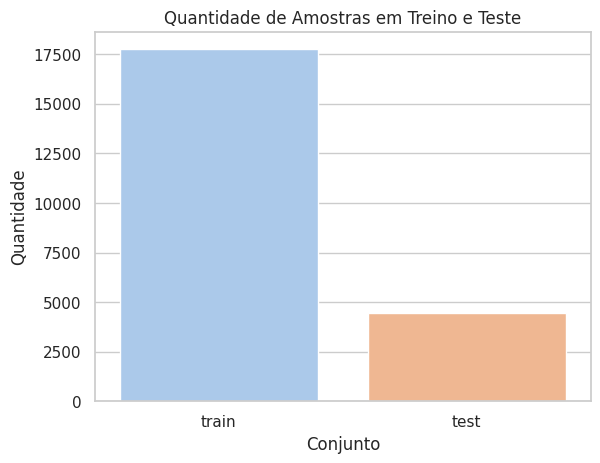

In [196]:

# Cria DataFrame de treino com coluna indicando o conjunto
df_train = X_train.copy()
df_train['dataset_type'] = 'train'

# Cria DataFrame de teste com coluna indicando o conjunto
df_test = X_test.copy()
df_test['dataset_type'] = 'test'

# Junta os dois
df_combined = pd.concat([df_train, df_test])

# Plot da contagem de registros por conjunto
sns.countplot(data=df_combined, x='dataset_type', palette='pastel')
plt.title('Quantidade de Amostras em Treino e Teste')
plt.xlabel('Conjunto')
plt.ylabel('Quantidade')
plt.show()

# Dasboard

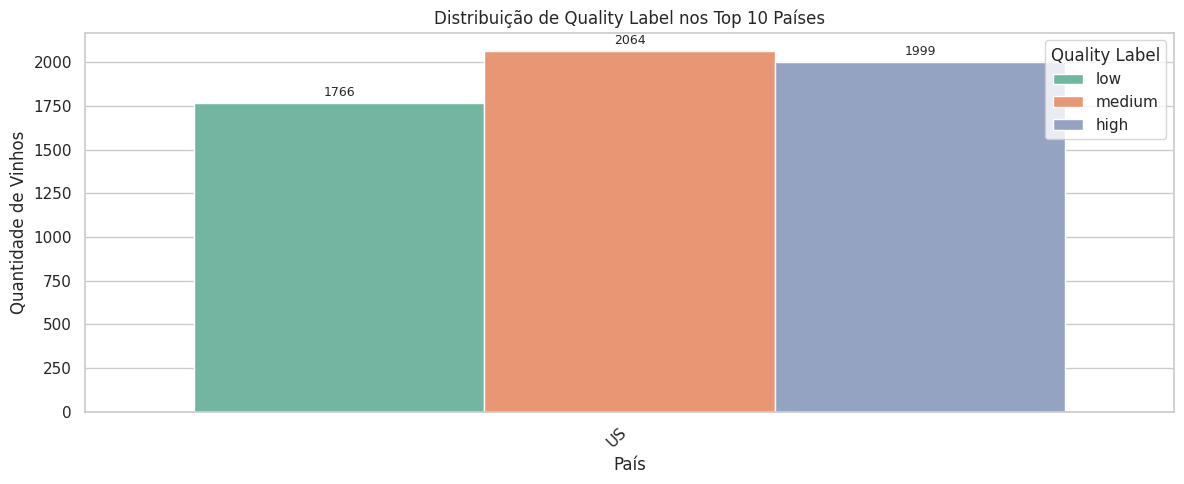

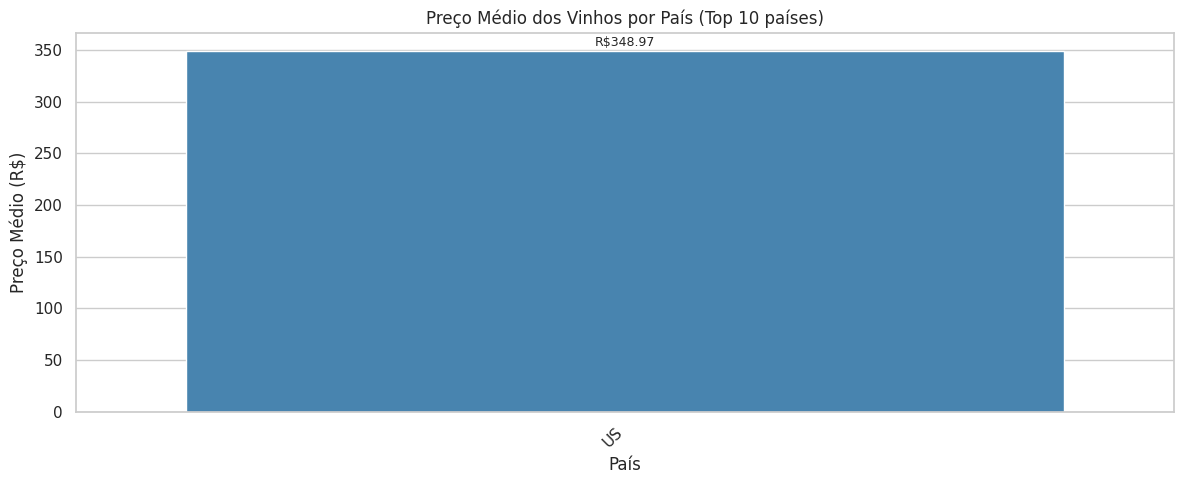

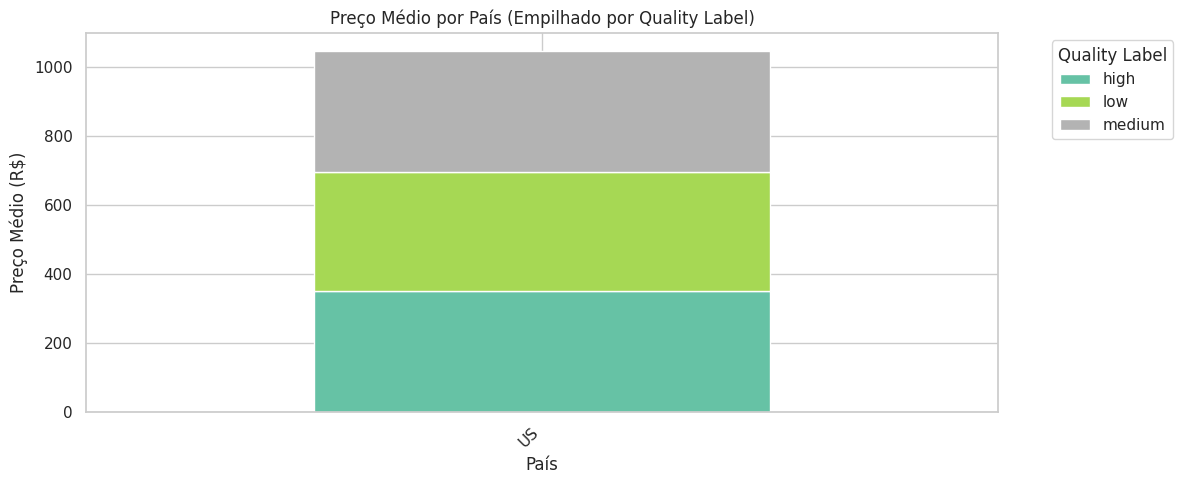

In [202]:
# Define o estilo
sns.set(style="whitegrid")

# Top 10 países com mais vinhos
top_countries = df['country'].value_counts().nlargest(10).index

# Filtra o DataFrame
df_top = df[df['country'].isin(top_countries)]

# Cria o gráfico
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df_top, x='country', hue='quality_label', palette='Set2')

# Adiciona valores em cima das barras
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

# Ajustes visuais
plt.title('Distribuição de Quality Label nos Top 10 Países')
plt.xlabel('País')
plt.ylabel('Quantidade de Vinhos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Quality Label')
plt.tight_layout()
plt.show()


# Define o estilo
sns.set(style="whitegrid")

# Seleciona os top 10 países com mais vinhos
top_countries = df['country'].value_counts().nlargest(10).index

# Filtra o DataFrame
df_top = df[df['country'].isin(top_countries)]

# Agrupa por país e calcula média de preço
avg_price = df_top.groupby('country')['price'].mean().sort_values(ascending=False)

# Cria o gráfico
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=avg_price.index, y=avg_price.values, palette='Blues_d')

# Adiciona os valores nas barras
for i, v in enumerate(avg_price.values):
    ax.text(i, v + 5, f'R${v:.2f}', ha='center', fontsize=9)

# Títulos e ajustes
plt.title('Preço Médio dos Vinhos por País (Top 10 países)')
plt.xlabel('País')
plt.ylabel('Preço Médio (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Top 10 países com mais vinhos
top_countries = df['country'].value_counts().nlargest(10).index

# Filtra os dados
df_top = df[df['country'].isin(top_countries)]

# Agrupa por país e quality_label, calcula média do preço
grouped = df_top.groupby(['country', 'quality_label'])['price'].mean().unstack(fill_value=0)

# Ordena países pela soma total do preço médio
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Plot
ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 5), colormap='Set2')

# Ajustes visuais
plt.title('Preço Médio por País (Empilhado por Quality Label)')
plt.xlabel('País')
plt.ylabel('Preço Médio (R$)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Quality Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

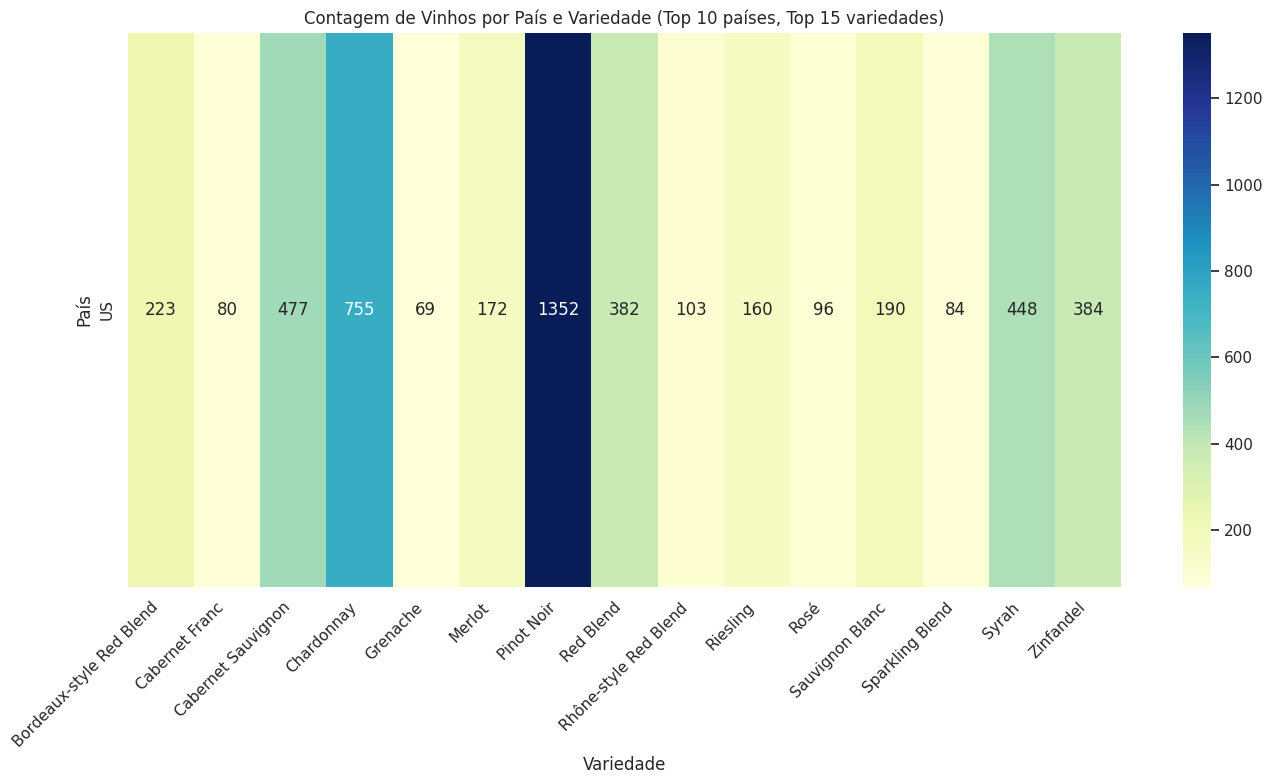

In [203]:
# Define o estilo
sns.set(style="whitegrid")

# Top 10 países e top 15 variedades mais frequentes
top_countries = df['country'].value_counts().nlargest(10).index
top_varieties = df['variety'].value_counts().nlargest(15).index

# Filtra dataframe para top países e variedades
df_filtered = df[(df['country'].isin(top_countries)) & (df['variety'].isin(top_varieties))]

# Cria tabela cruzada (contagem)
pivot_table = pd.crosstab(df_filtered['country'], df_filtered['variety'])

# Plot do heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Contagem de Vinhos por País e Variedade (Top 10 países, Top 15 variedades)')
plt.xlabel('Variedade')
plt.ylabel('País')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">8. Conclusão</p>

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.